In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd

from bo_functions import ExactGPModel
from bo_functions import test_train_split
from bo_functions import bo_iter
from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path
from datetime import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 10
train_iter = 300
noise_std = 0.1
runs = 1
explore_bias = torch.tensor([0.75])
shuffle_seed = 9
set_lengthscale = np.array([None])
t= 20
emulator = False
sparse_grid = False
verbose = True
save_fig=False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  26-Jul-2022 (17:08:30)


Runs: 1
BO Iters: 10
------------------------------
Lengthscale Set To: [None]
Explore Bias: tensor(0.7500)
Run Number:  1


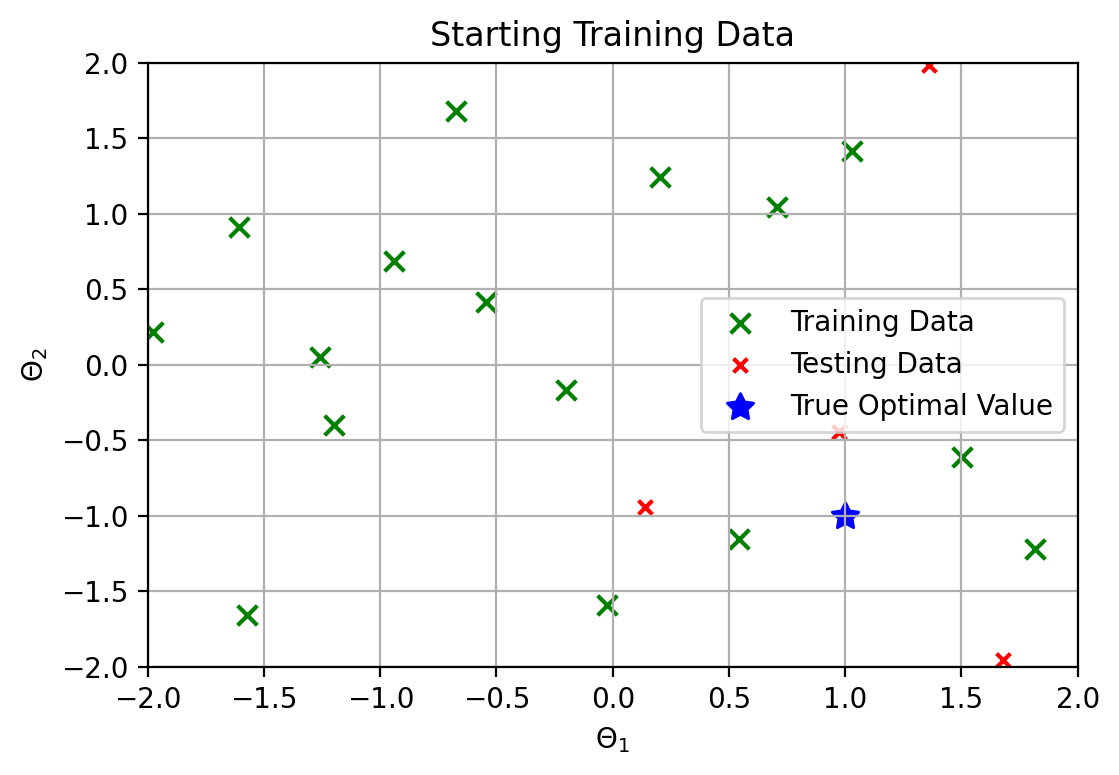

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


BO Iteration =  1
Jasrasaria EP: tensor(0.7500)
Boyle EP: tensor(0.7500)
Exp EP: tensor(0.7500)
Exploration Bias =  tensor(0.7500)
Scipy Theta Best =  [ 1.04860194 -1.47249884]
Argmax Theta Best =  [ 1.15789474 -2.        ]
Scipy Theta Opt =  [ 0.95690243 -1.18804318]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



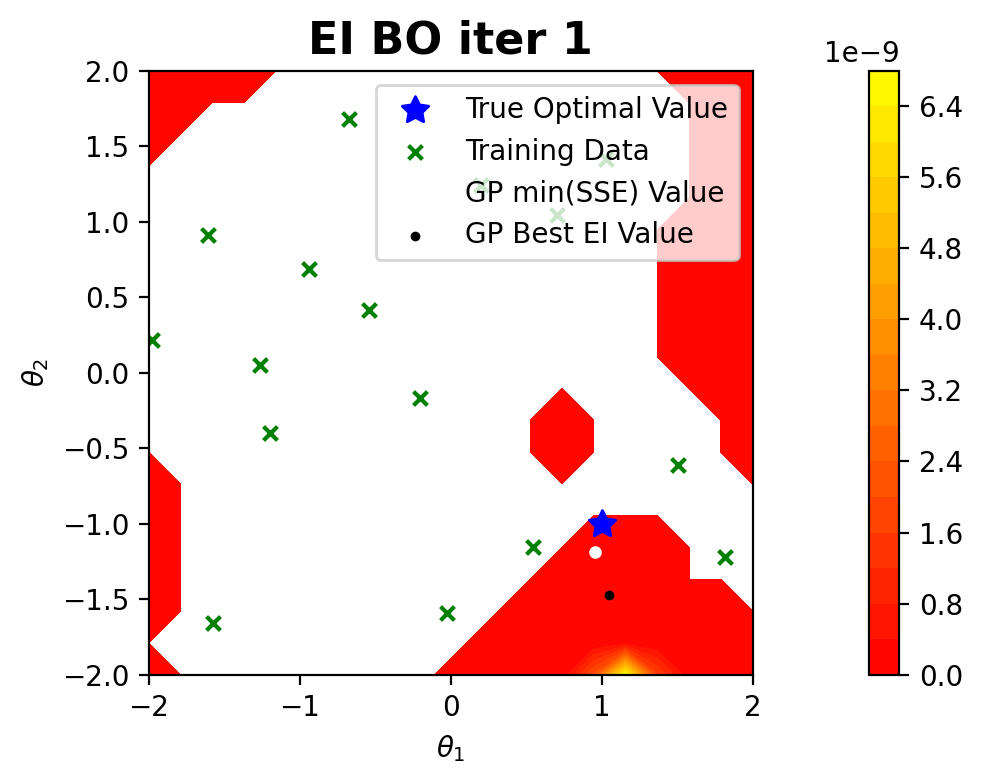

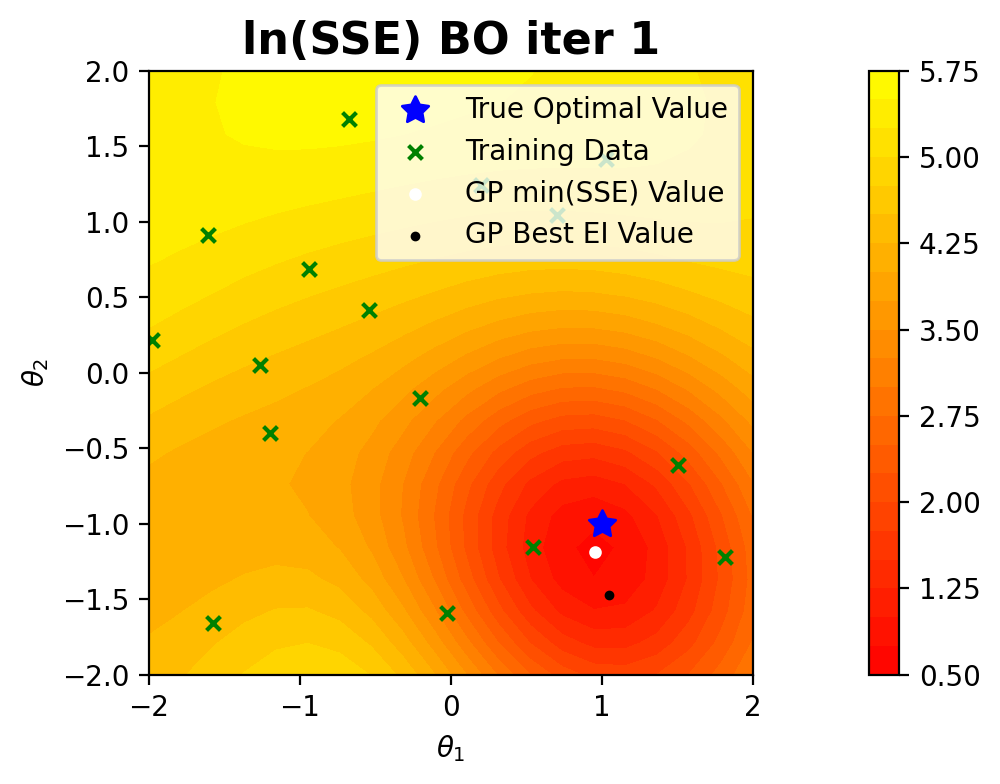

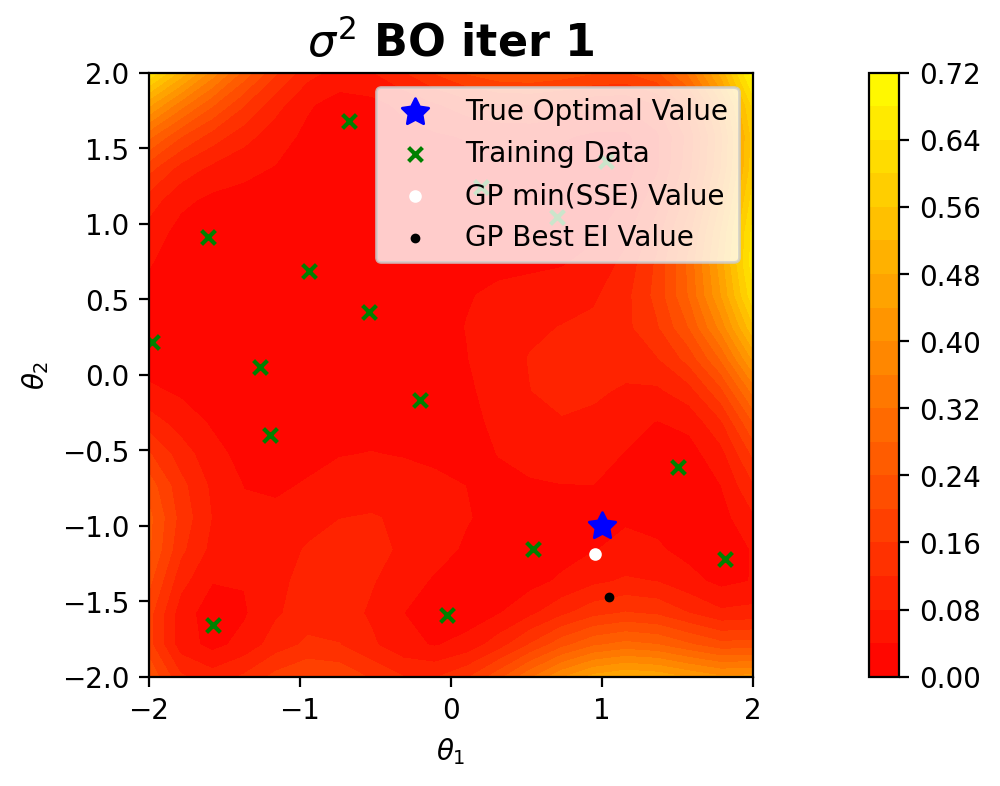

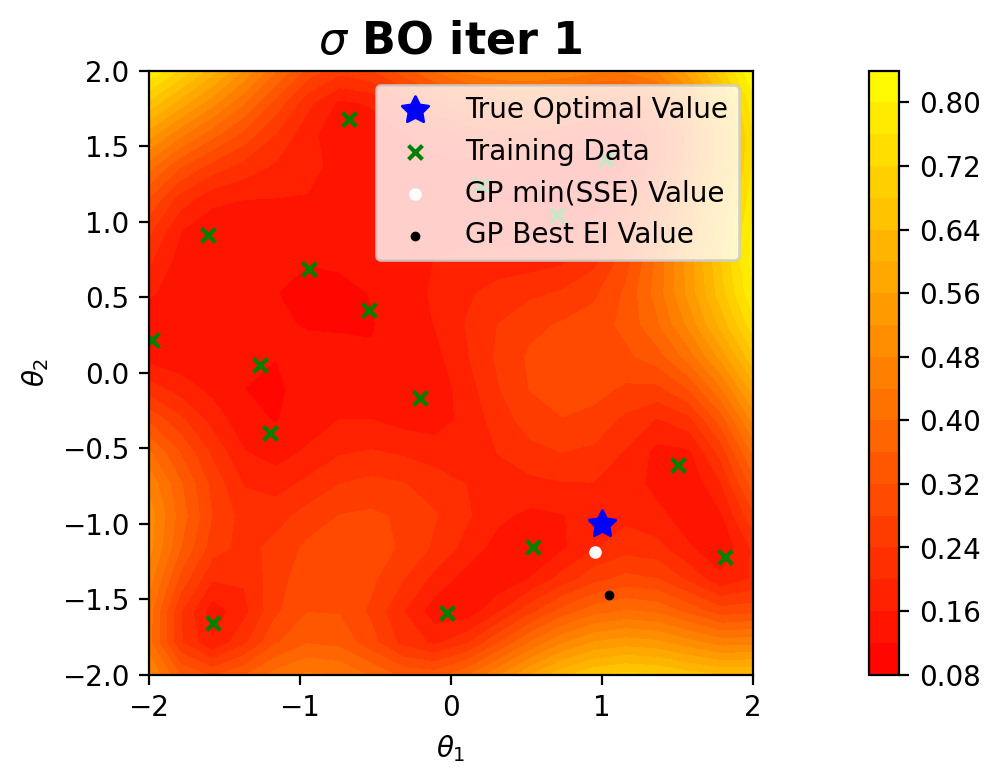

Best Error is: 1.0376


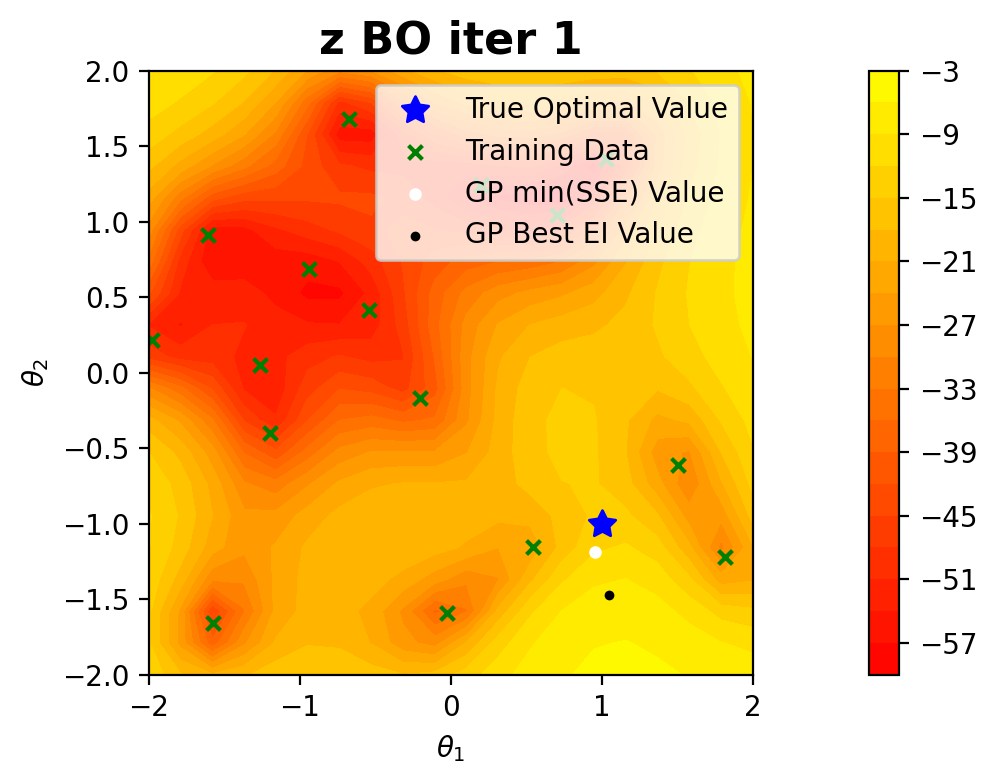

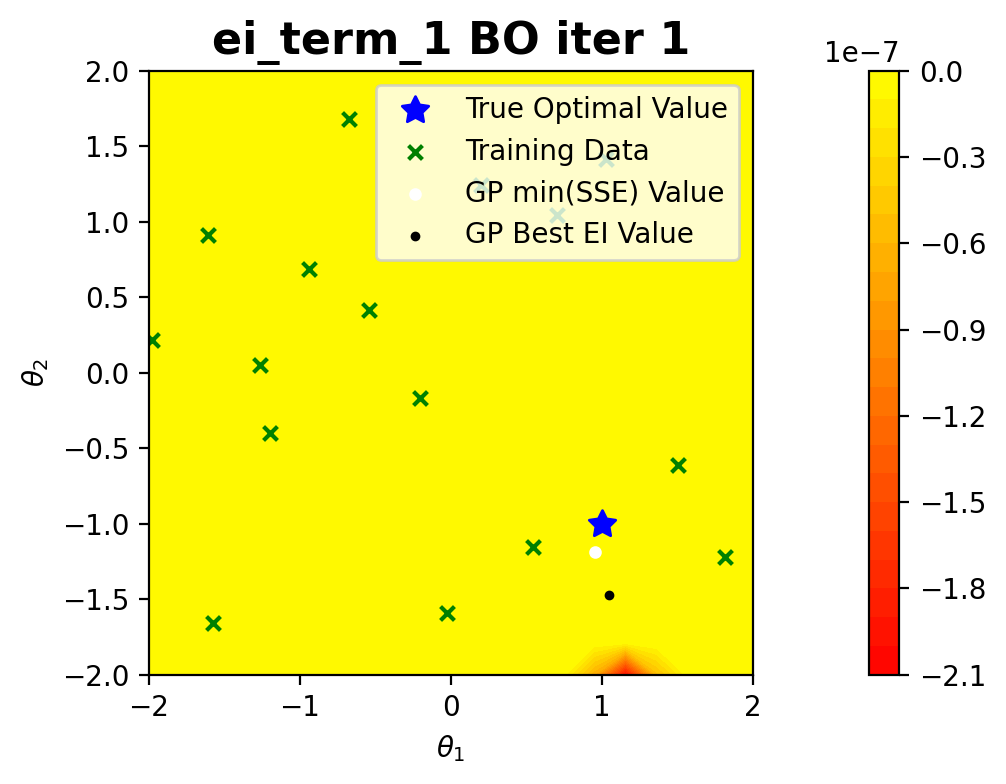

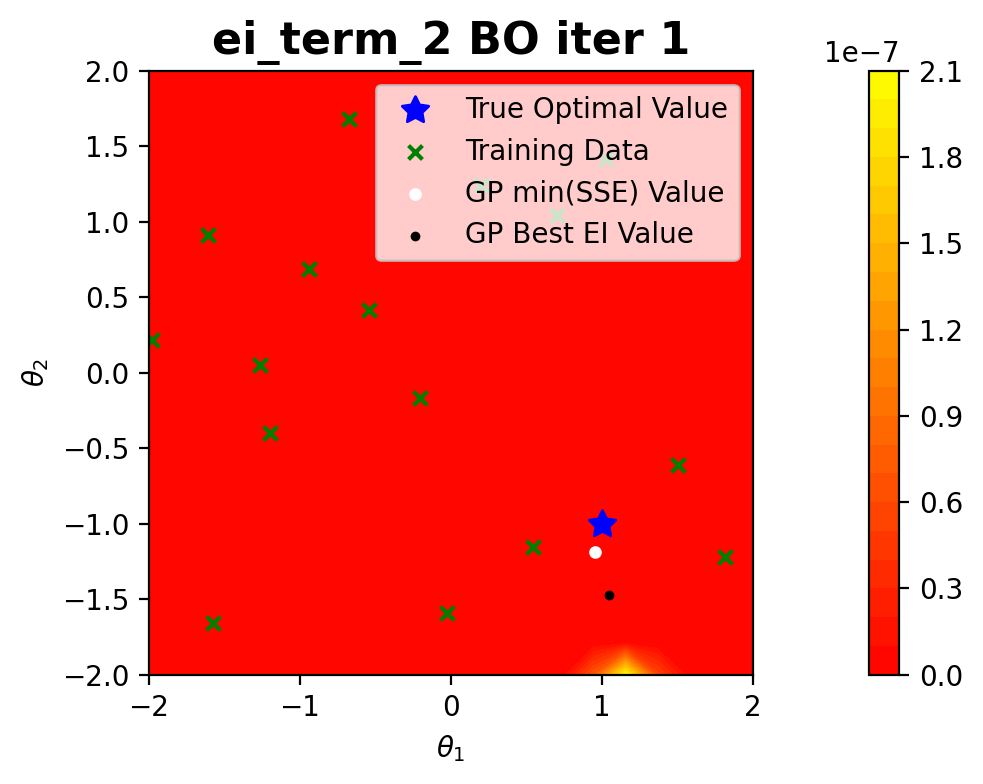

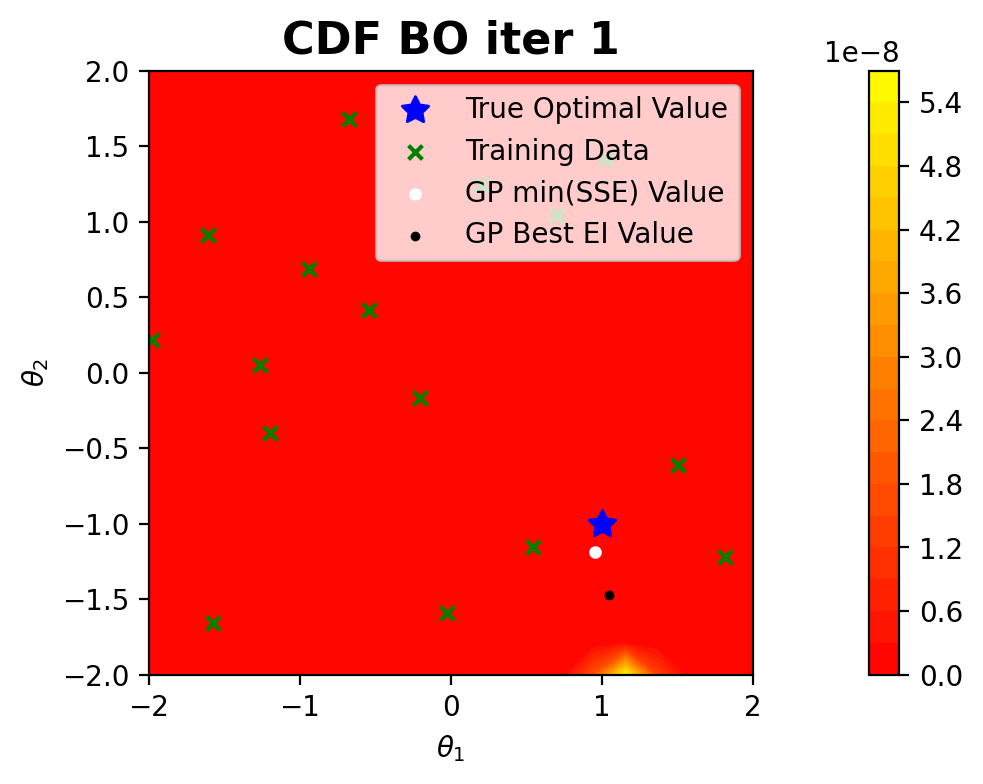

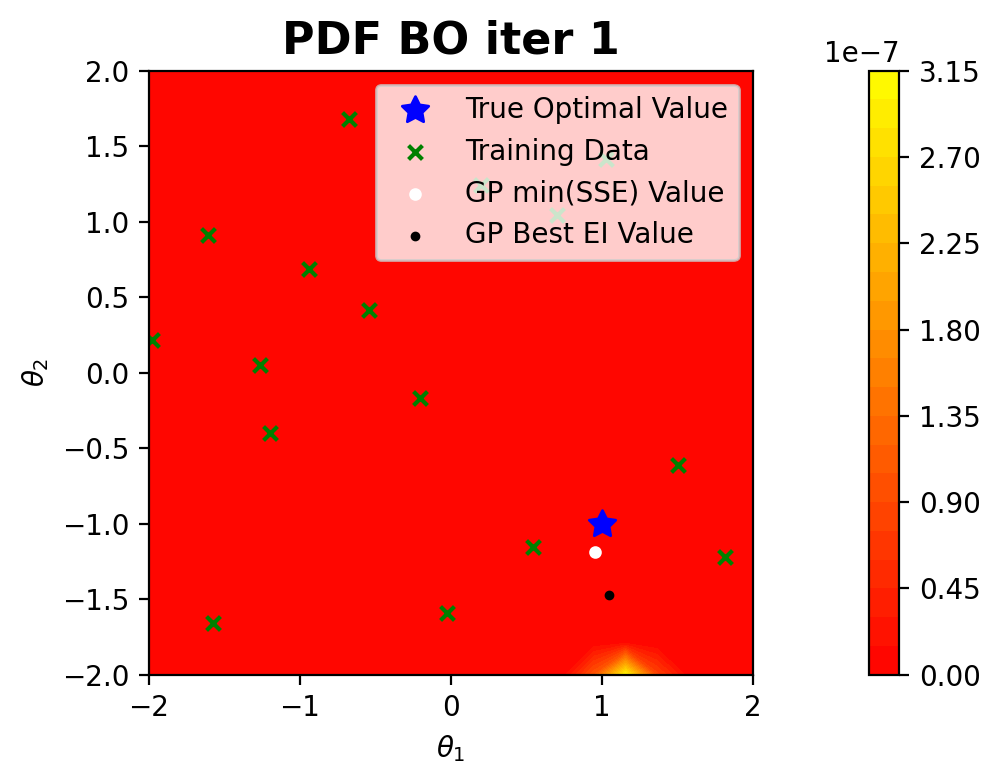

Magnitude of ln(SSE) given Theta_Opt =  [ 0.95690243 -1.18804318] is 1.6016e-01
BO Iteration =  2
Jasrasaria EP: 0.21852178382154147
Boyle EP: tensor(0.9742)
Exp EP: tensor(0.6495)
Exploration Bias =  tensor(0.6495)
Scipy Theta Best =  [ 2. -2.]
Argmax Theta Best =  [ 2. -2.]
Scipy Theta Opt =  [ 1.06703665 -1.12824312]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.15789474] 



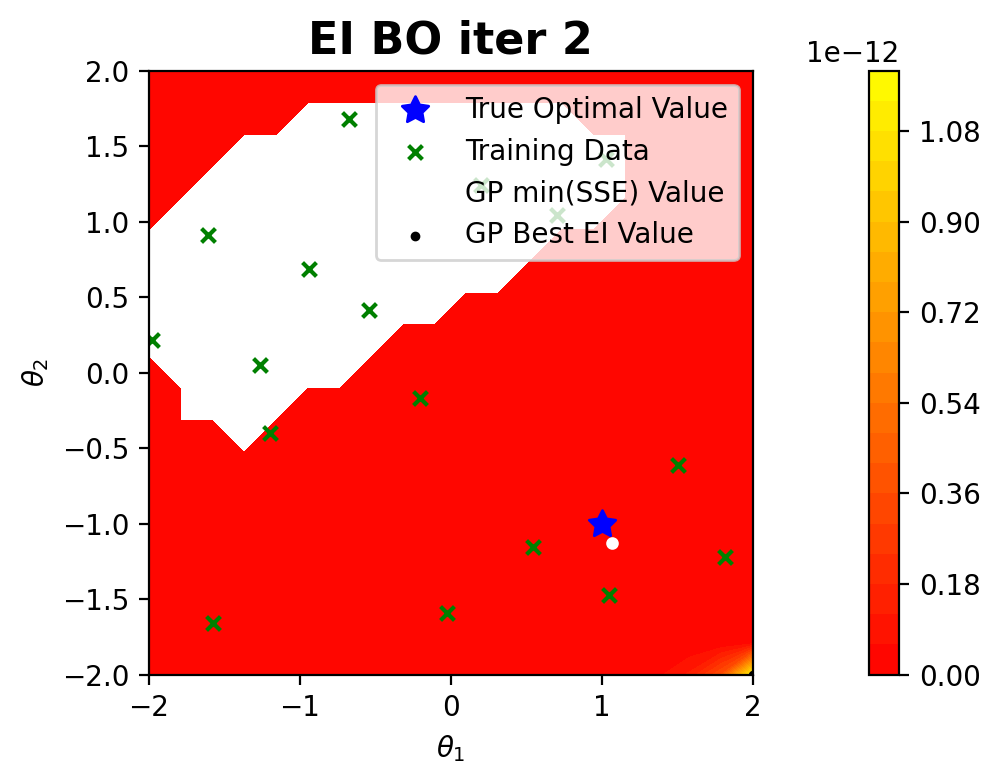

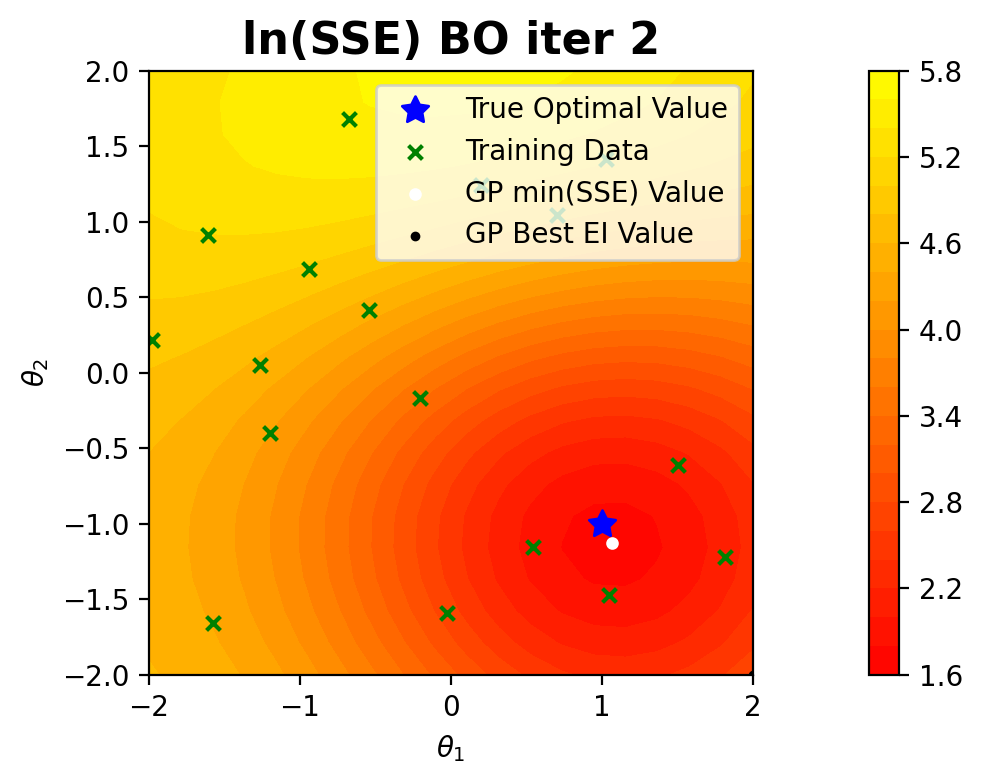

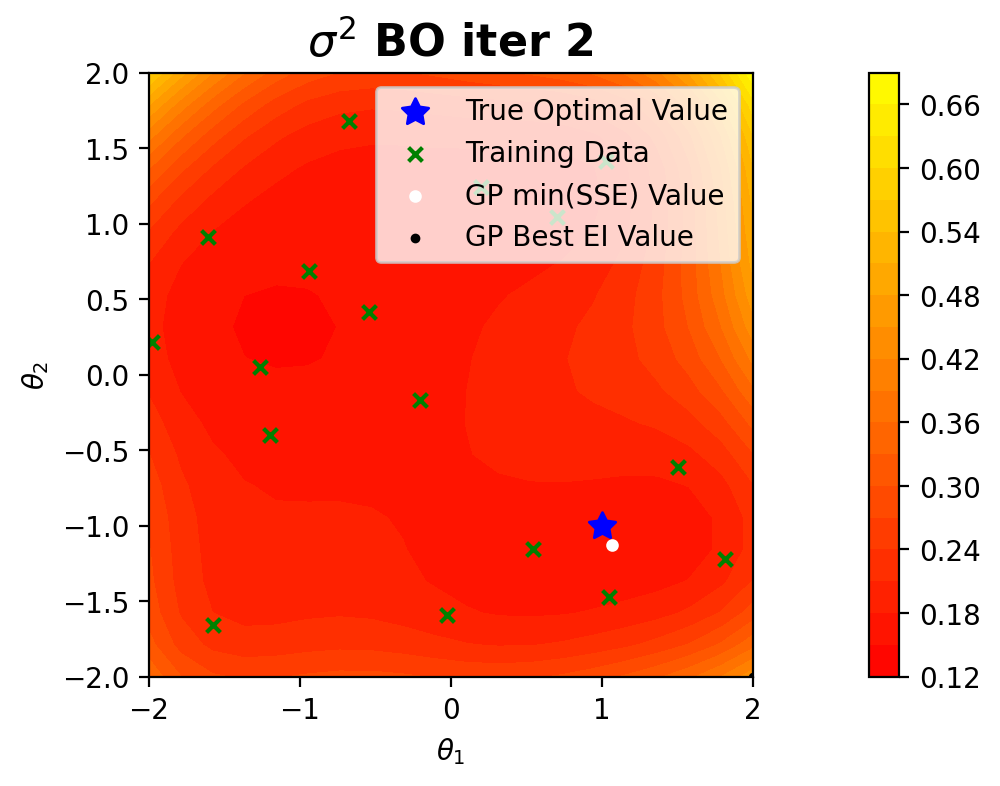

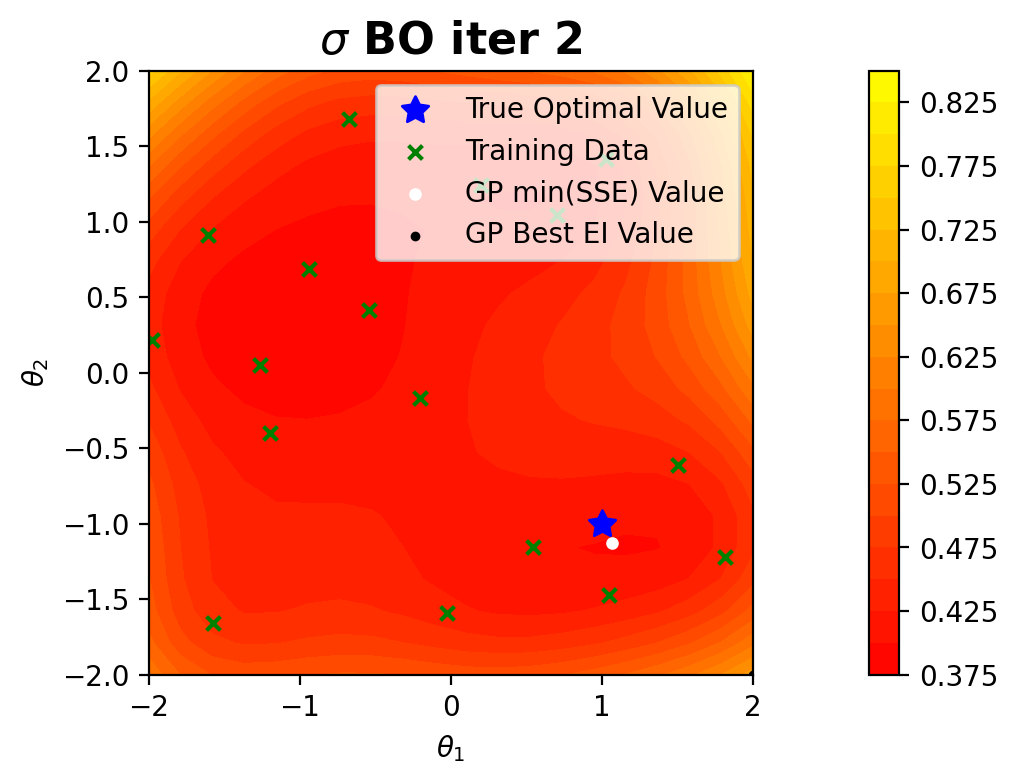

Best Error is: 1.0376


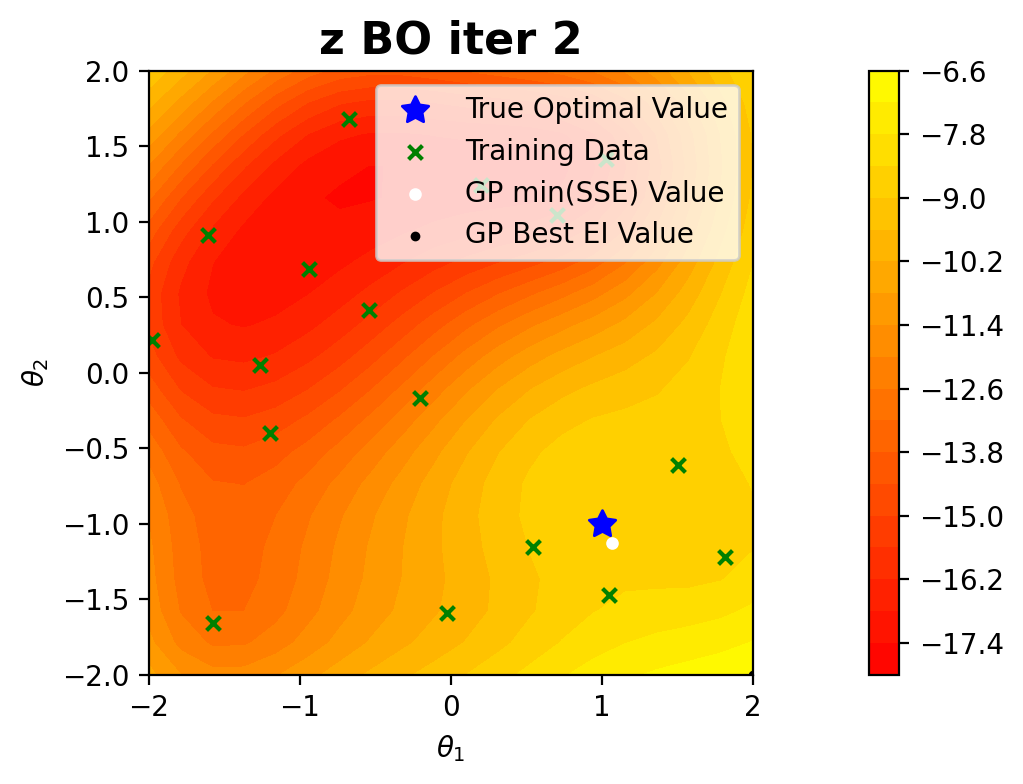

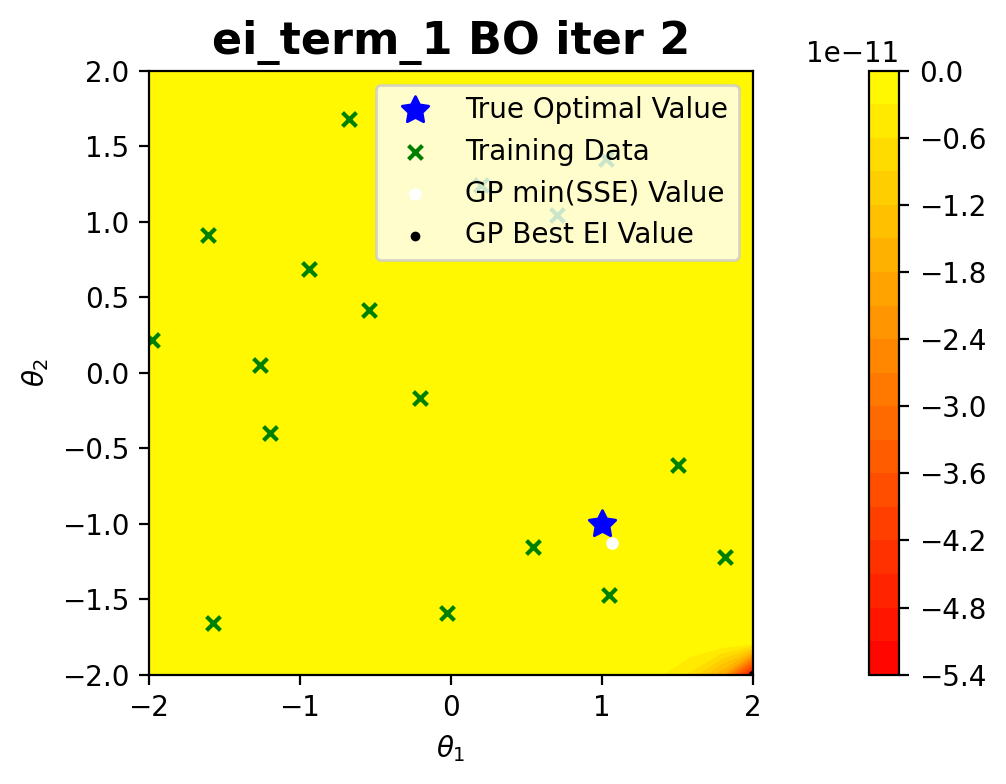

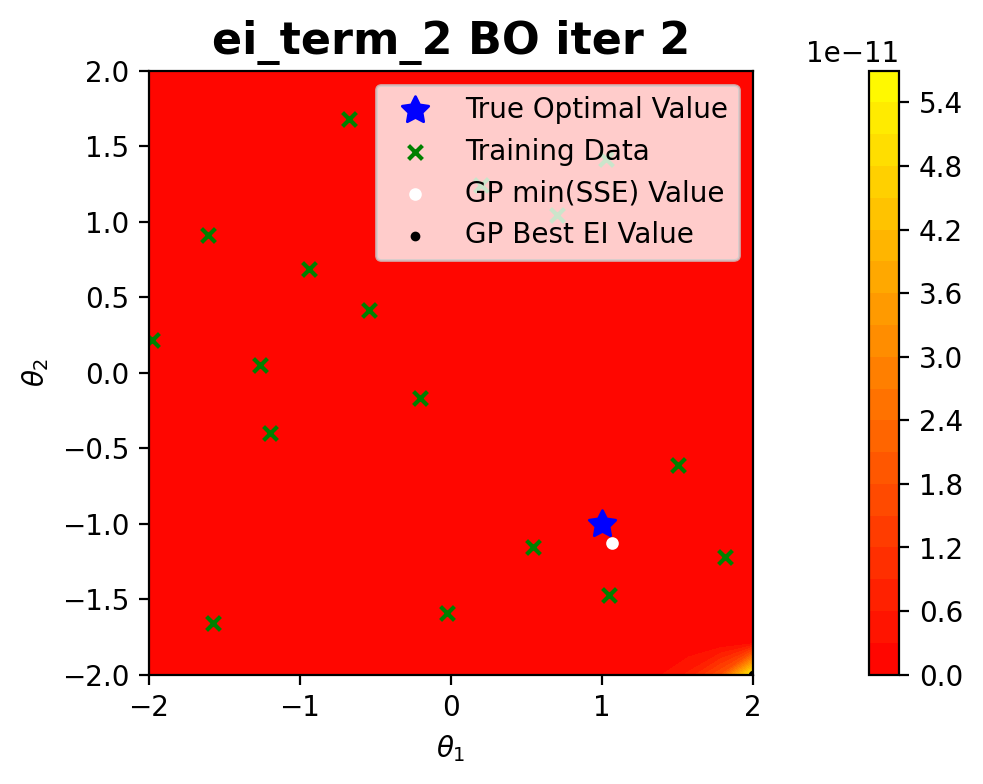

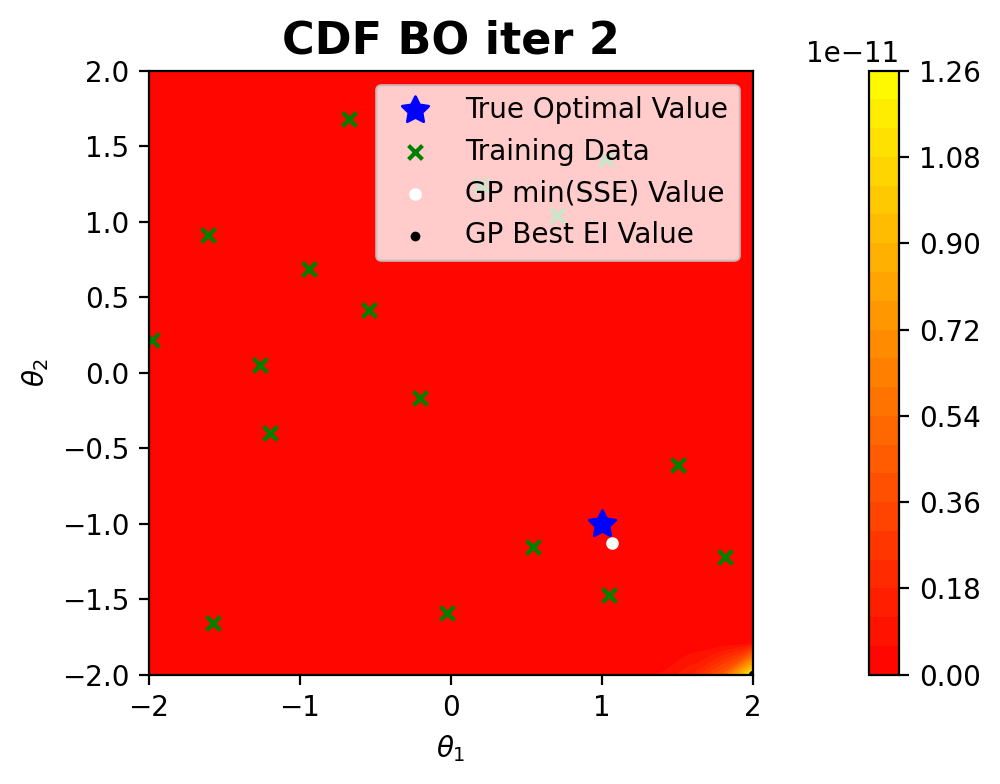

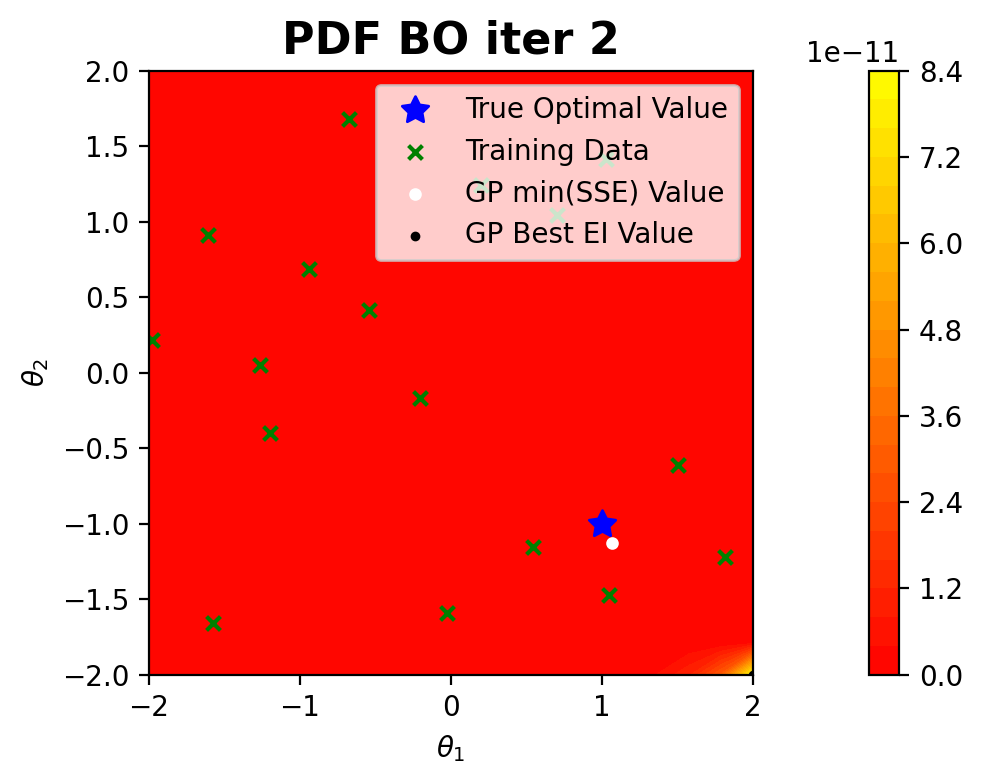

Magnitude of ln(SSE) given Theta_Opt =  [ 1.06703665 -1.12824312] is -5.3829e-01
BO Iteration =  3
Jasrasaria EP: 0.20317971958516695
Boyle EP: tensor(0.8436)
Exp EP: tensor(0.5624)
Exploration Bias =  tensor(0.5624)
Scipy Theta Best =  [2.         0.31578947]
Argmax Theta Best =  [2.         0.31578947]
Scipy Theta Opt =  [ 0.96095069 -0.99253912]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



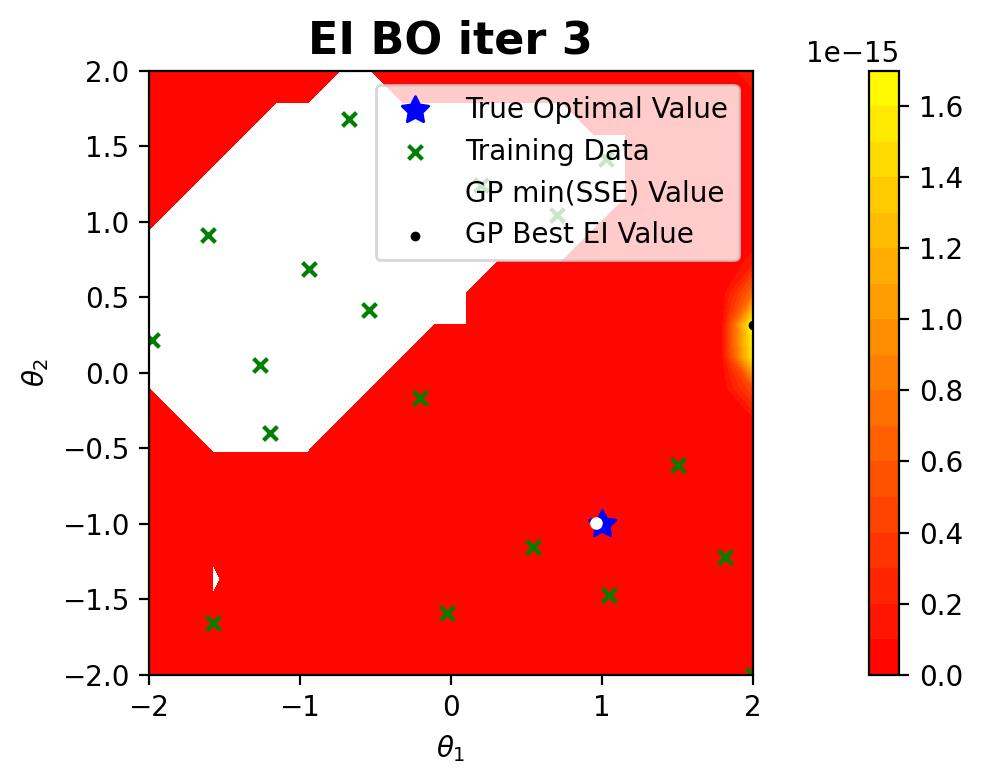

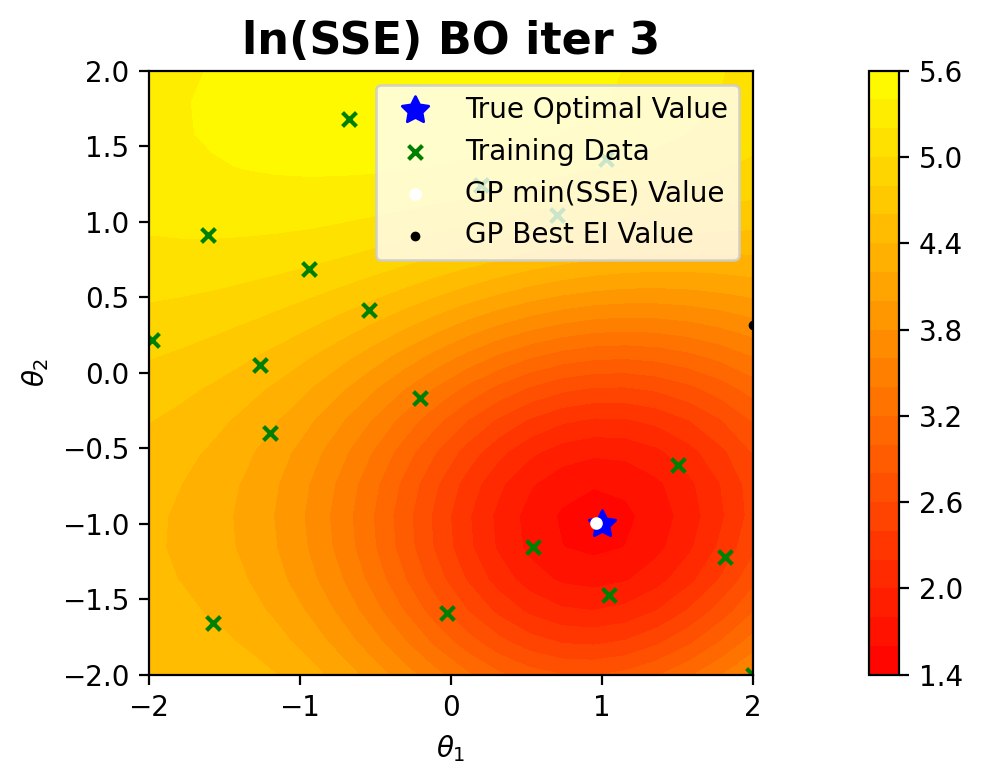

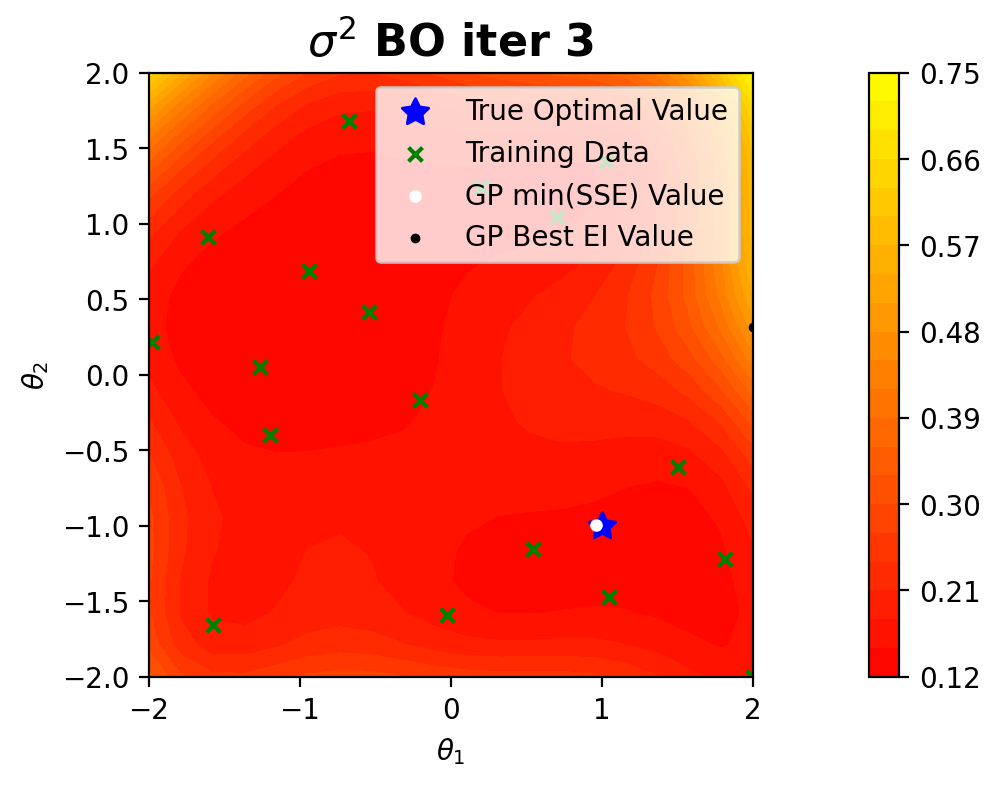

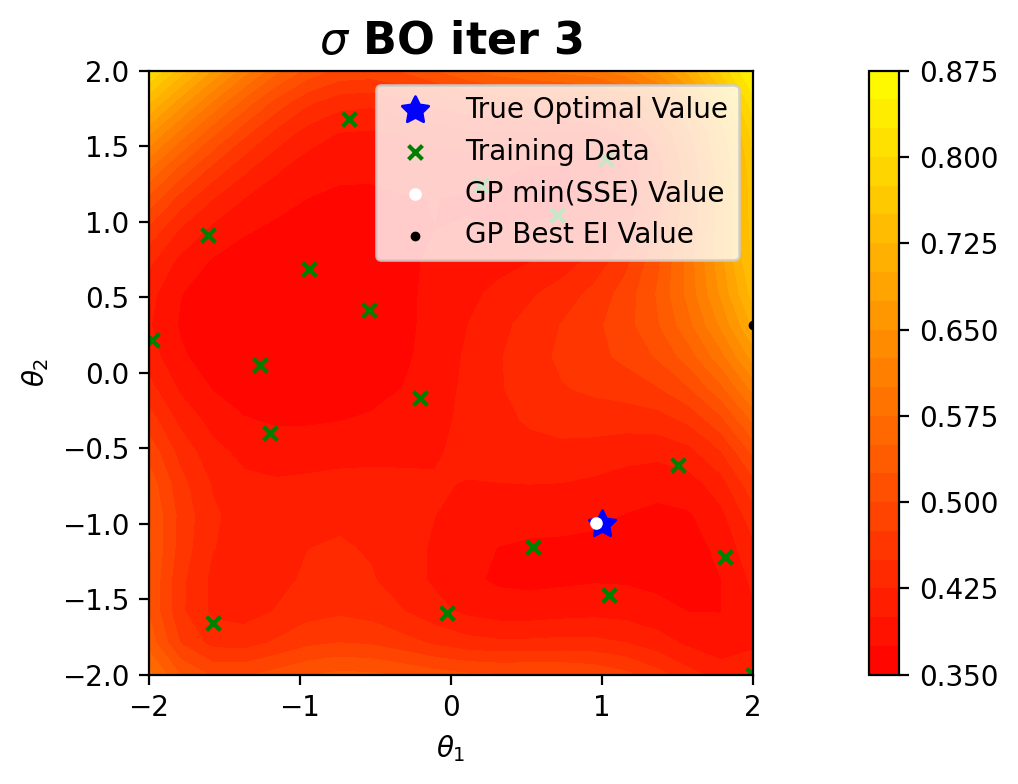

Best Error is: 1.0376


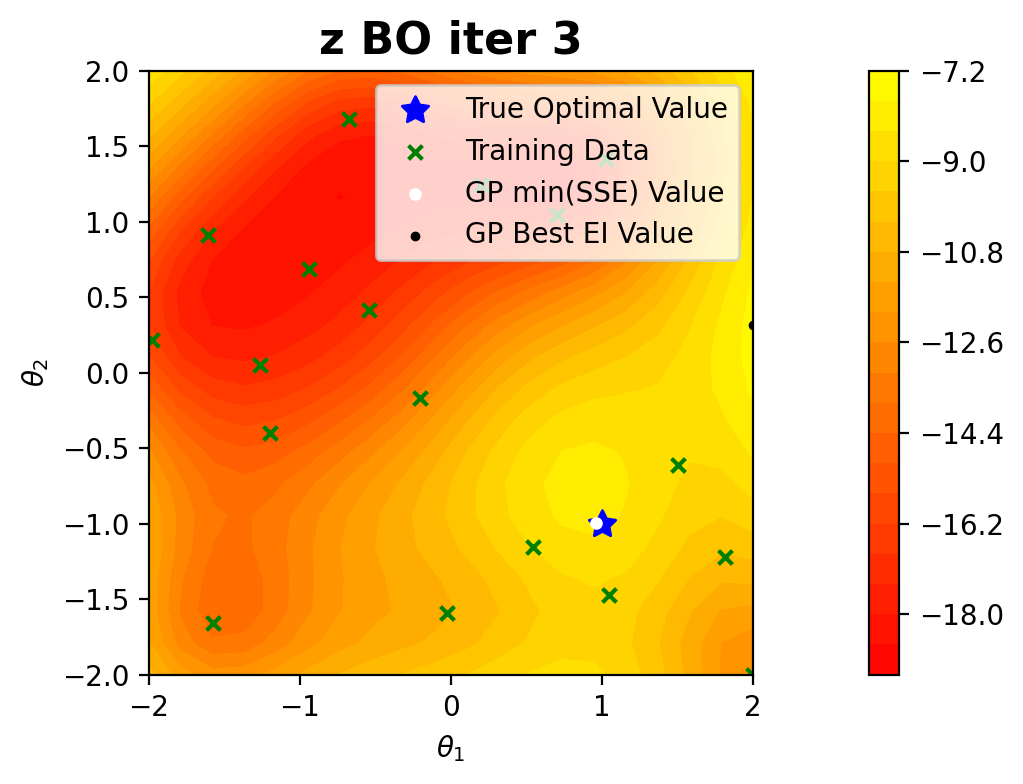

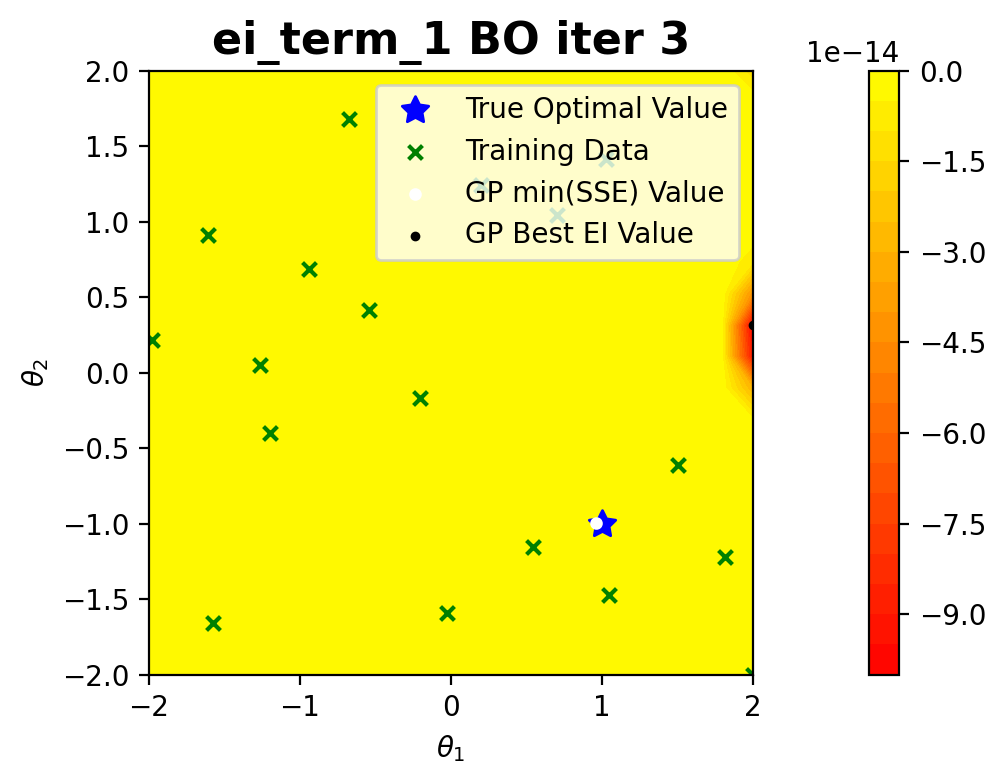

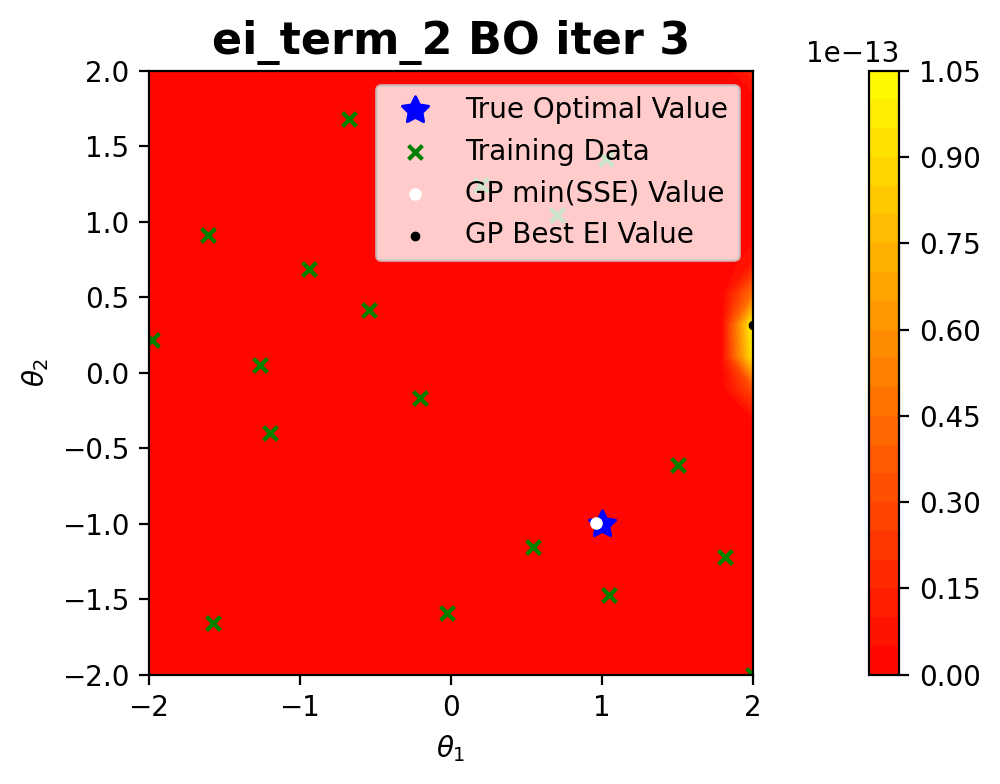

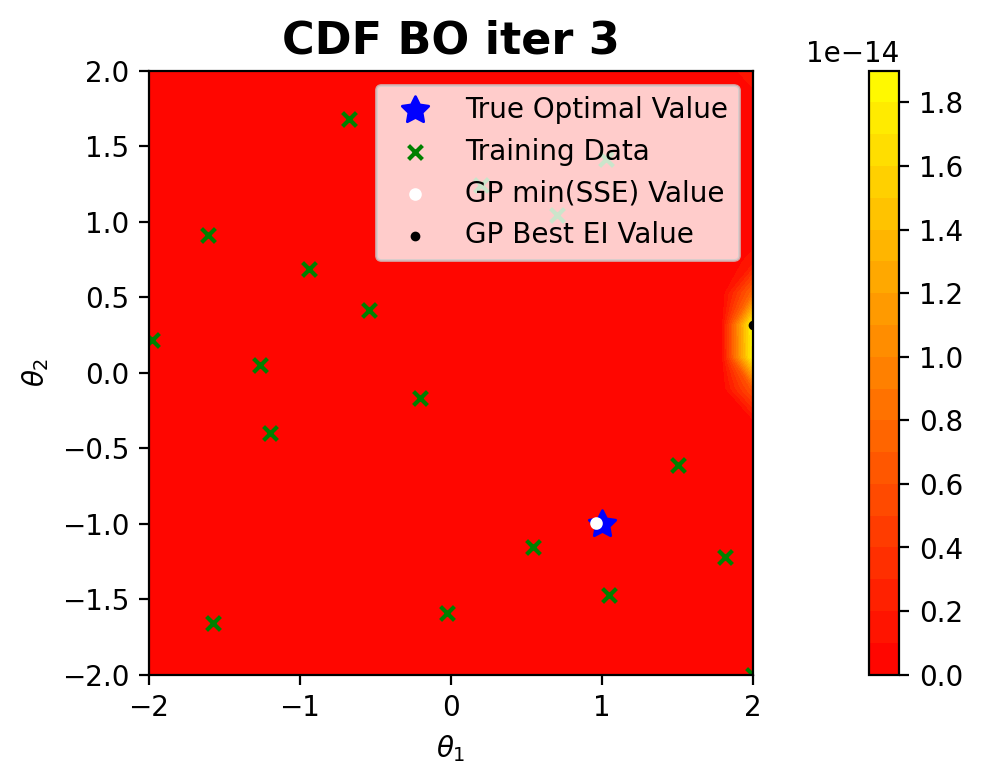

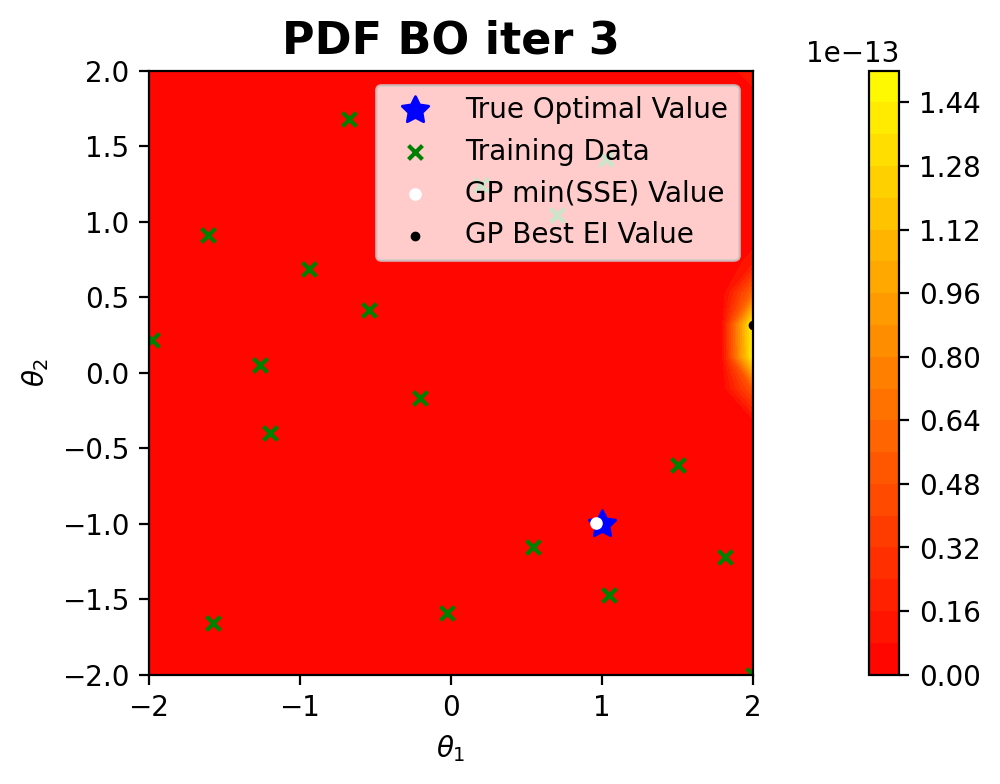

Magnitude of ln(SSE) given Theta_Opt =  [ 0.96095069 -0.99253912] is -4.2041e+00
BO Iteration =  4
Jasrasaria EP: 0.17232511611833137
Boyle EP: tensor(0.3247)
Exp EP: tensor(0.4870)
Exploration Bias =  tensor(0.4870)
Scipy Theta Best =  [2. 2.]
Argmax Theta Best =  [2. 2.]
Scipy Theta Opt =  [ 0.94567104 -1.00200105]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



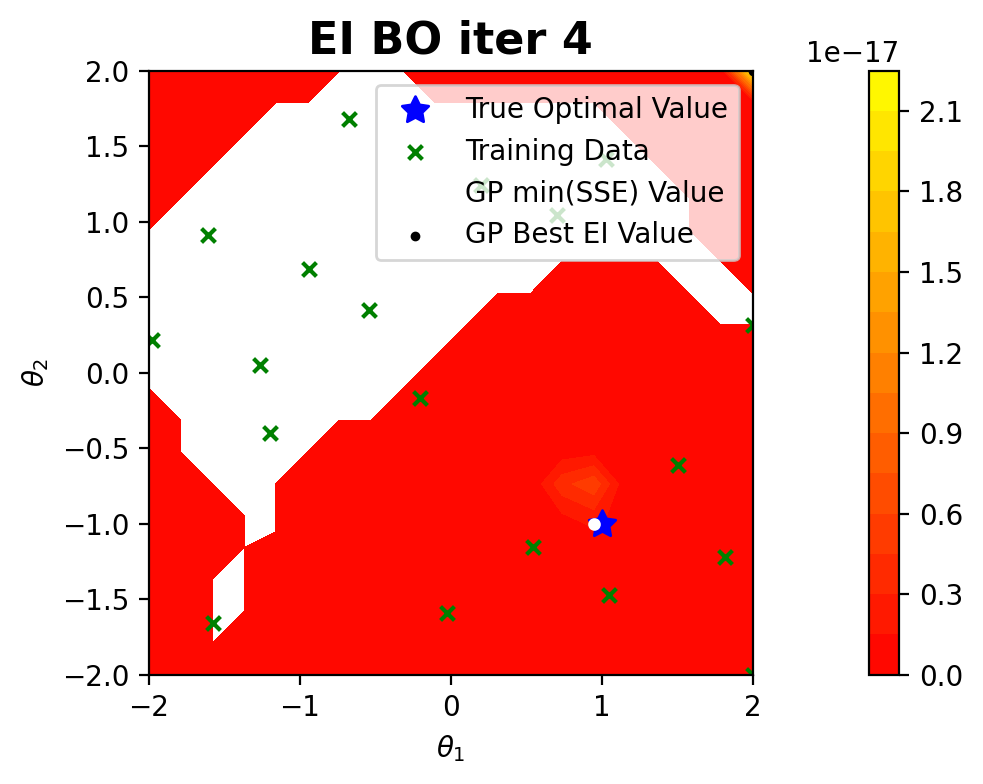

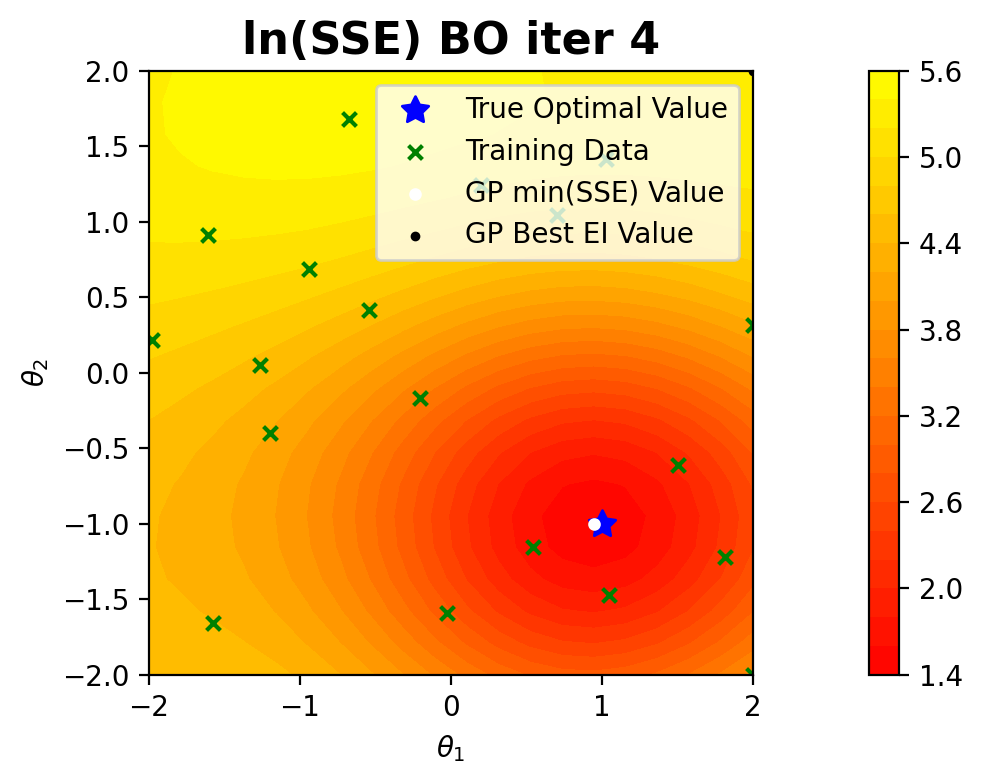

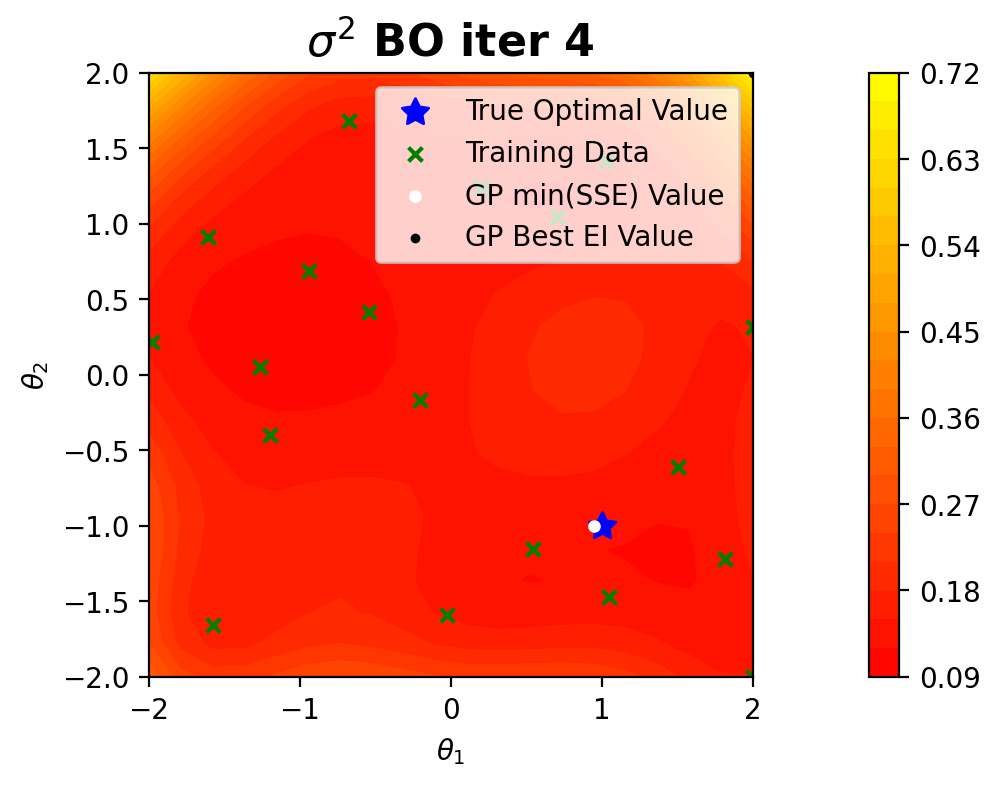

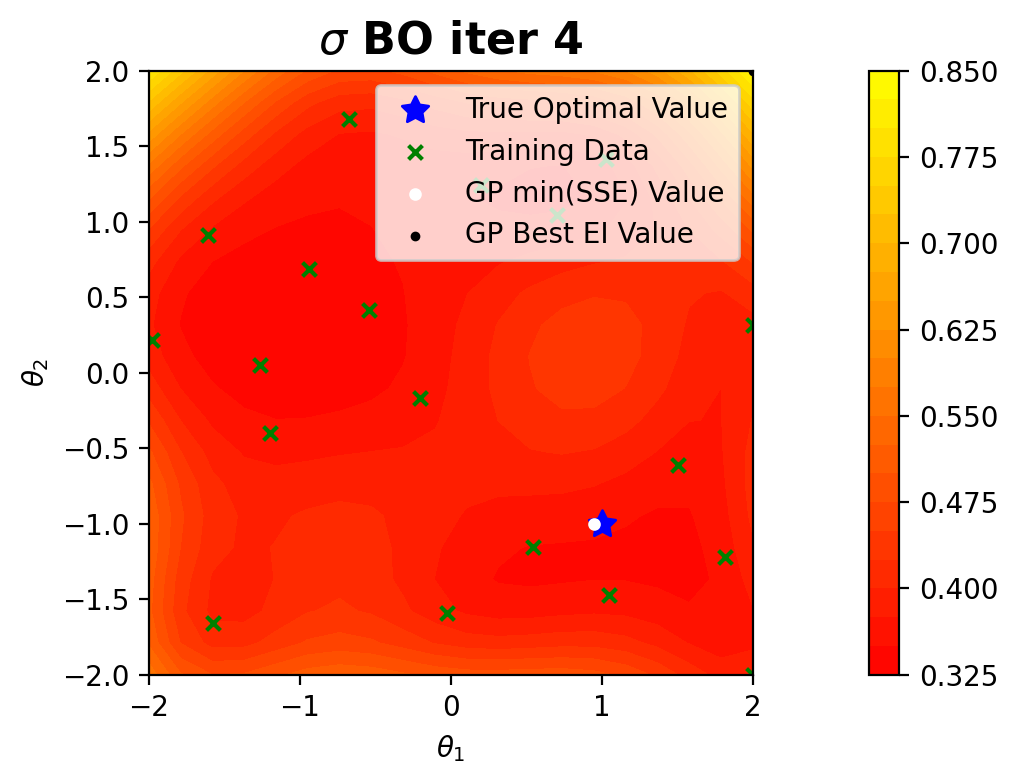

Best Error is: 1.0376


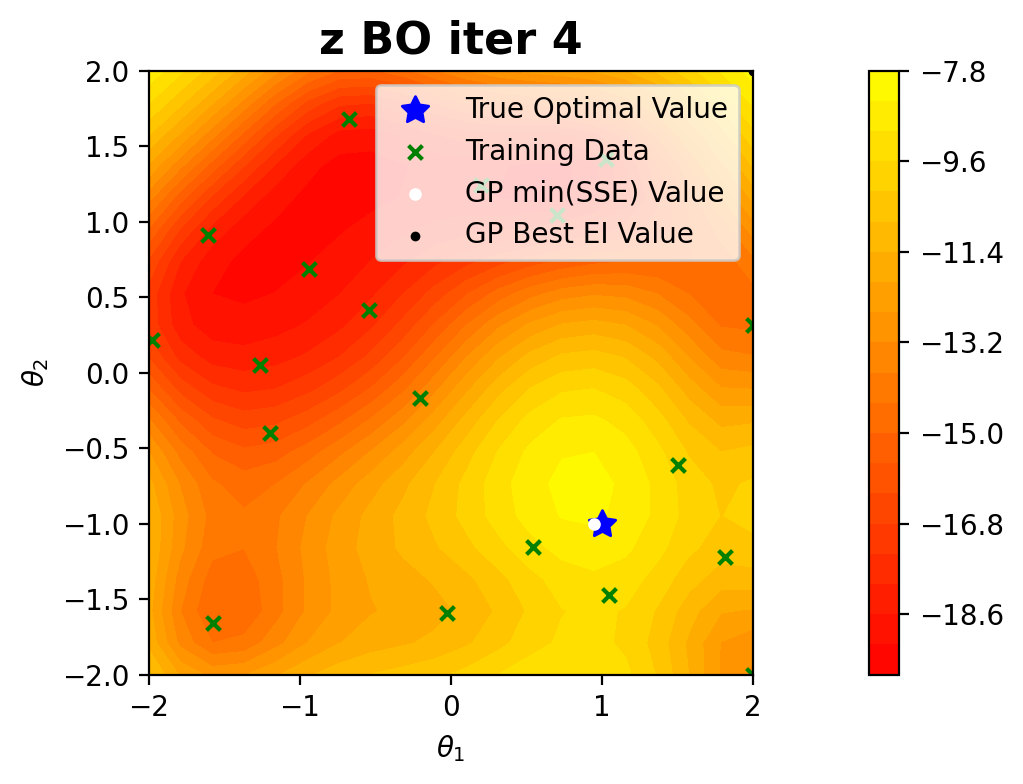

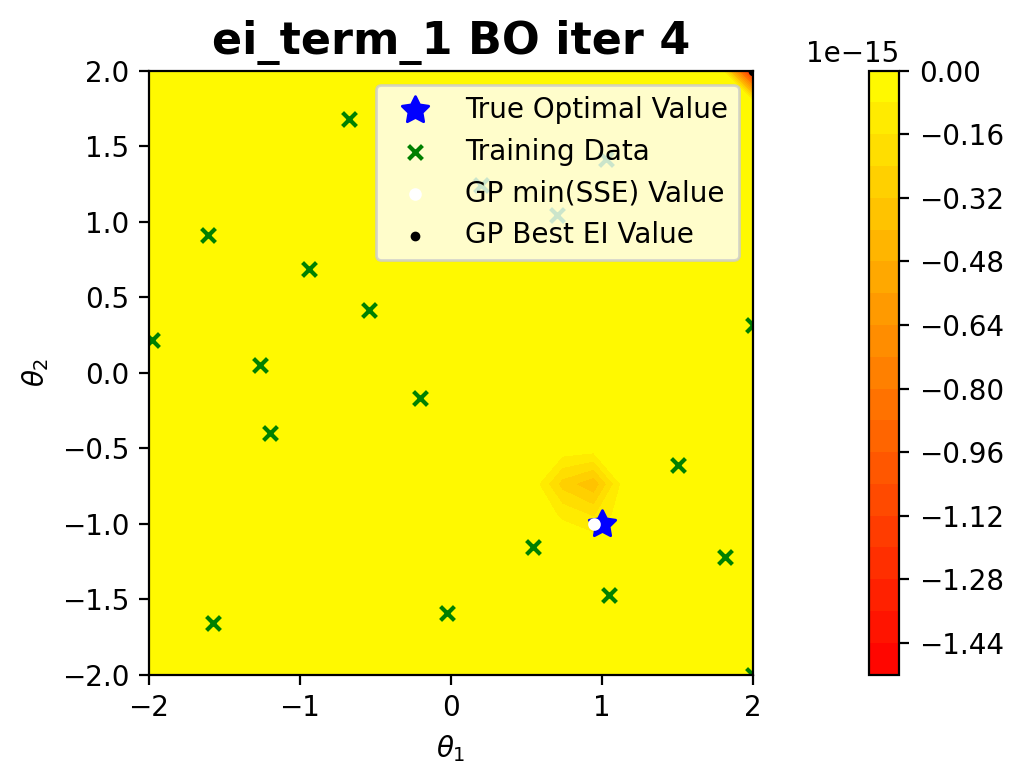

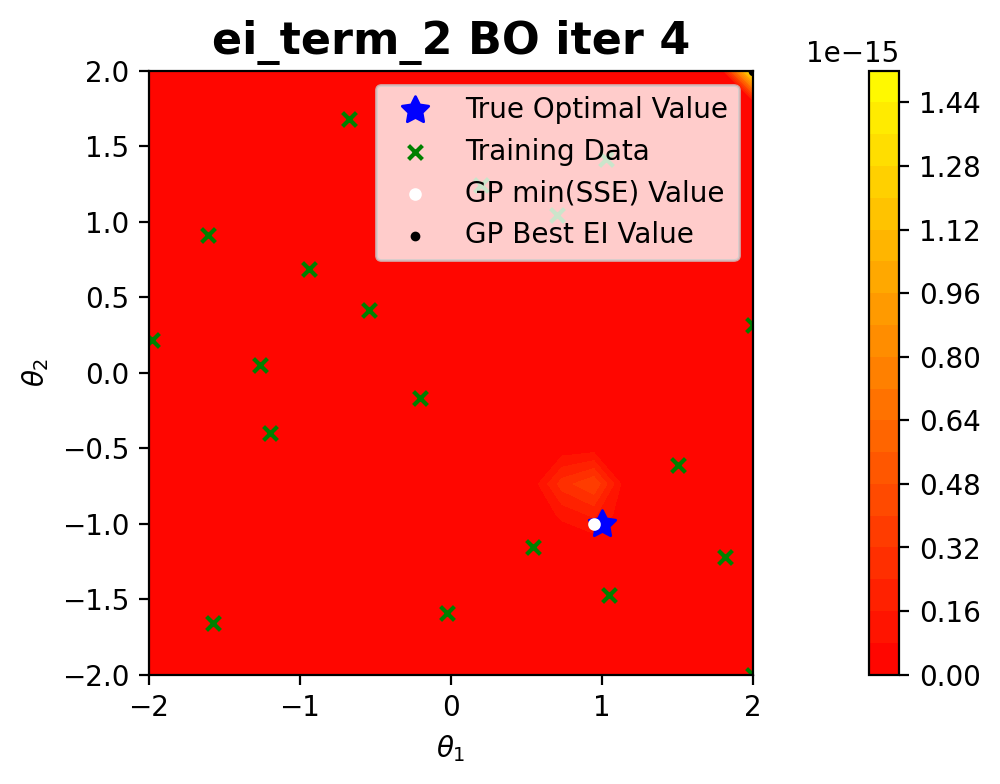

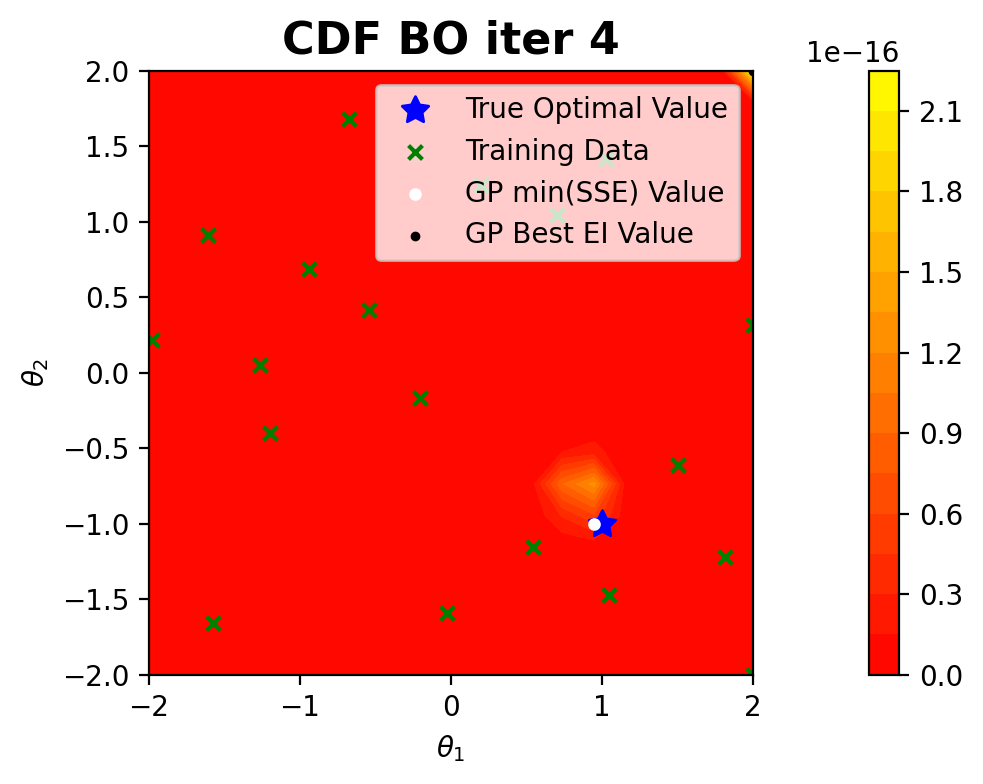

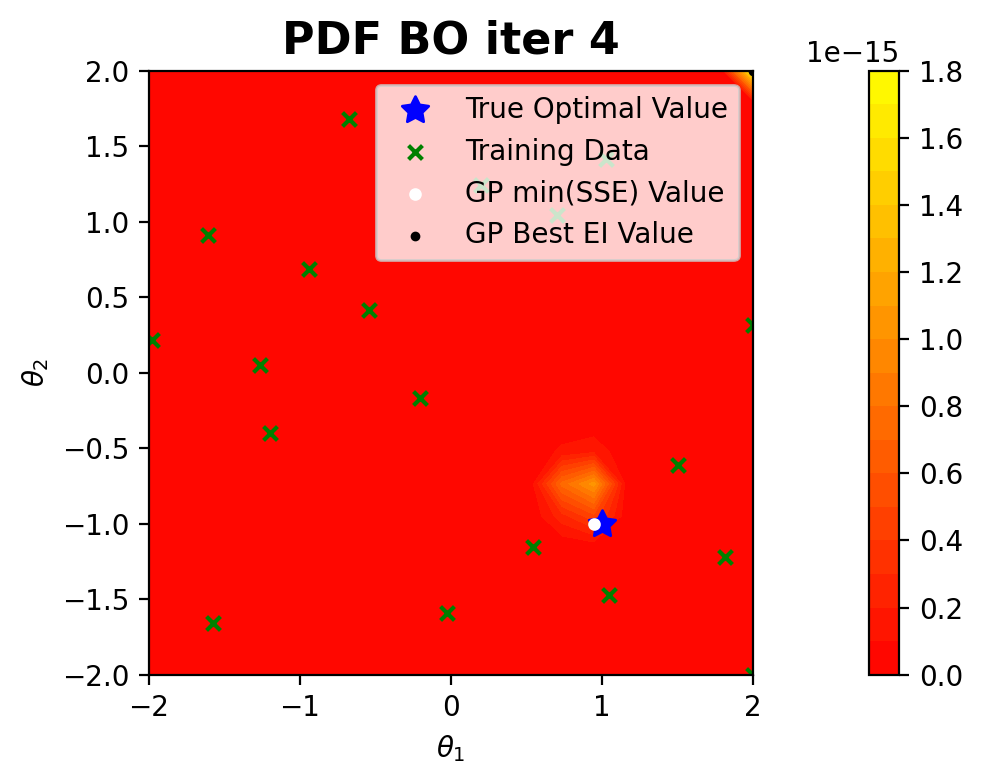

Magnitude of ln(SSE) given Theta_Opt =  [ 0.94567104 -1.00200105] is -3.7521e+00
BO Iteration =  5
Jasrasaria EP: 0.15577253668453375
Boyle EP: tensor(0.2812)
Exp EP: tensor(0.4217)
Exploration Bias =  tensor(0.4217)
Scipy Theta Best =  [ 0.93637594 -0.94482032]
Argmax Theta Best =  [ 0.94736842 -0.73684211]
Scipy Theta Opt =  [ 0.95570377 -1.00015556]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



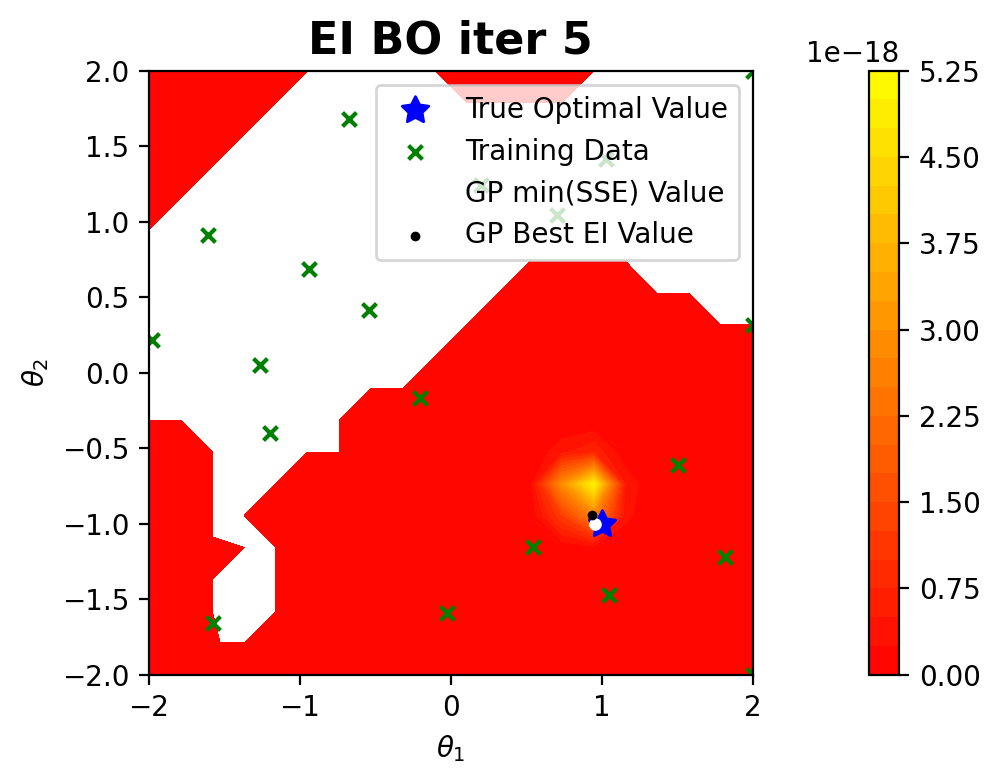

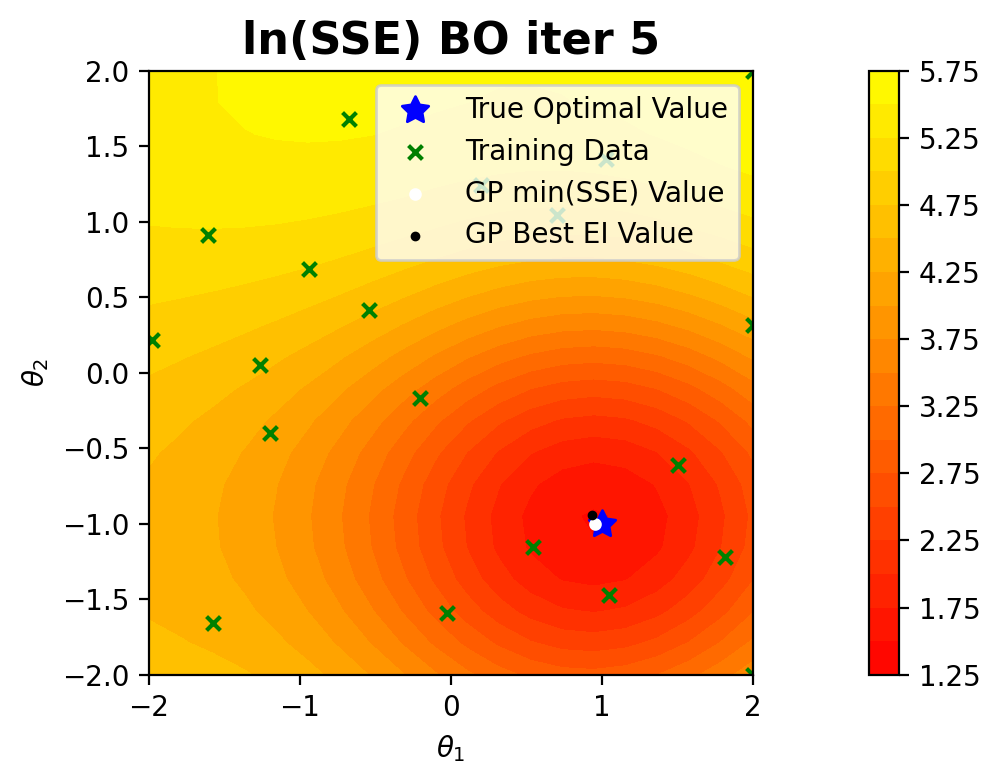

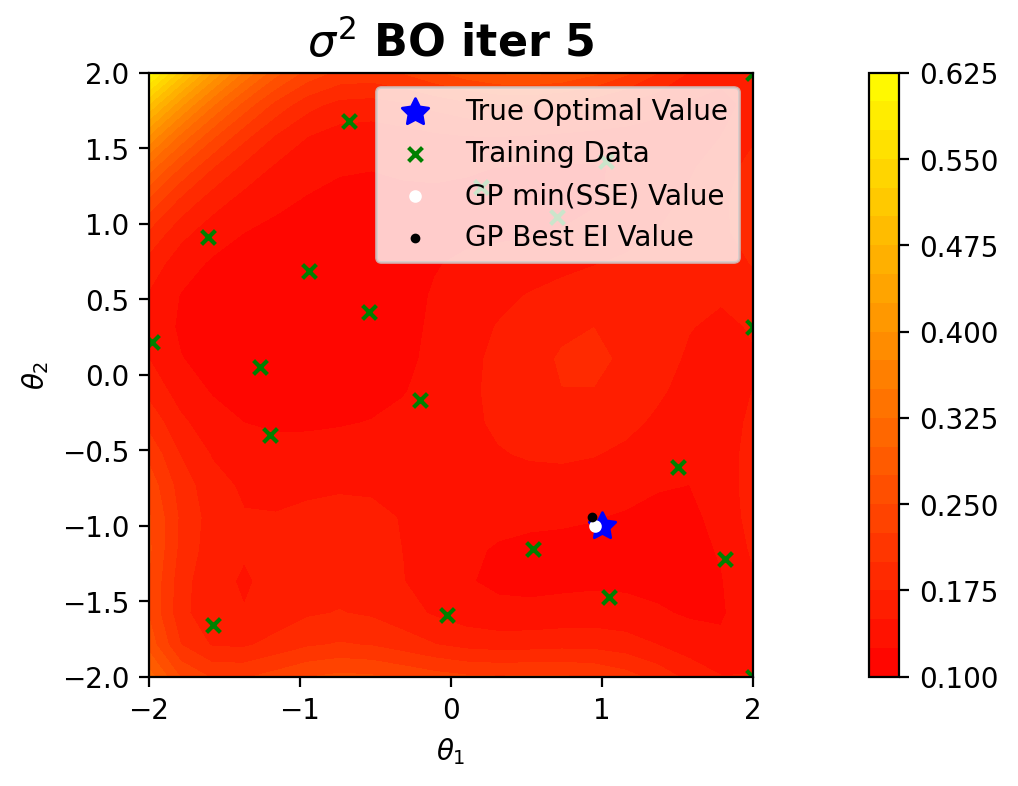

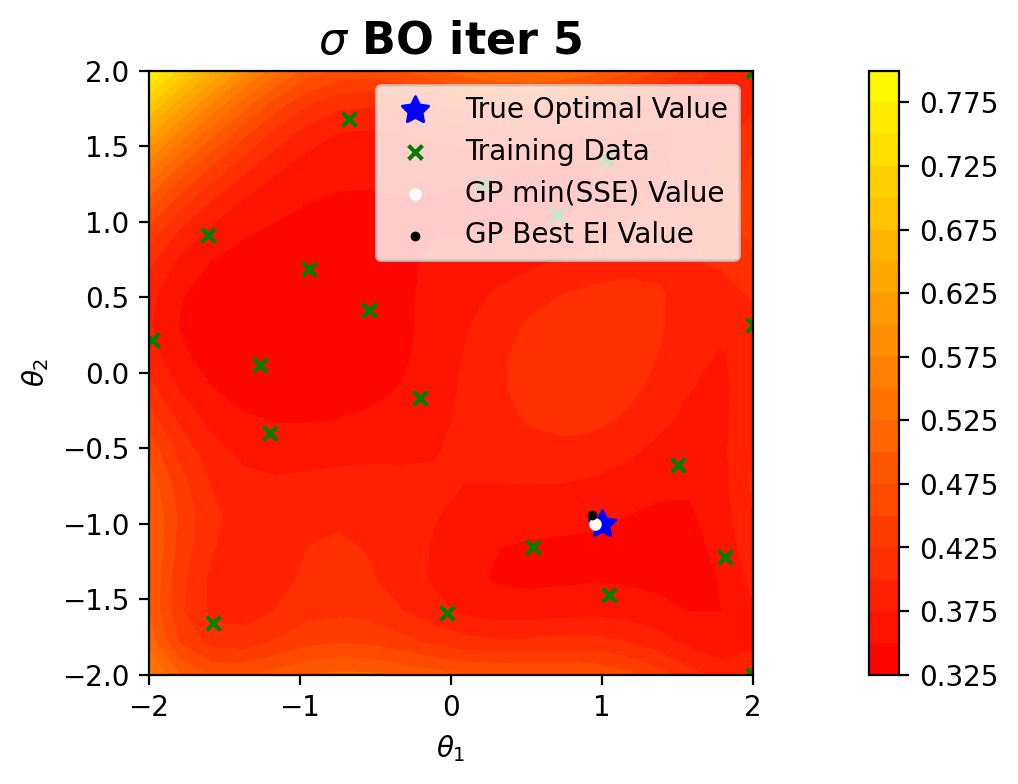

Best Error is: 1.0376


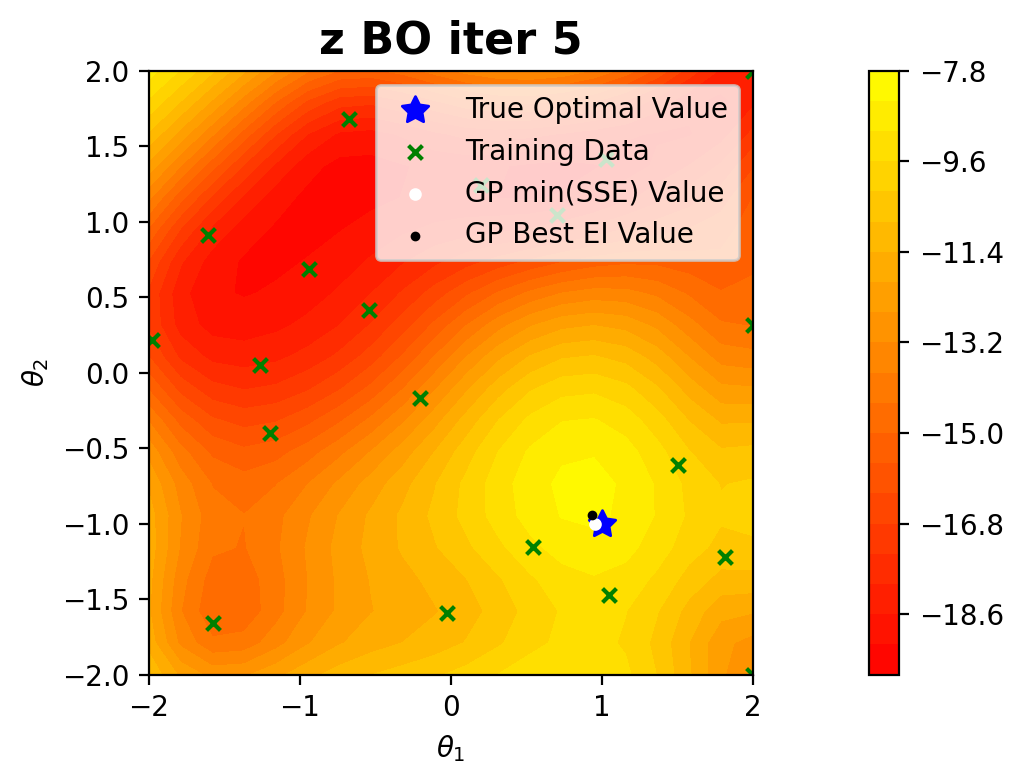

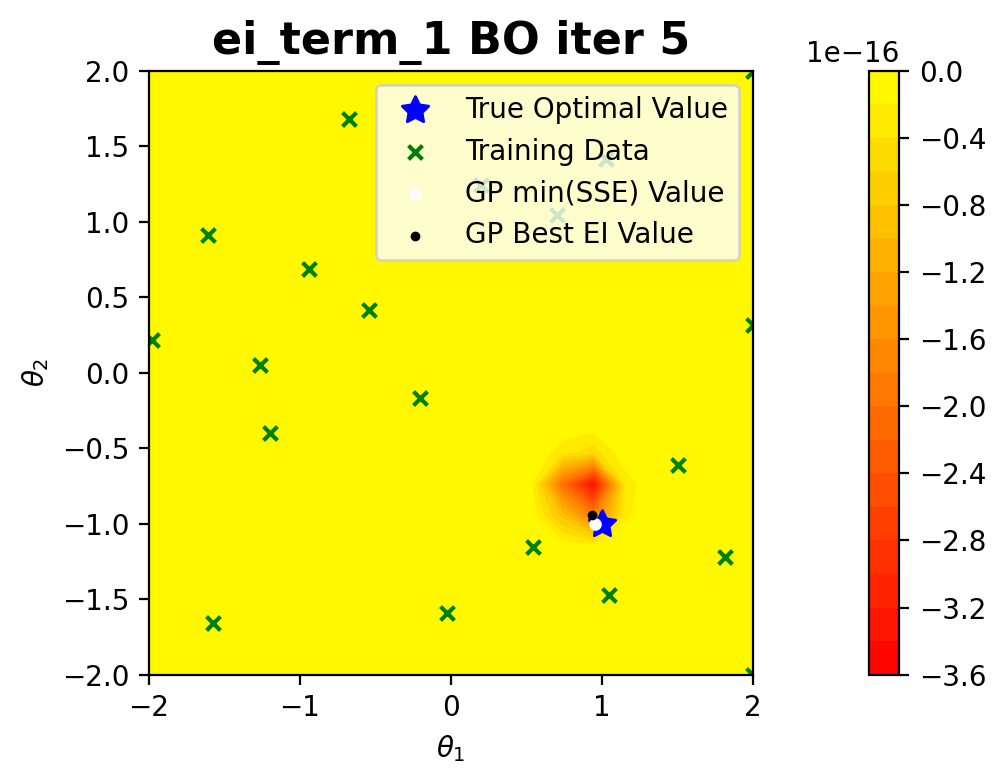

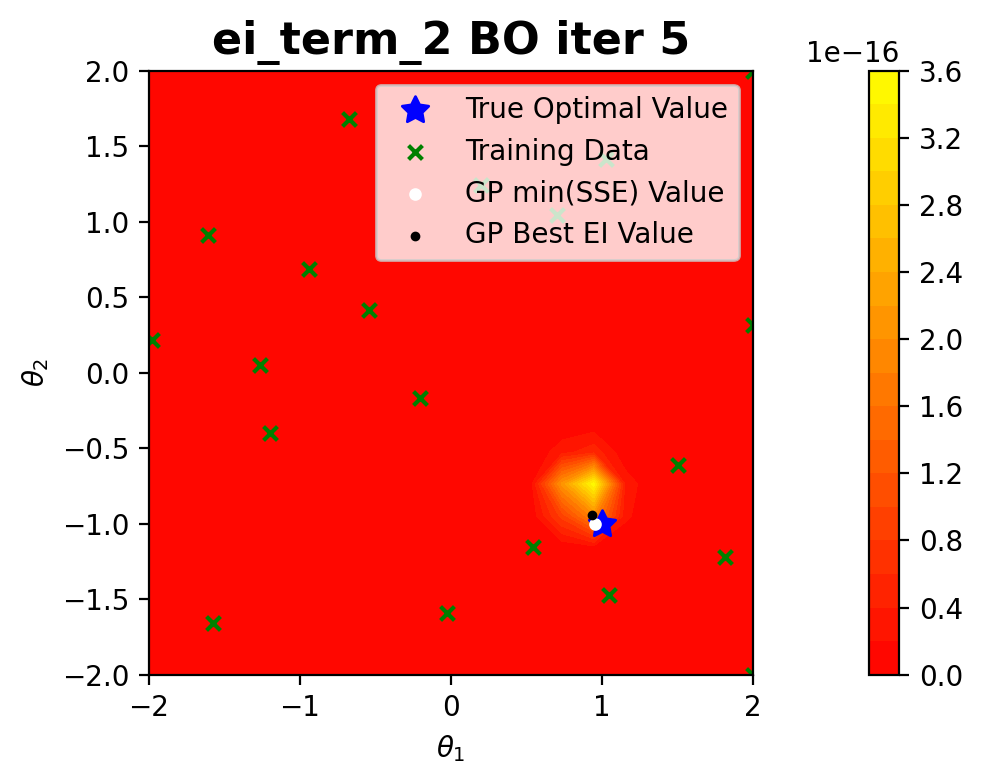

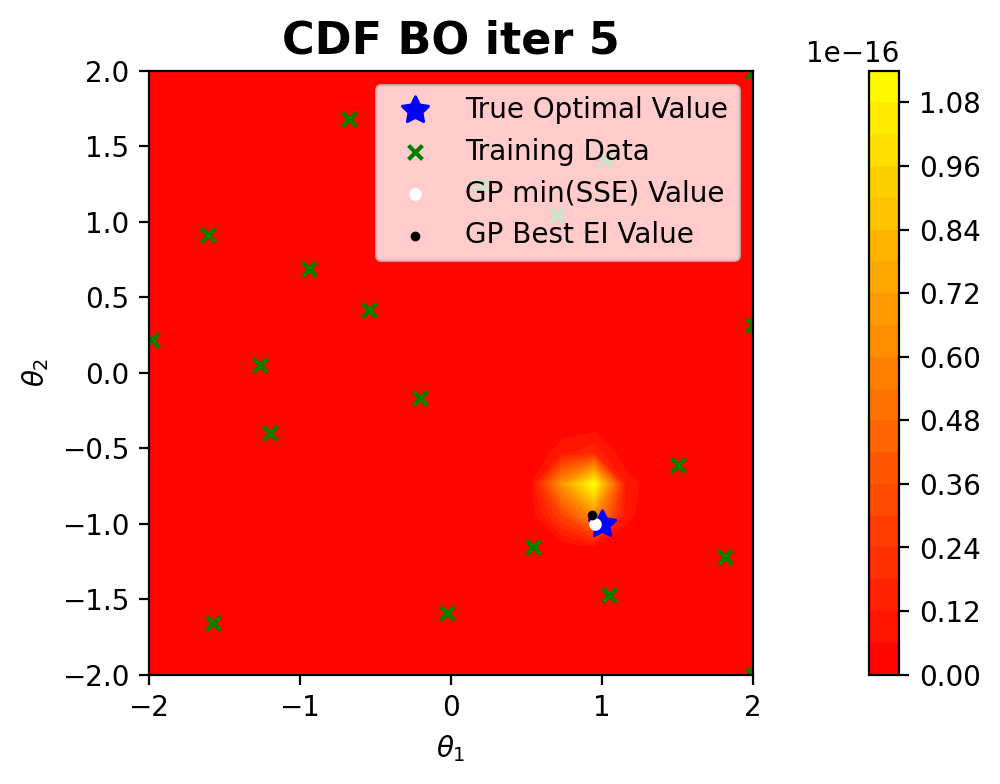

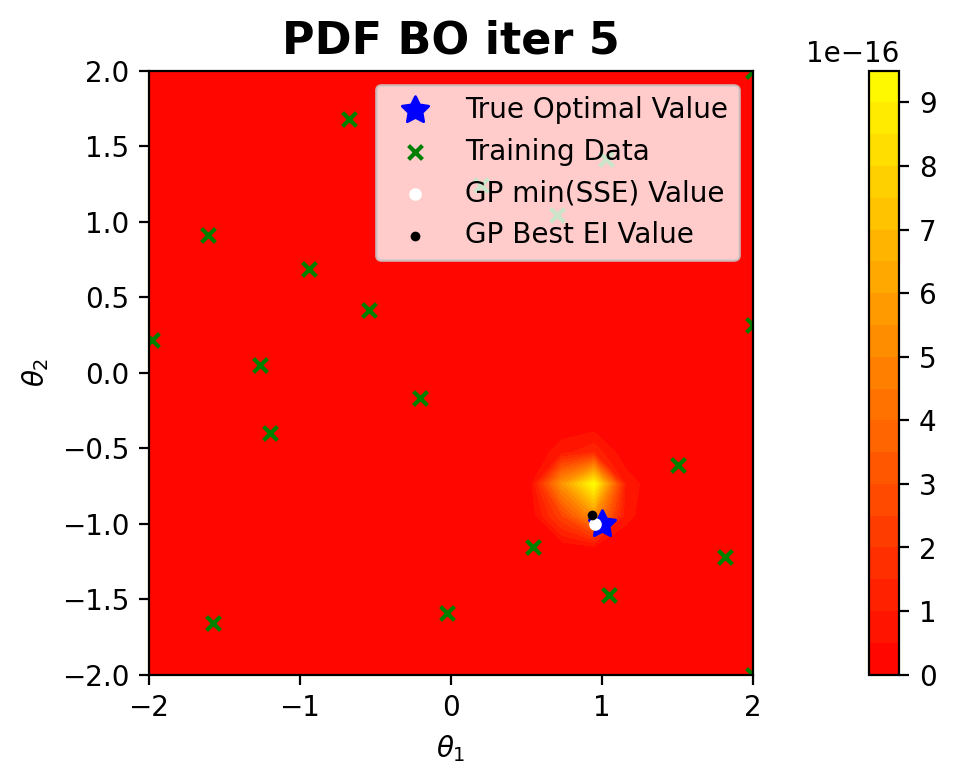

Magnitude of ln(SSE) given Theta_Opt =  [ 0.95570377 -1.00015556] is -4.1959e+00
BO Iteration =  6
Jasrasaria EP: -0.5698308346792159
Boyle EP: tensor(0.2435)
Exp EP: tensor(0.3652)
Exploration Bias =  tensor(0.3652)
Scipy Theta Best =  [ 0.86929985 -0.78791239]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.90738894 -0.90323928]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



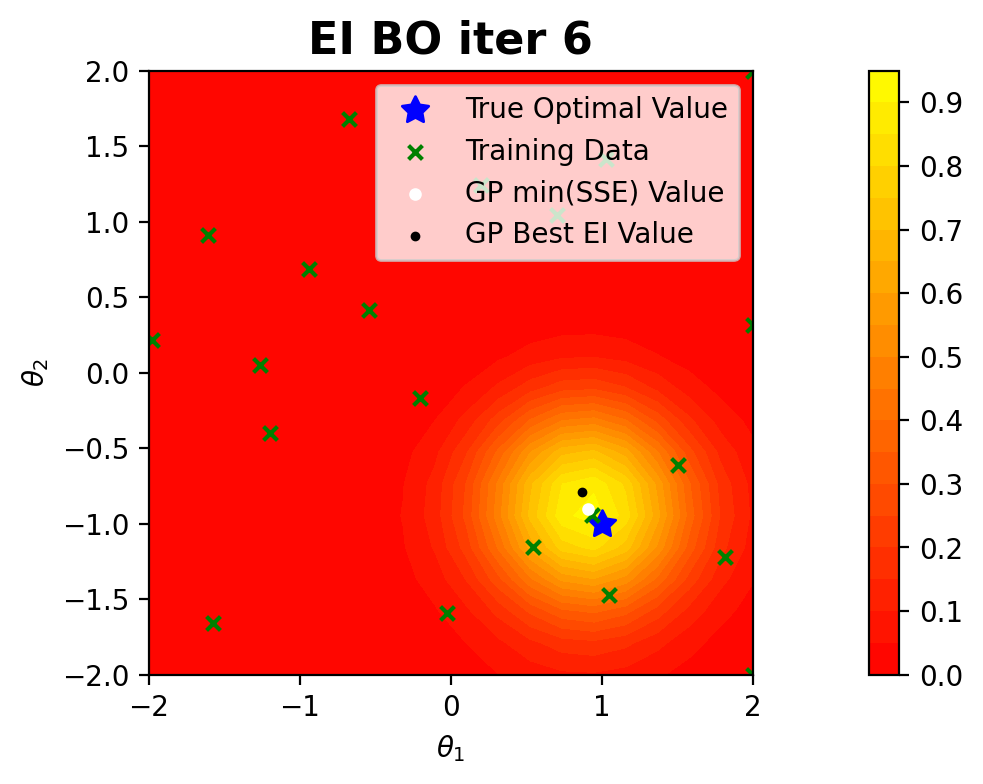

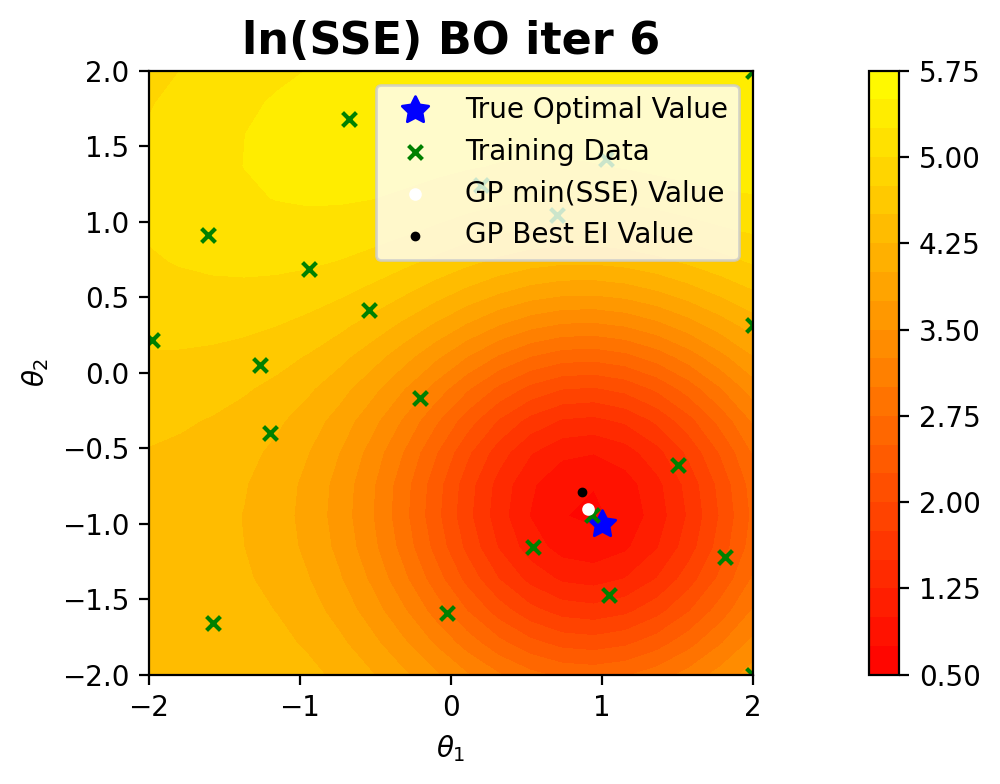

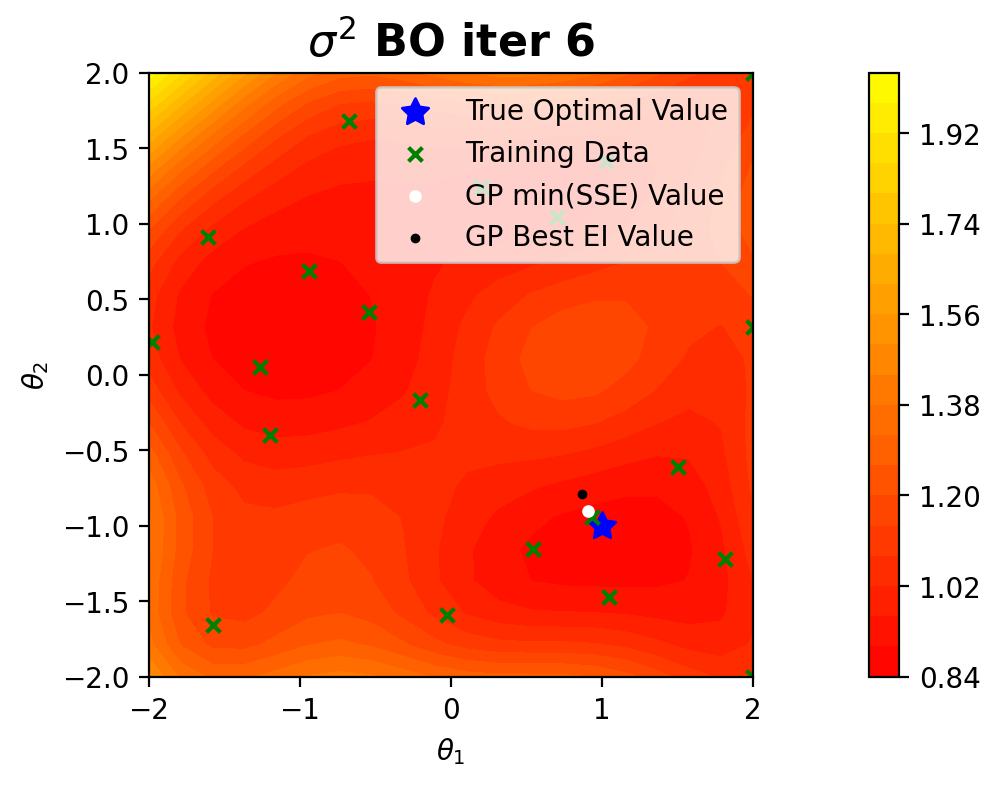

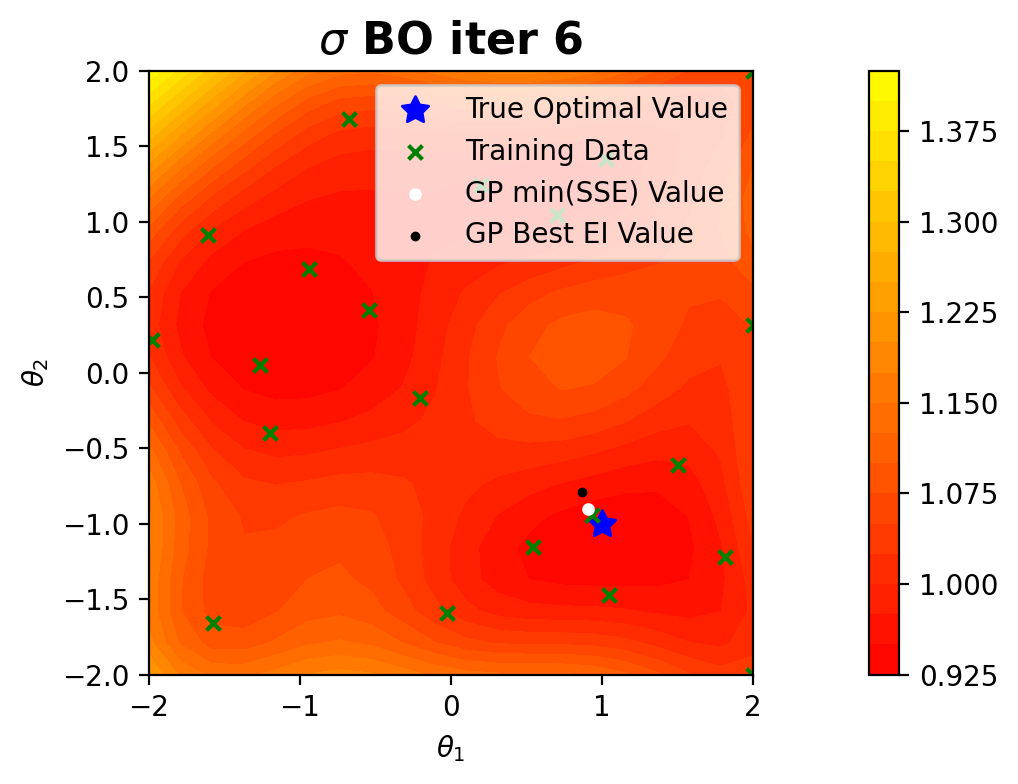

Best Error is: -1.8991


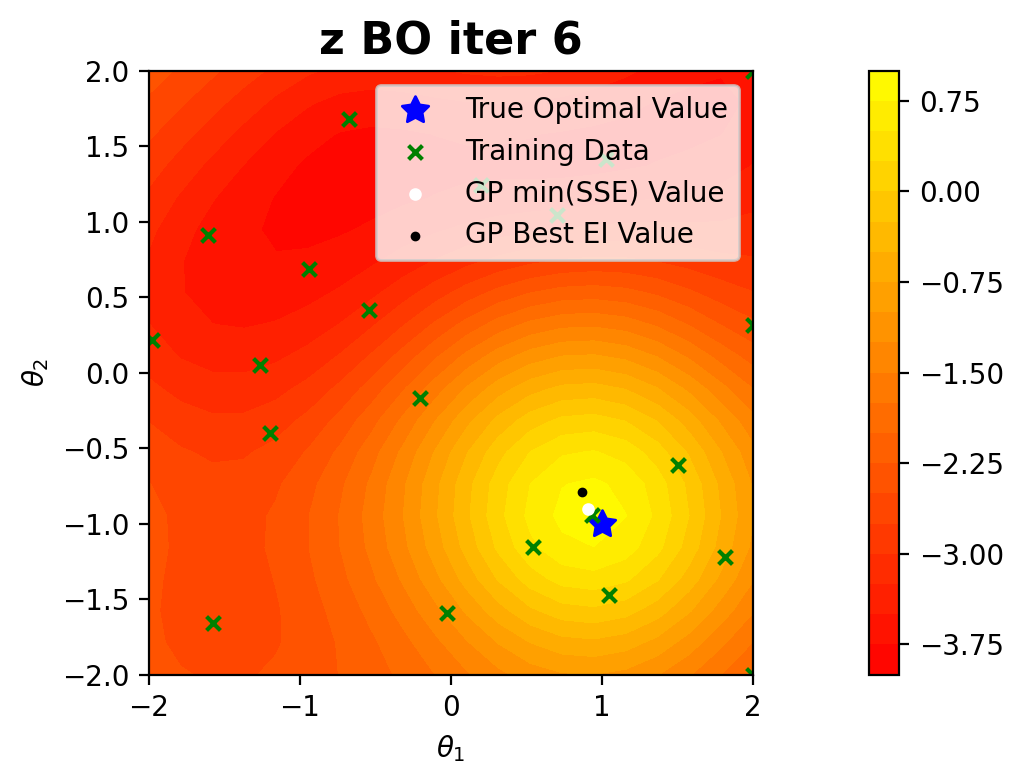

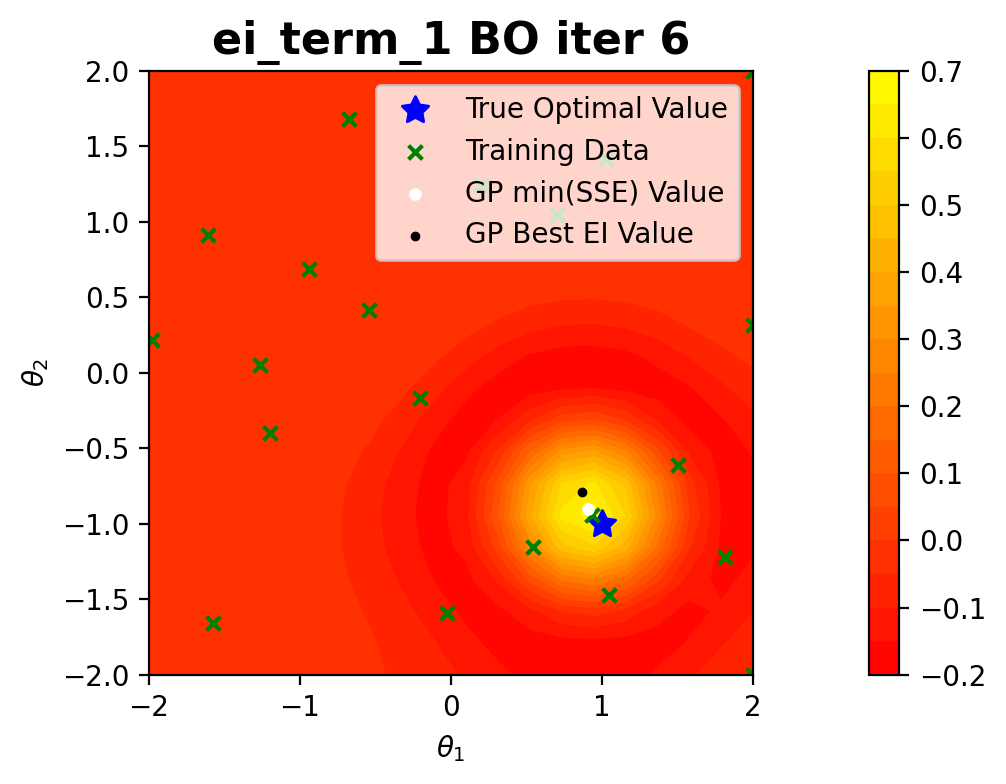

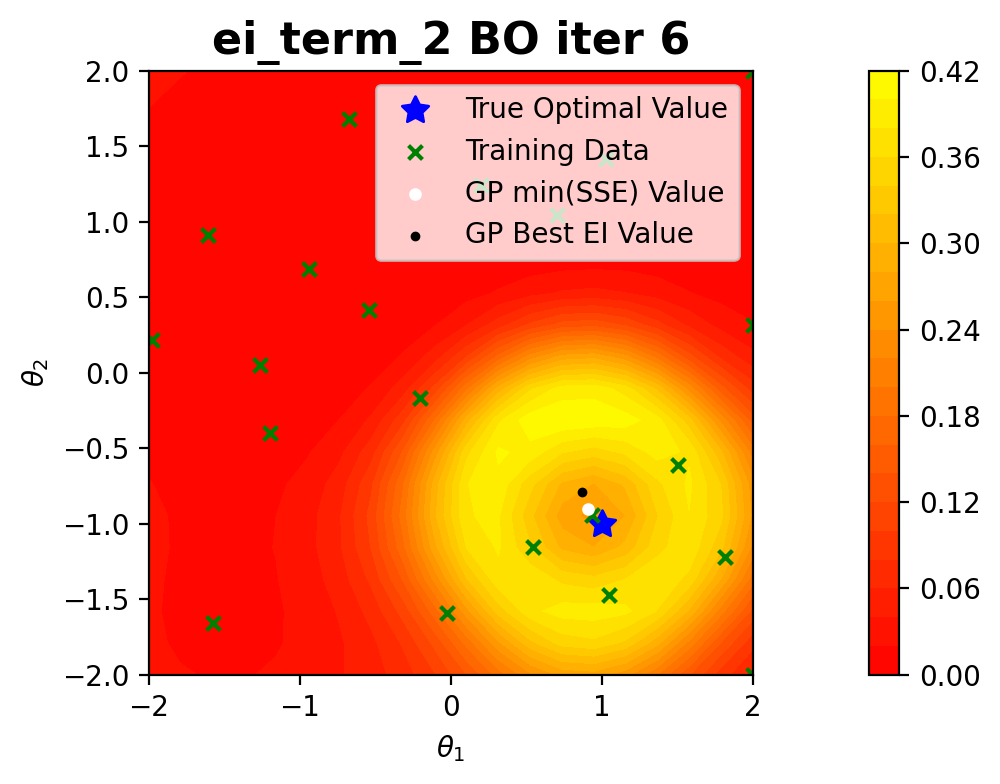

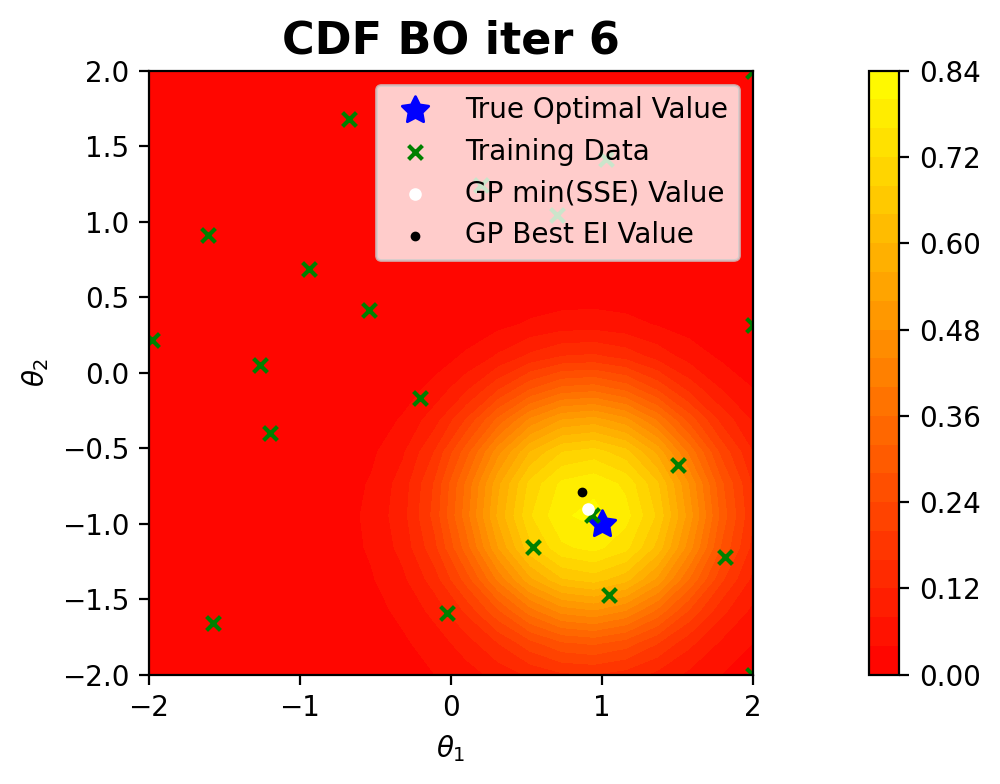

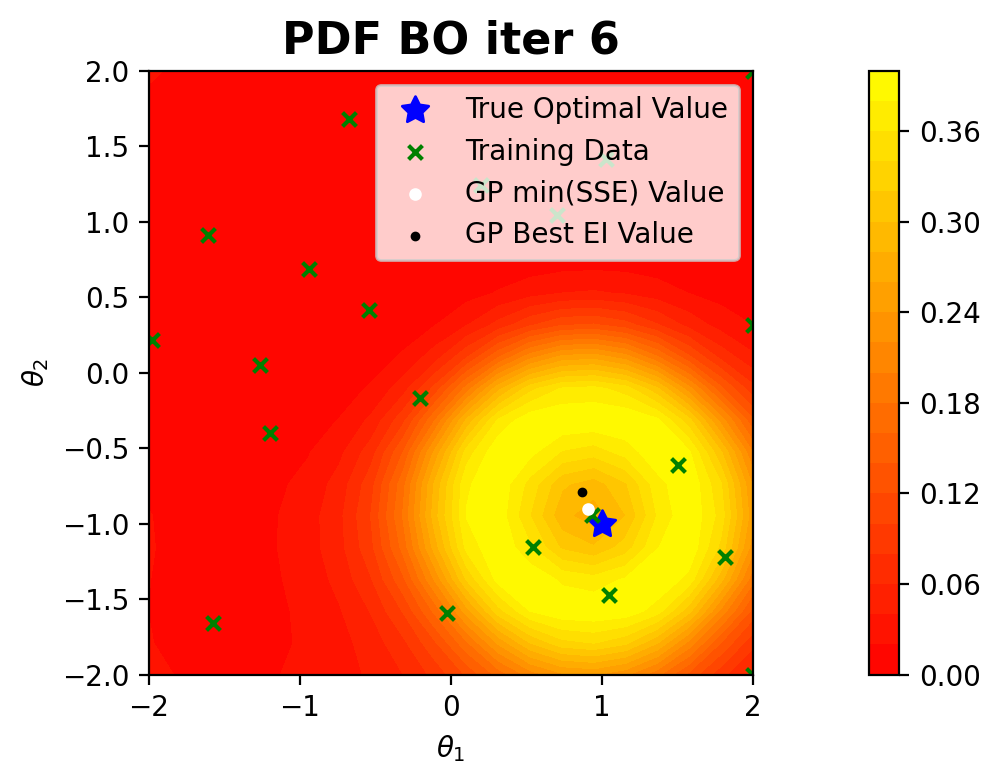

Magnitude of ln(SSE) given Theta_Opt =  [ 0.90738894 -0.90323928] is -8.7759e-01
BO Iteration =  7
Jasrasaria EP: -0.5249084049889954
Boyle EP: tensor(0.2108)
Exp EP: tensor(0.3163)
Exploration Bias =  tensor(0.3163)
Scipy Theta Best =  [ 0.8751557  -0.80688992]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.90341051 -0.89024536]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



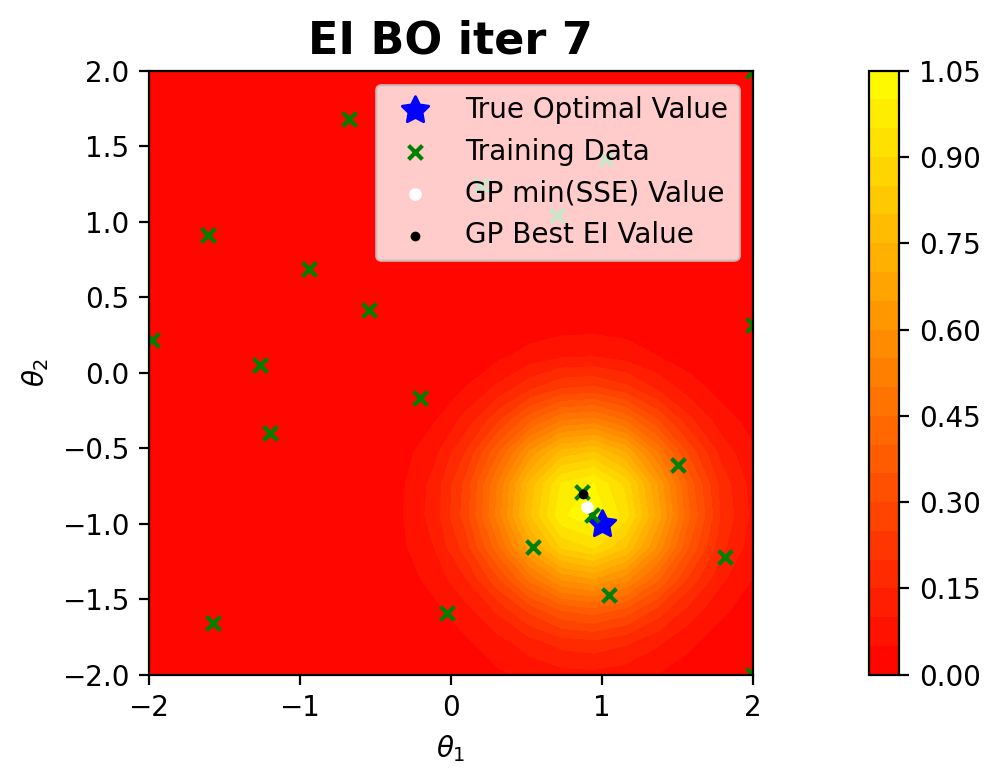

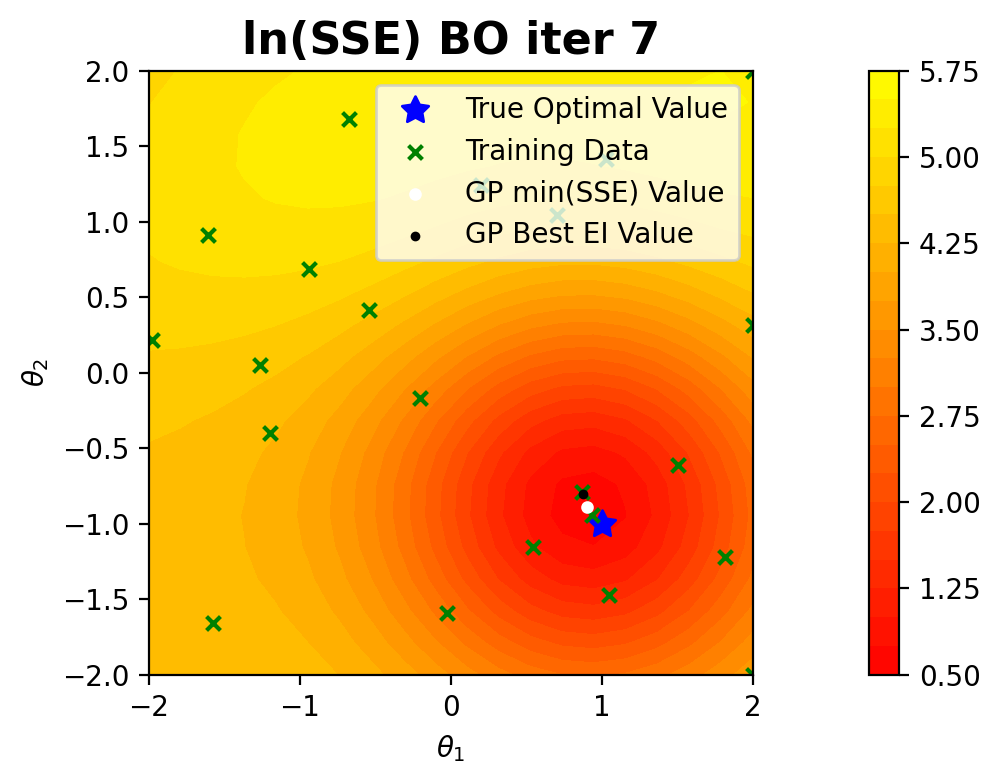

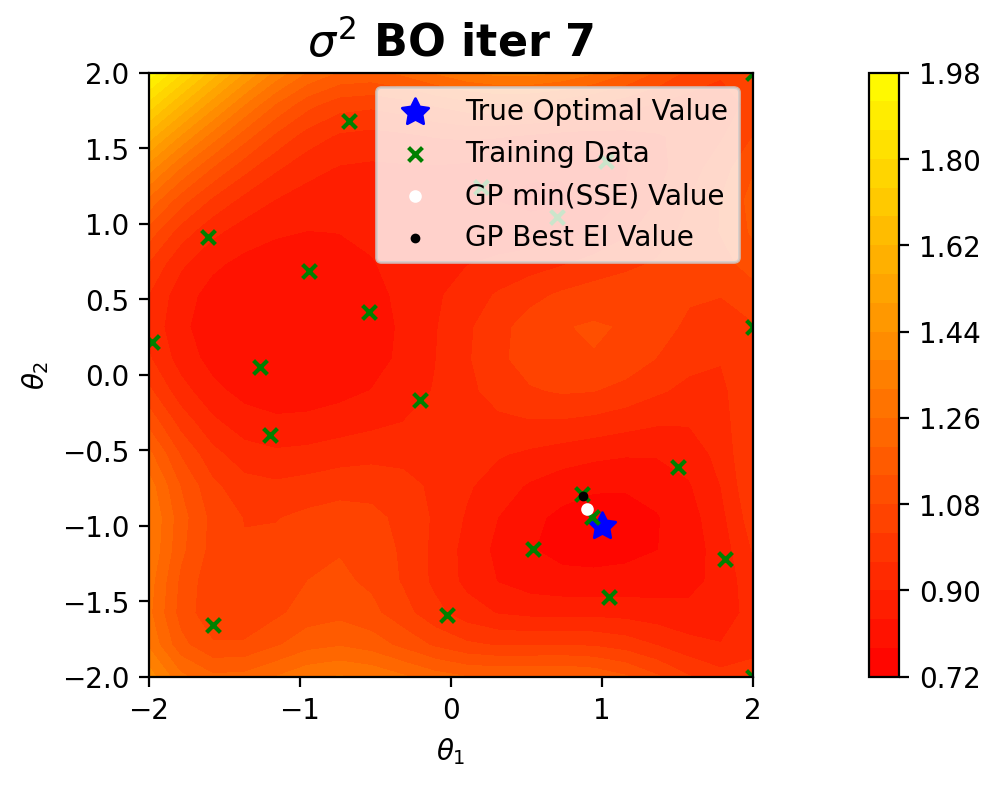

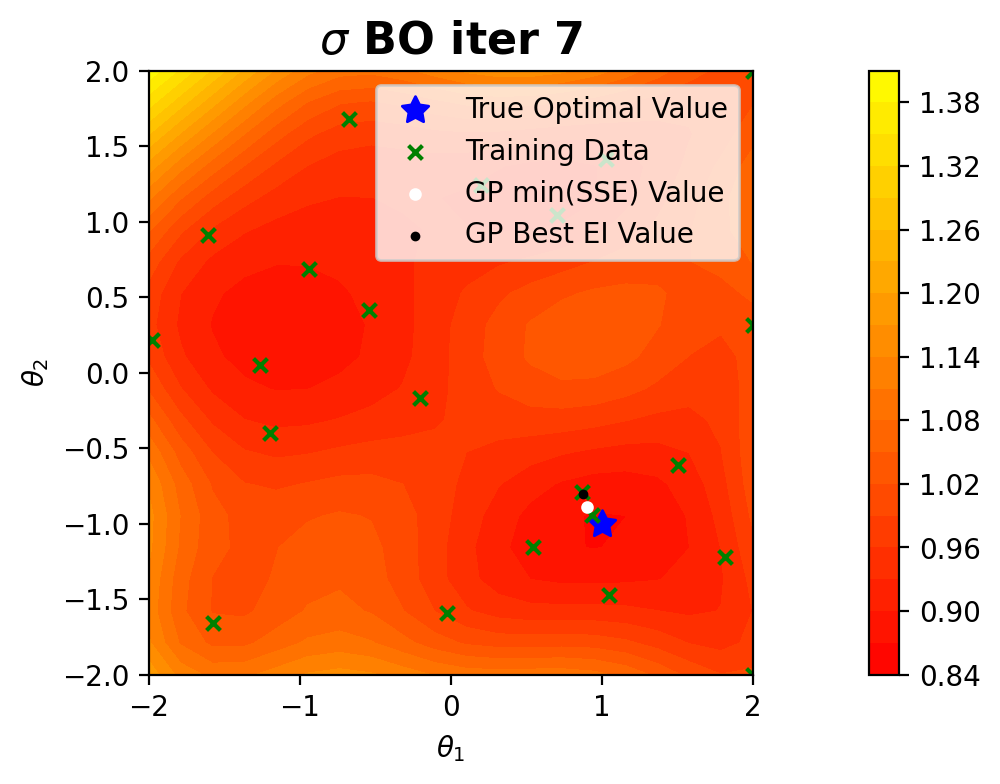

Best Error is: -1.8991


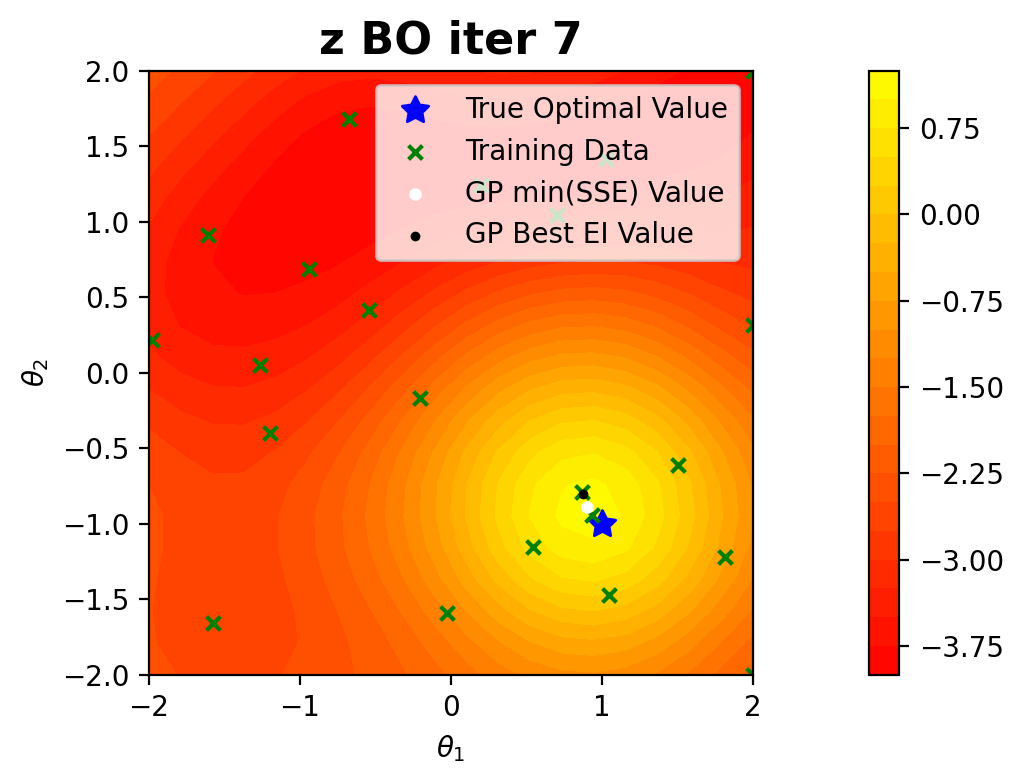

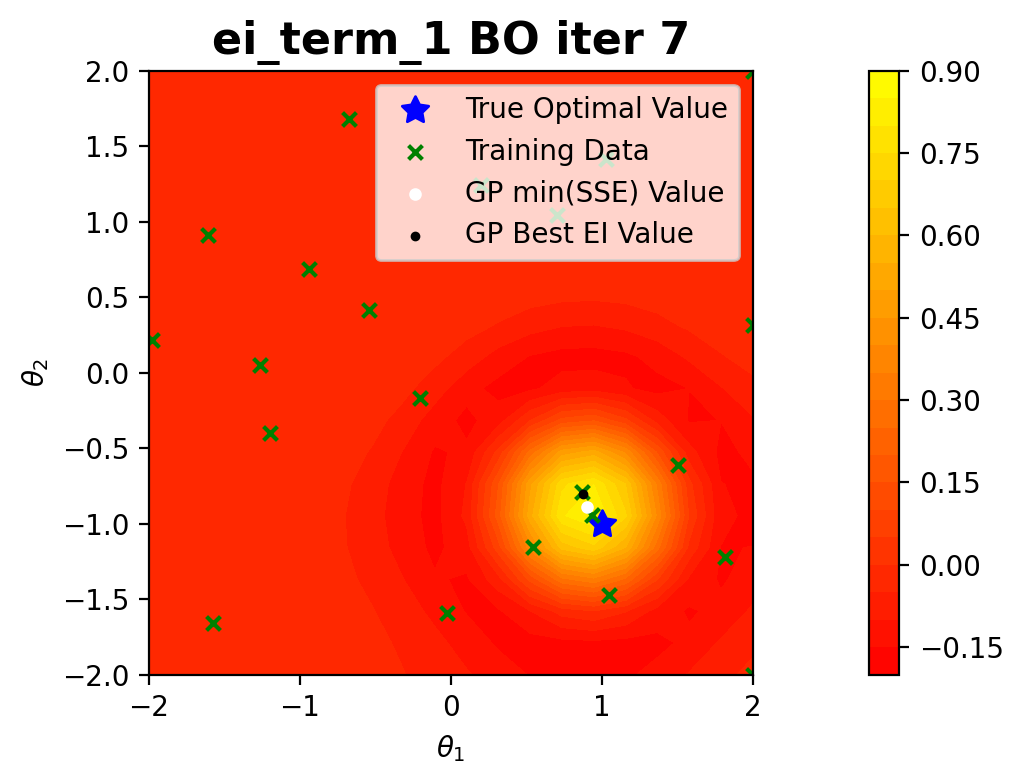

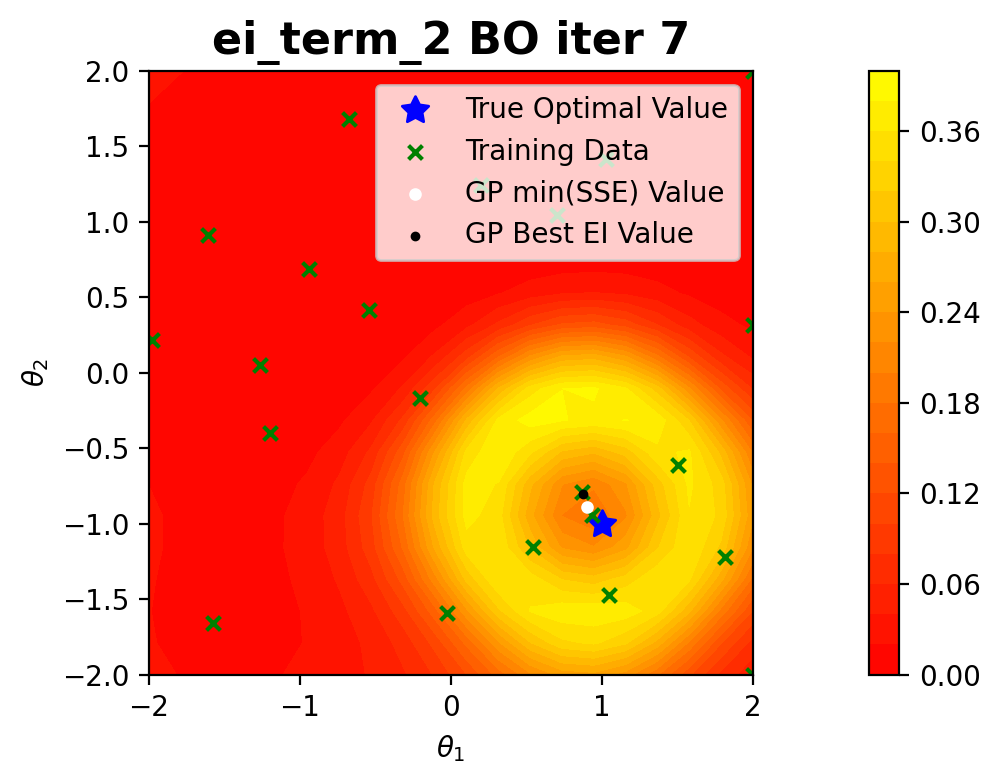

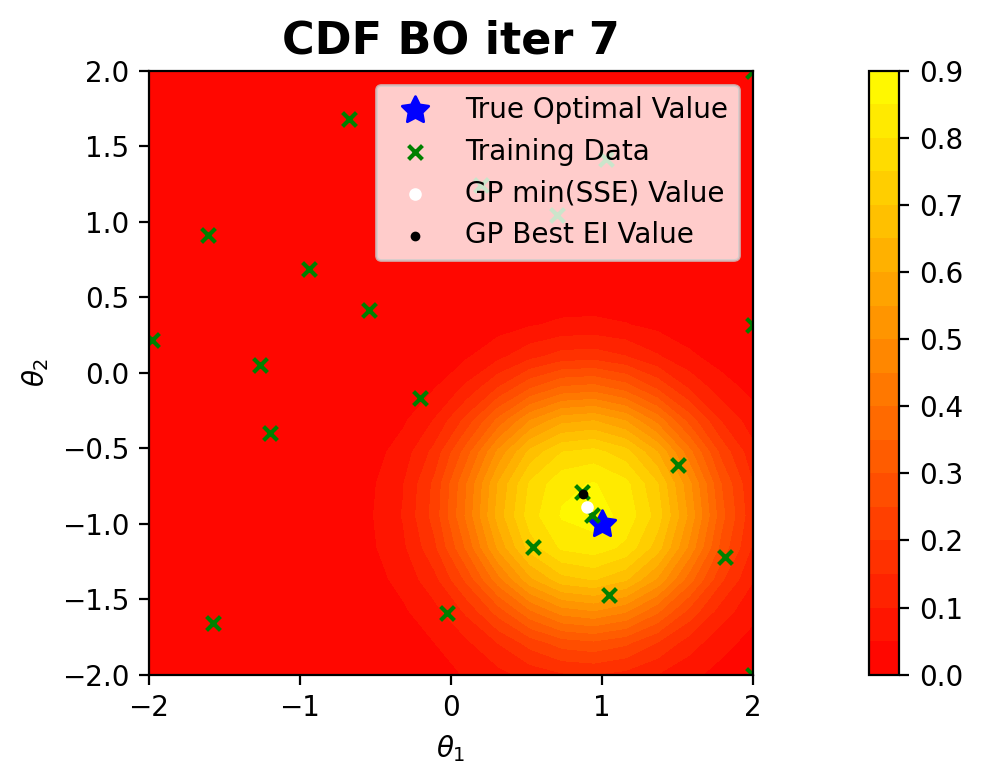

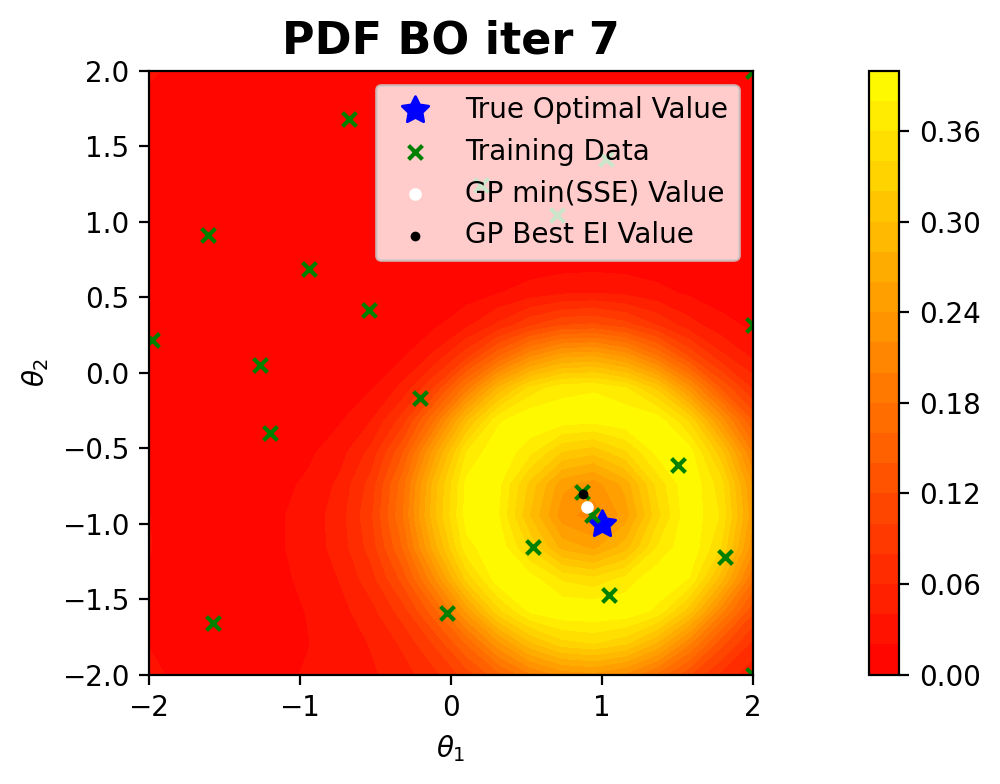

Magnitude of ln(SSE) given Theta_Opt =  [ 0.90341051 -0.89024536] is -6.5966e-01
BO Iteration =  8
Jasrasaria EP: -0.48823237276184217
Boyle EP: tensor(0.1826)
Exp EP: tensor(0.2739)
Exploration Bias =  tensor(0.2739)
Scipy Theta Best =  [ 0.8805764 -0.8231787]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.89971588 -0.88073618]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



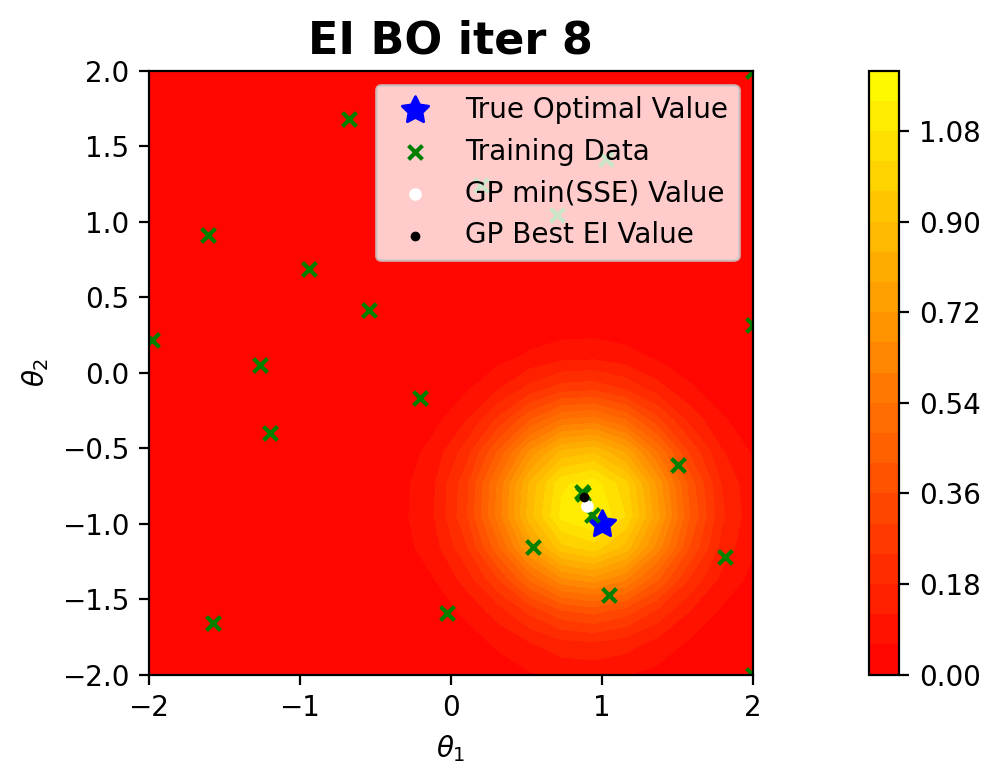

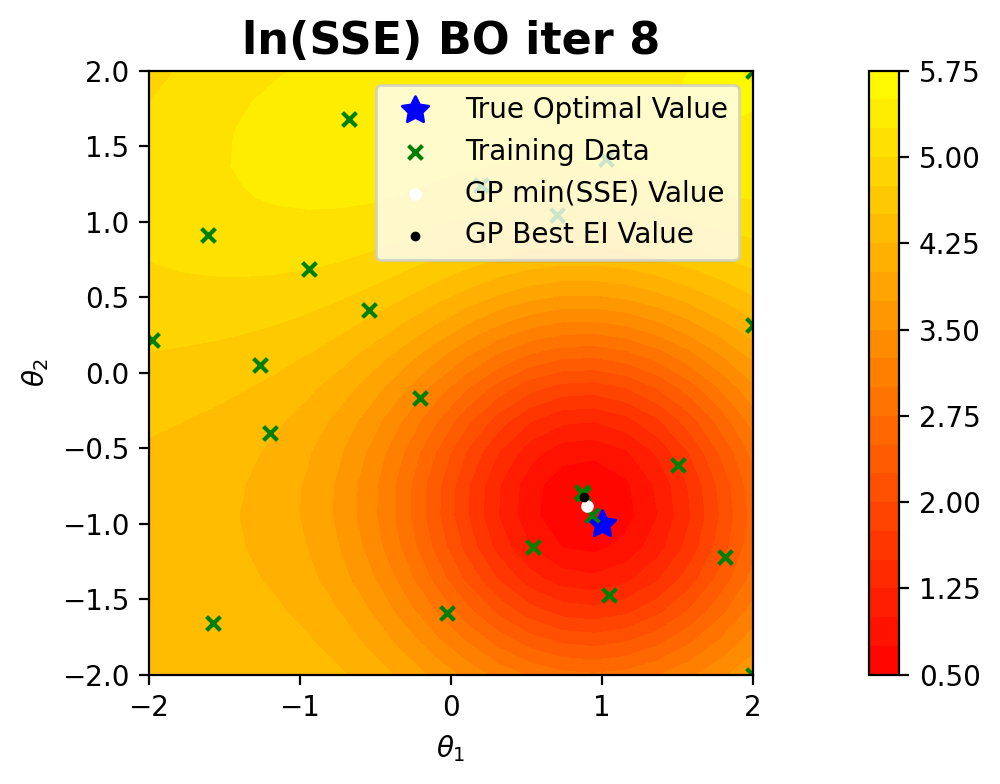

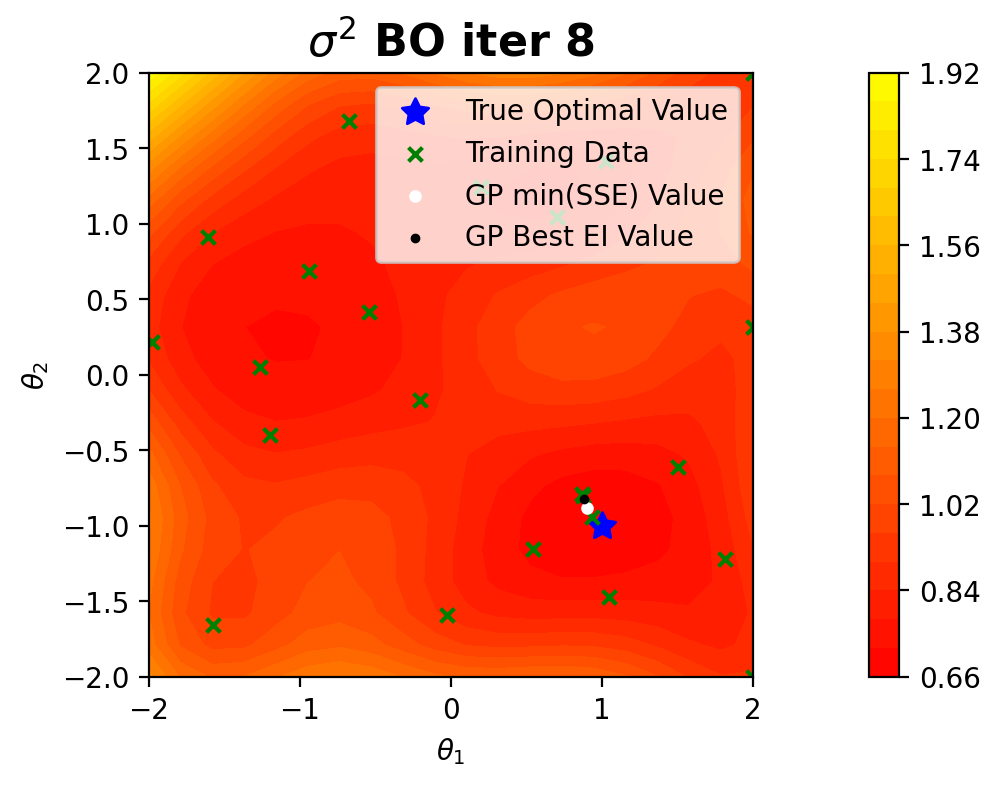

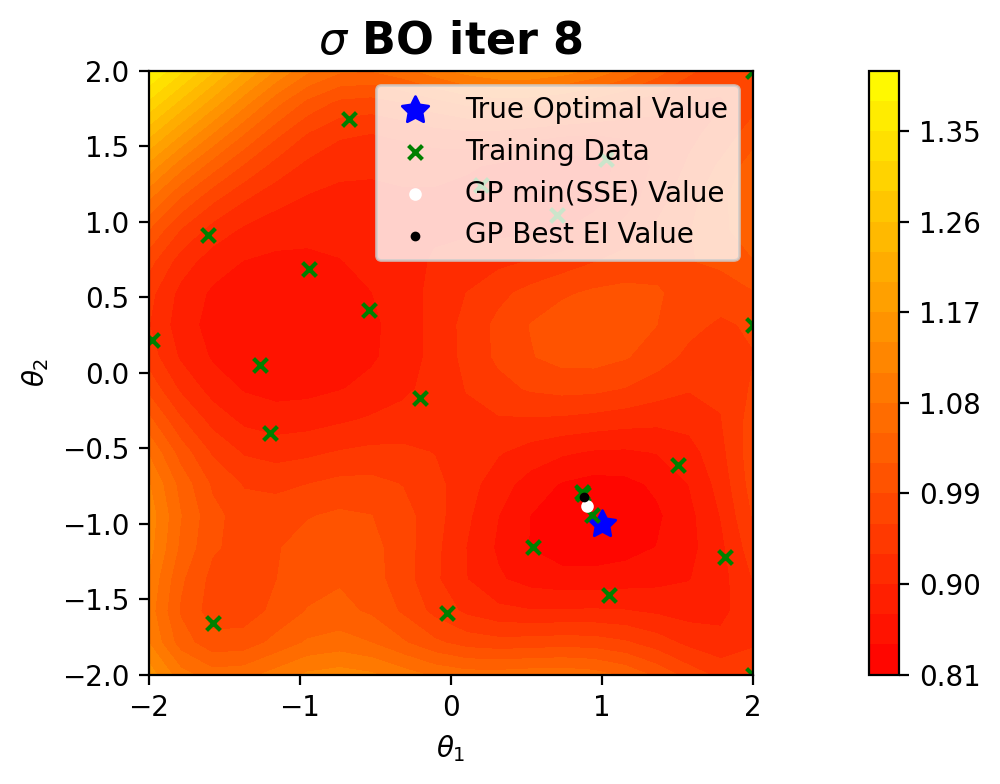

Best Error is: -1.8991


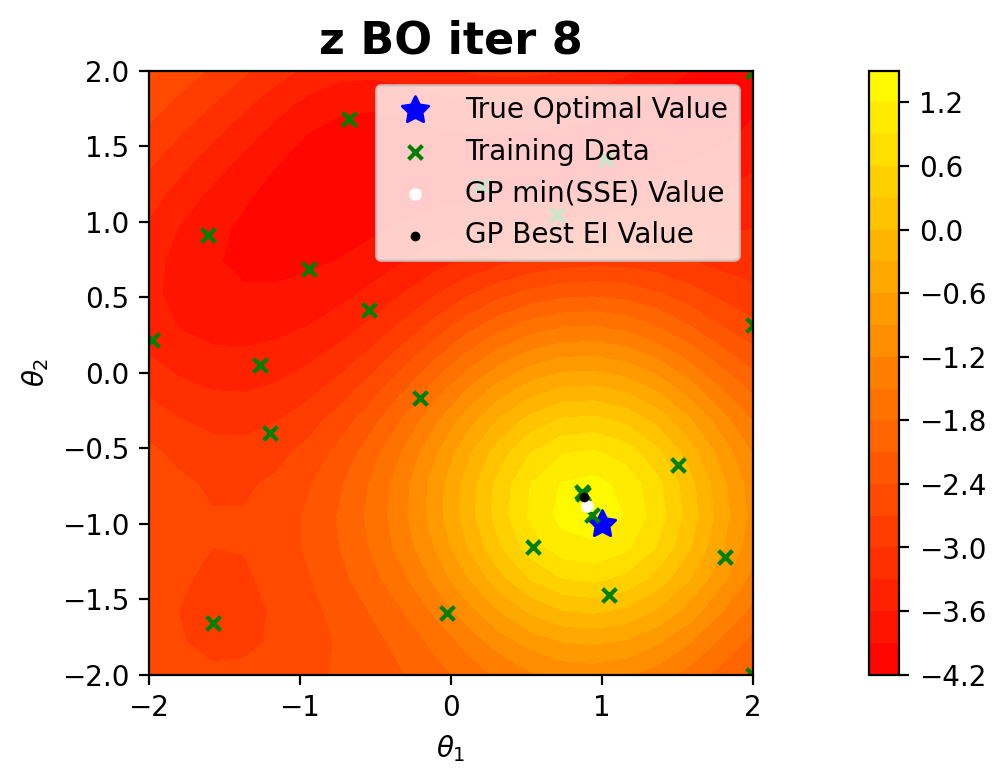

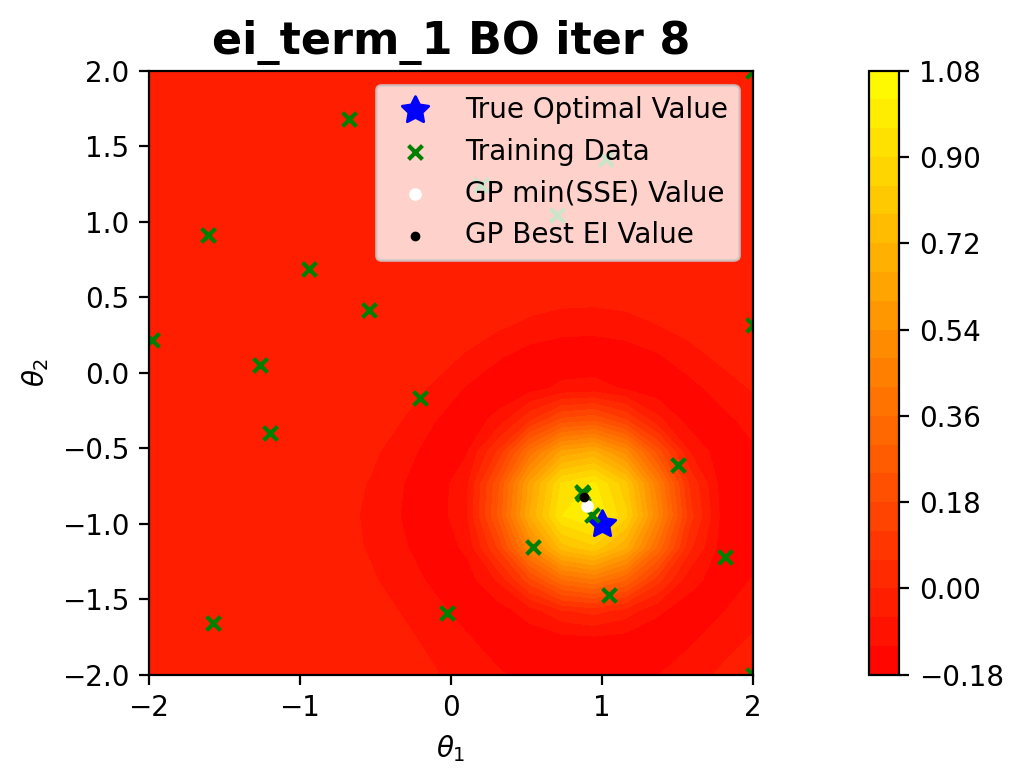

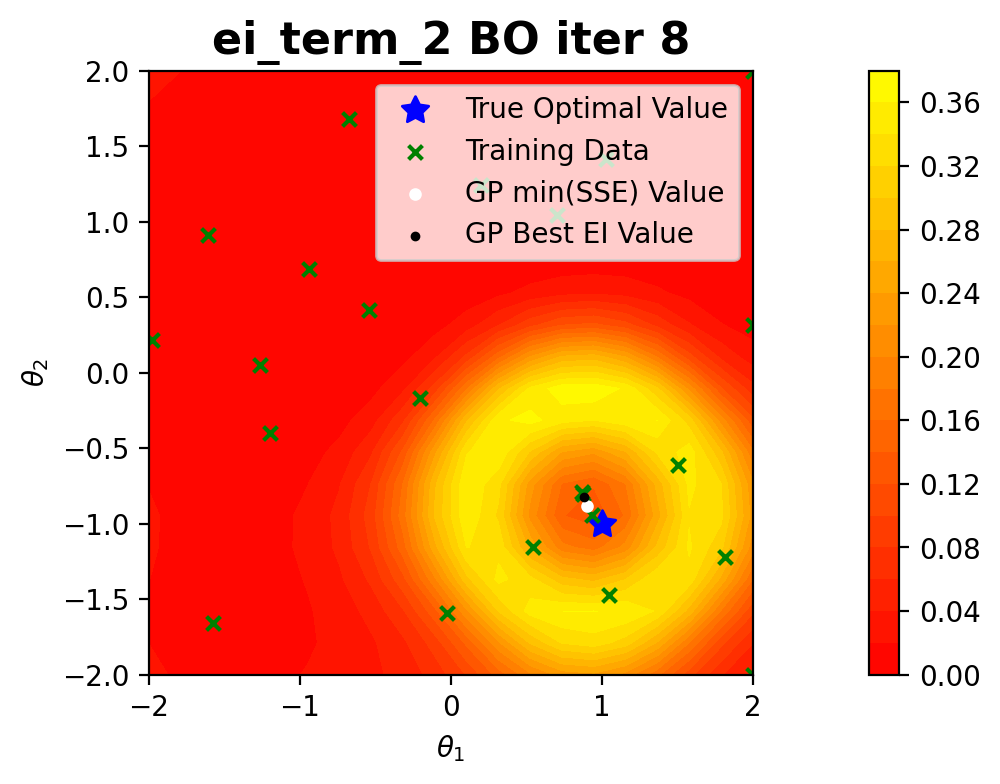

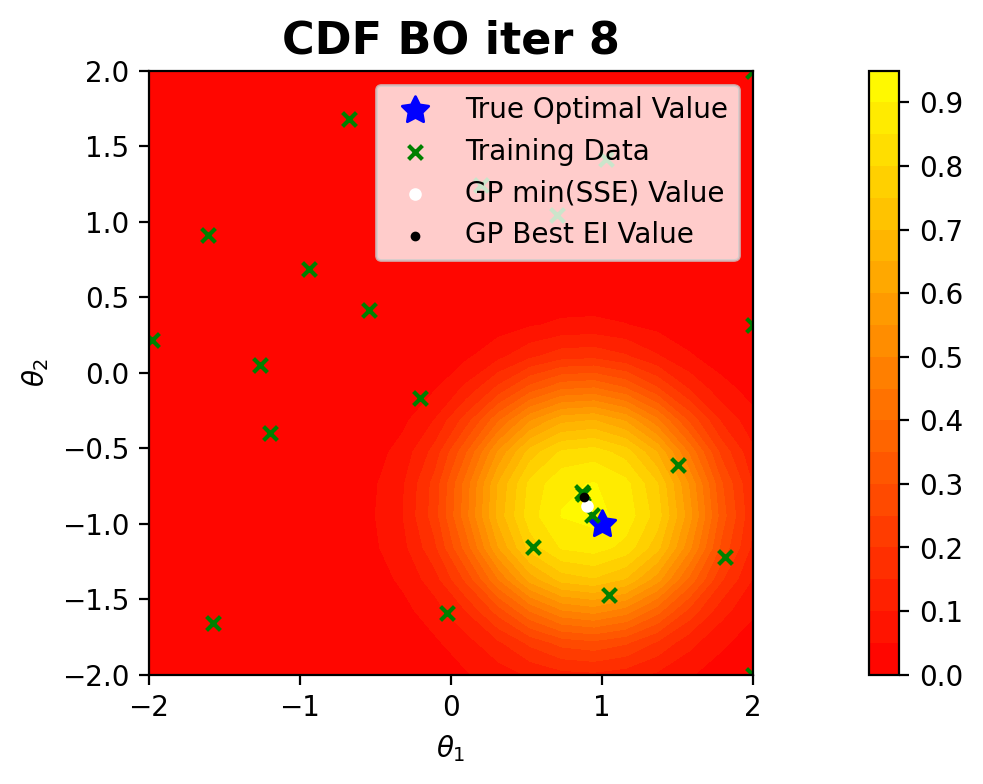

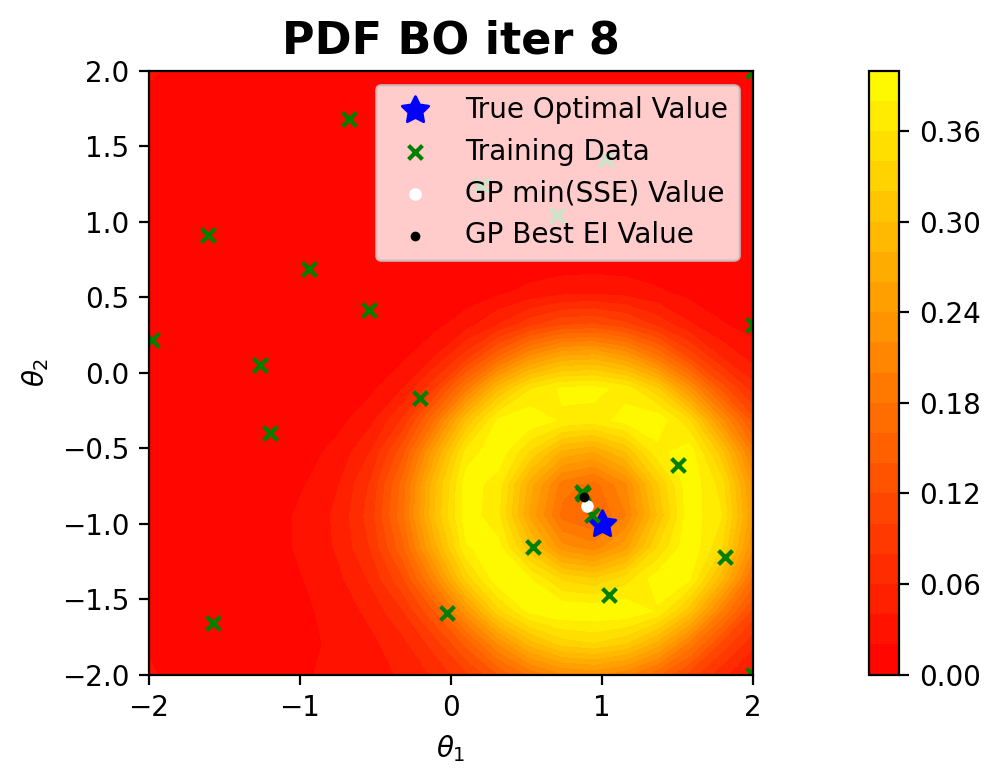

Magnitude of ln(SSE) given Theta_Opt =  [ 0.89971588 -0.88073618] is -5.1072e-01
BO Iteration =  9
Jasrasaria EP: -0.4584719995095537
Boyle EP: tensor(0.1581)
Exp EP: tensor(0.2372)
Exploration Bias =  tensor(0.2372)
Scipy Theta Best =  [ 0.88072334 -0.82798065]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.89616282 -0.87393324]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



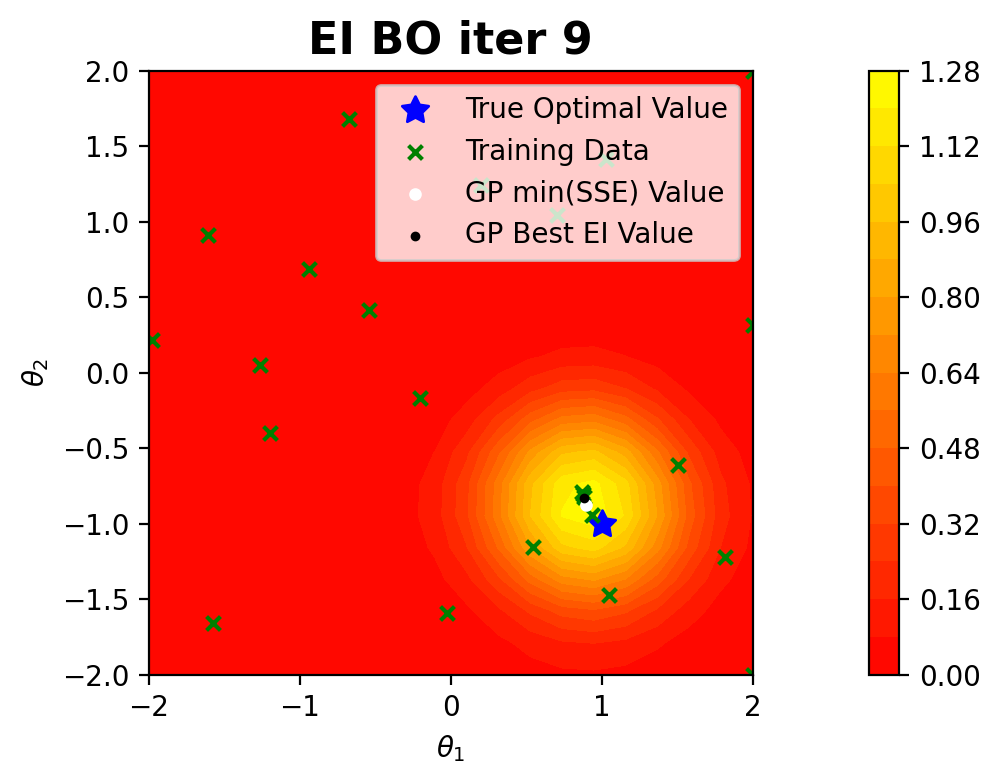

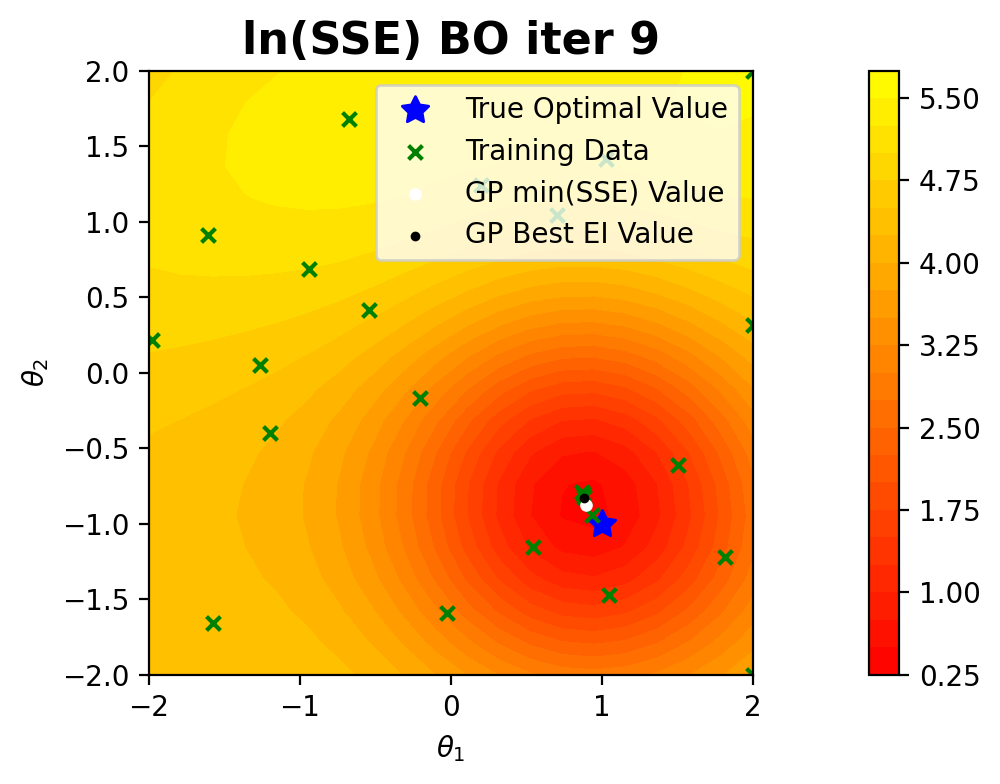

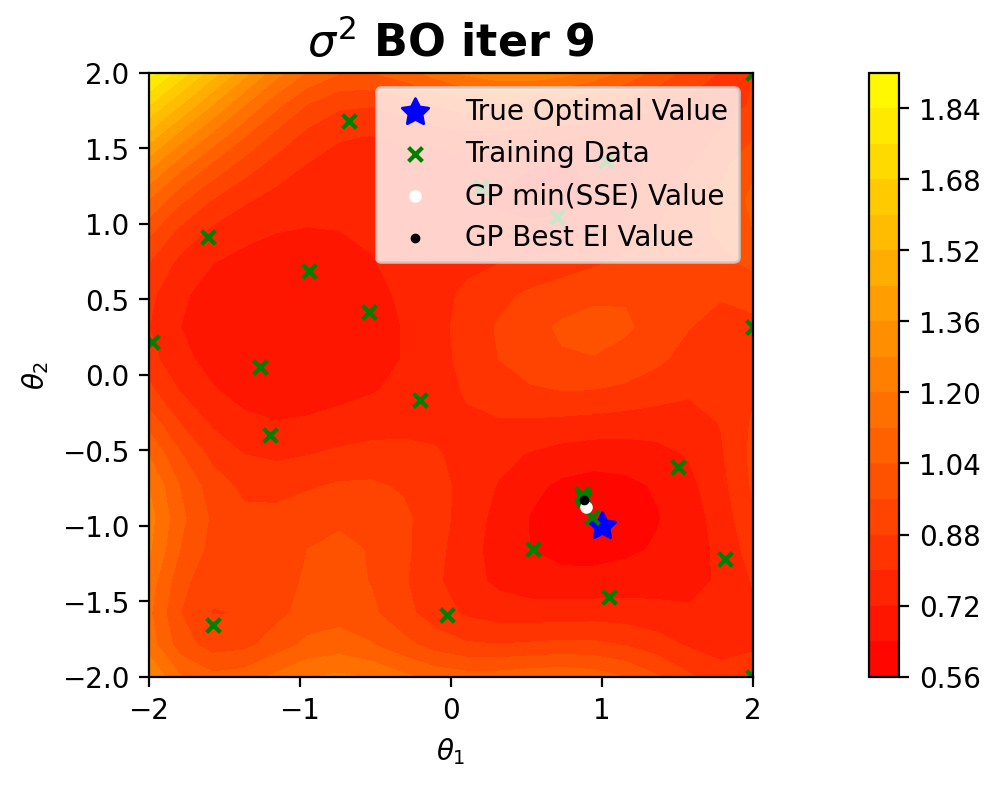

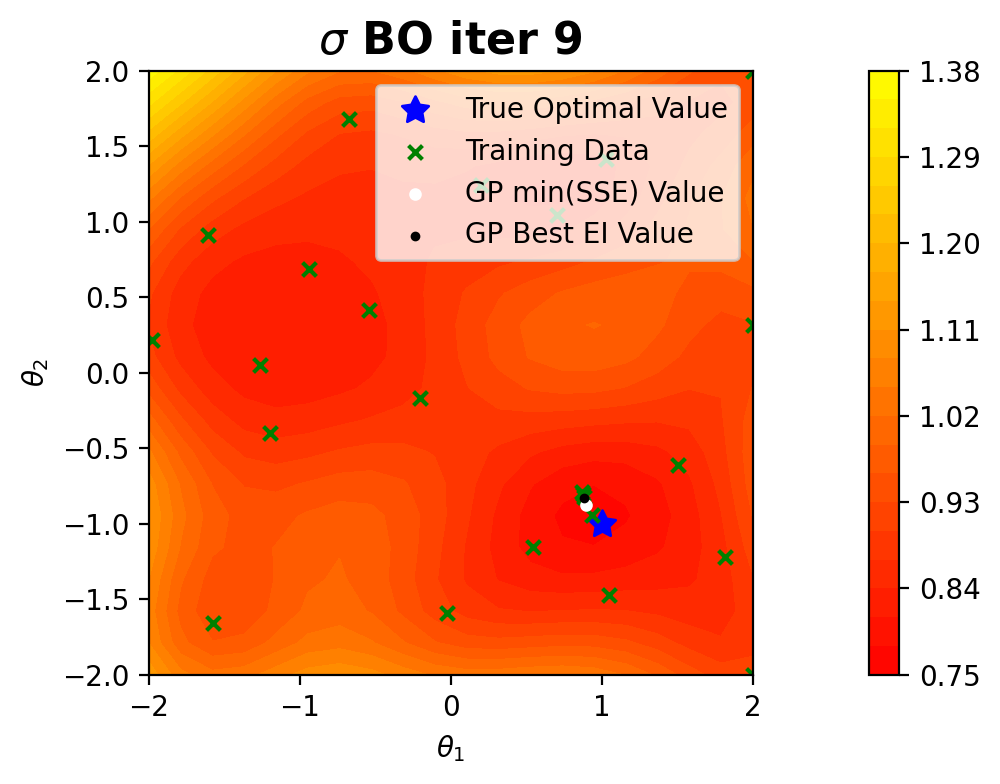

Best Error is: -1.8991


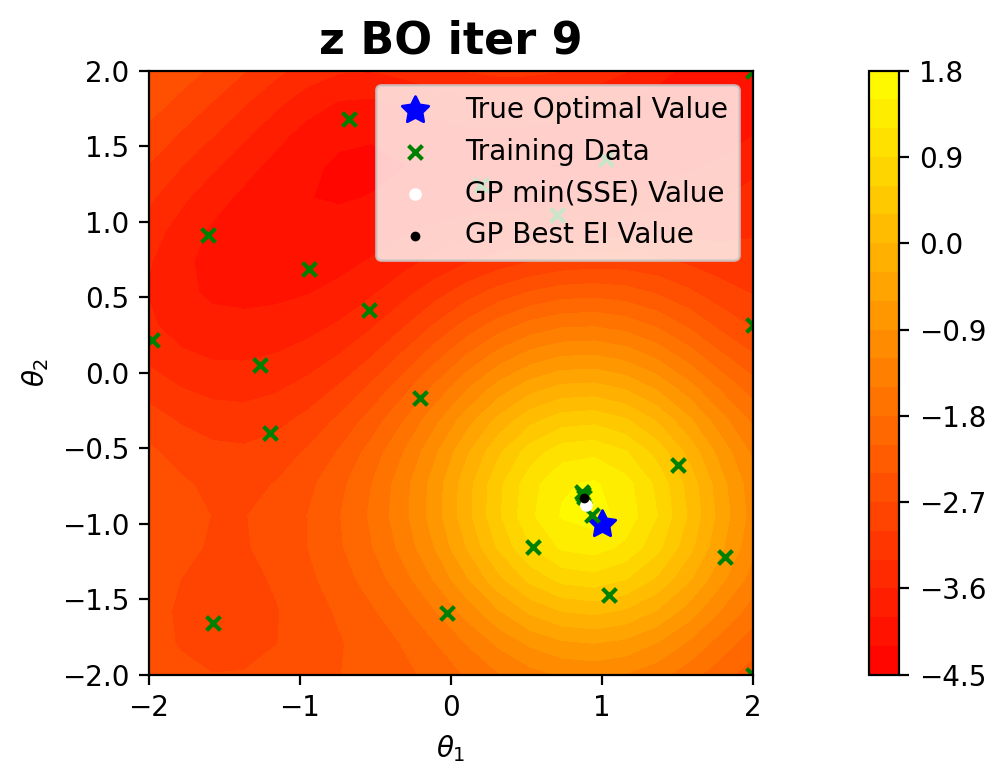

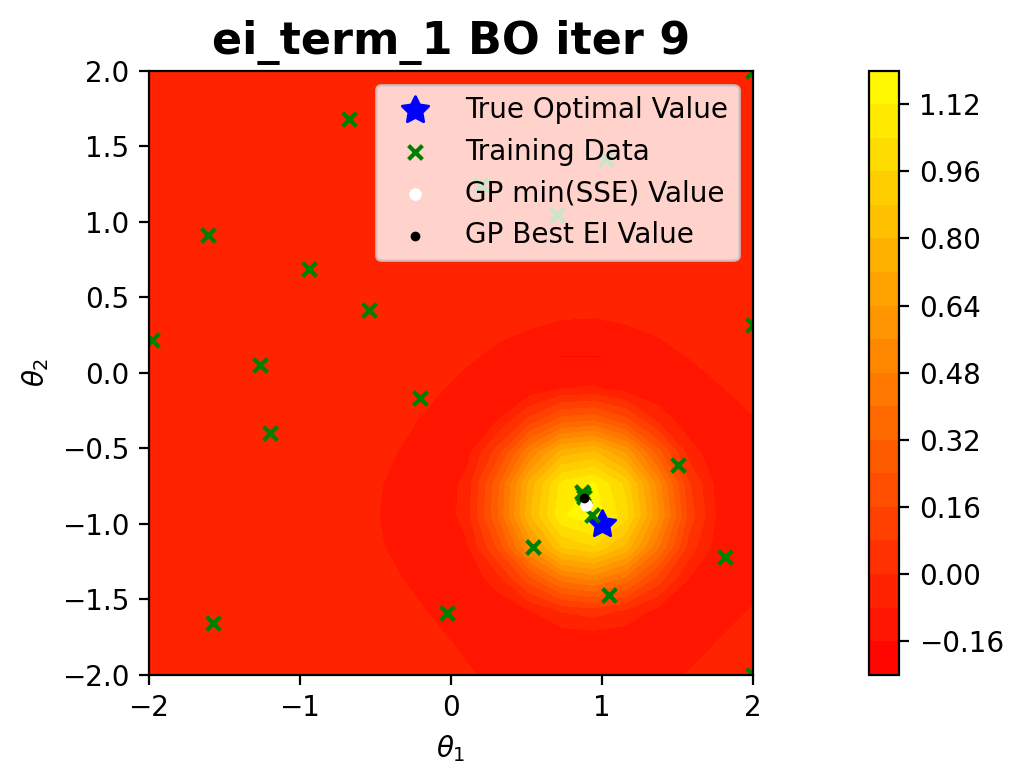

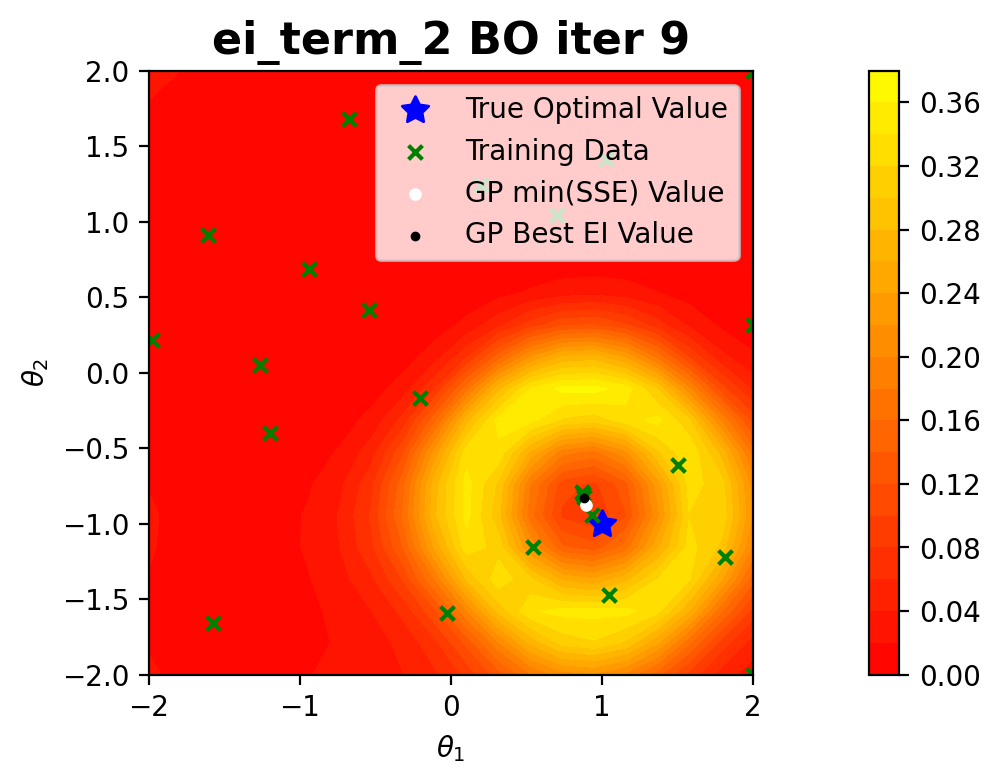

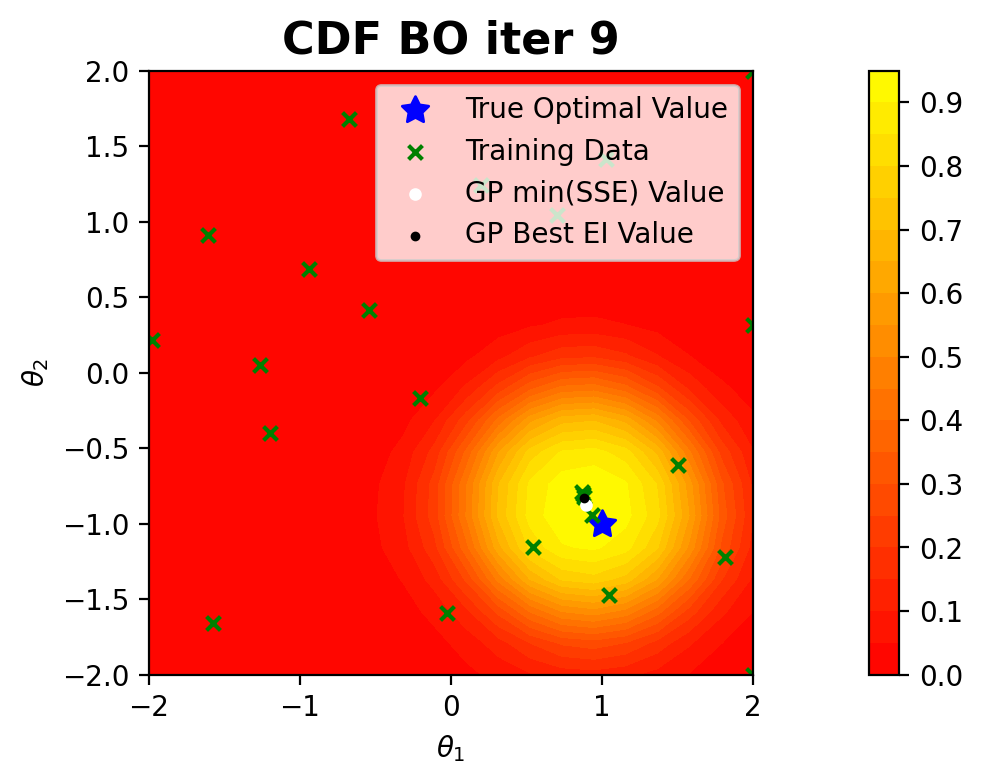

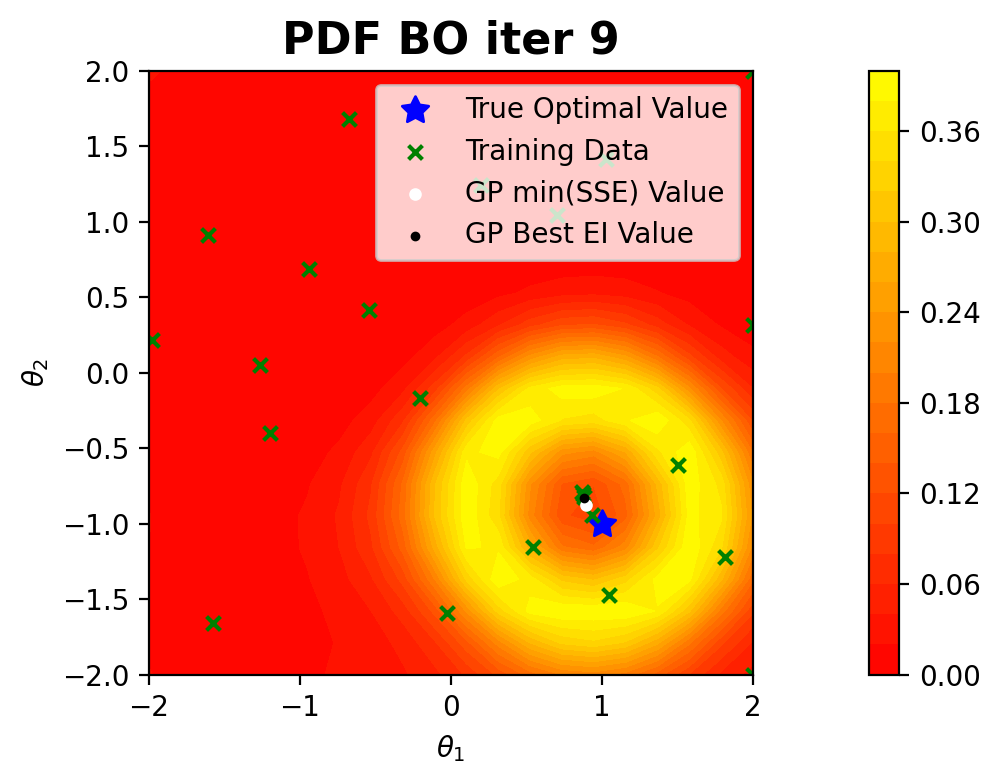

Magnitude of ln(SSE) given Theta_Opt =  [ 0.89616282 -0.87393324] is -4.0769e-01
BO Iteration =  10
Jasrasaria EP: -0.43327670169784854
Boyle EP: tensor(0.1369)
Exp EP: tensor(0.2054)
Exploration Bias =  tensor(0.2054)
Scipy Theta Best =  [ 0.88093578 -0.83358438]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.89351808 -0.87045798]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



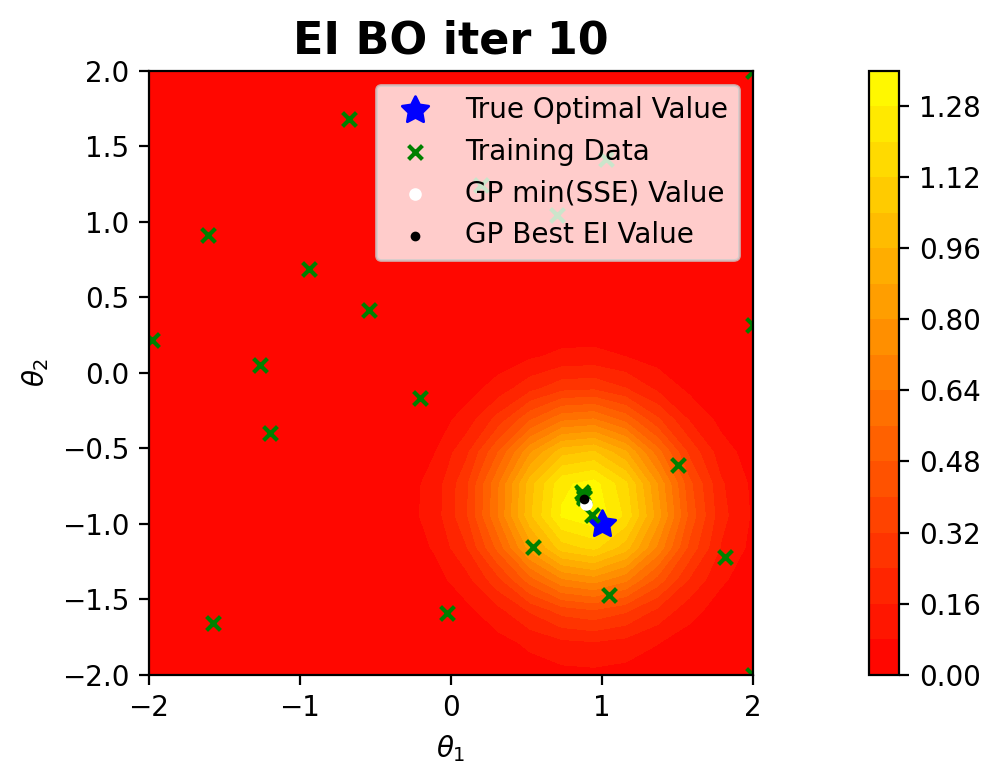

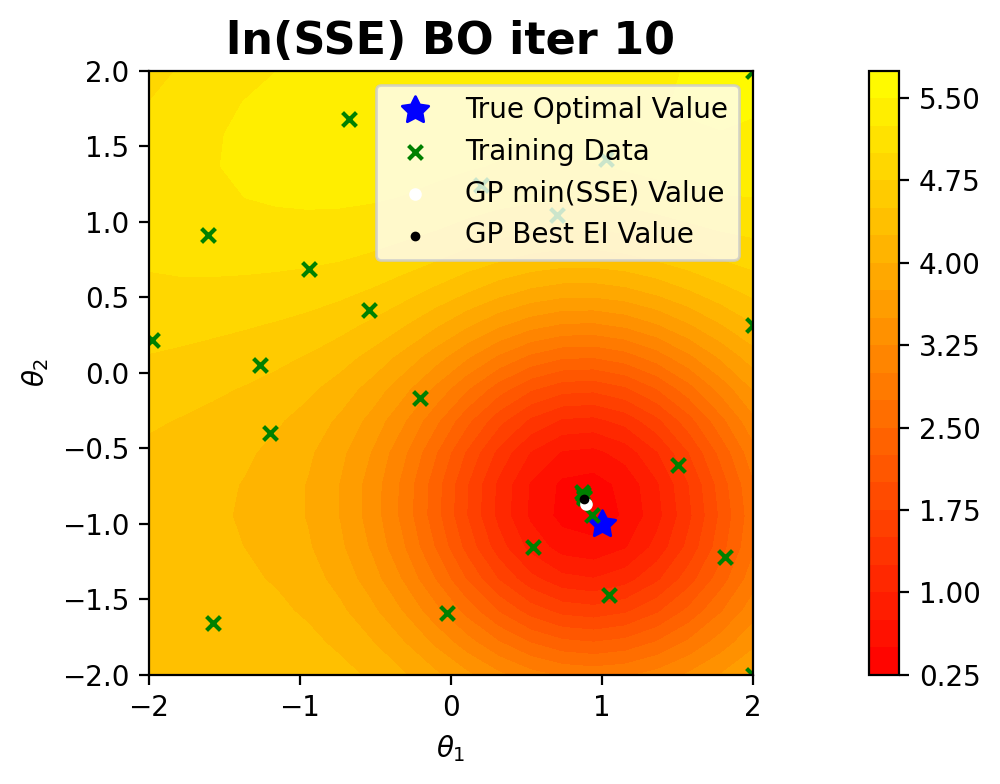

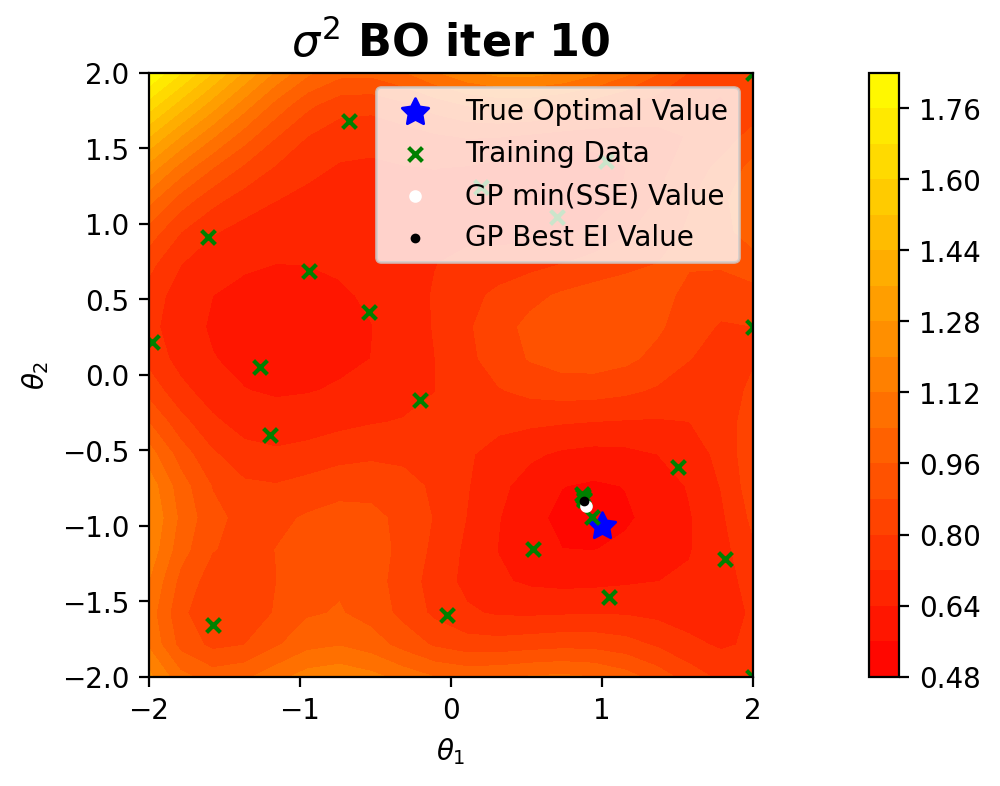

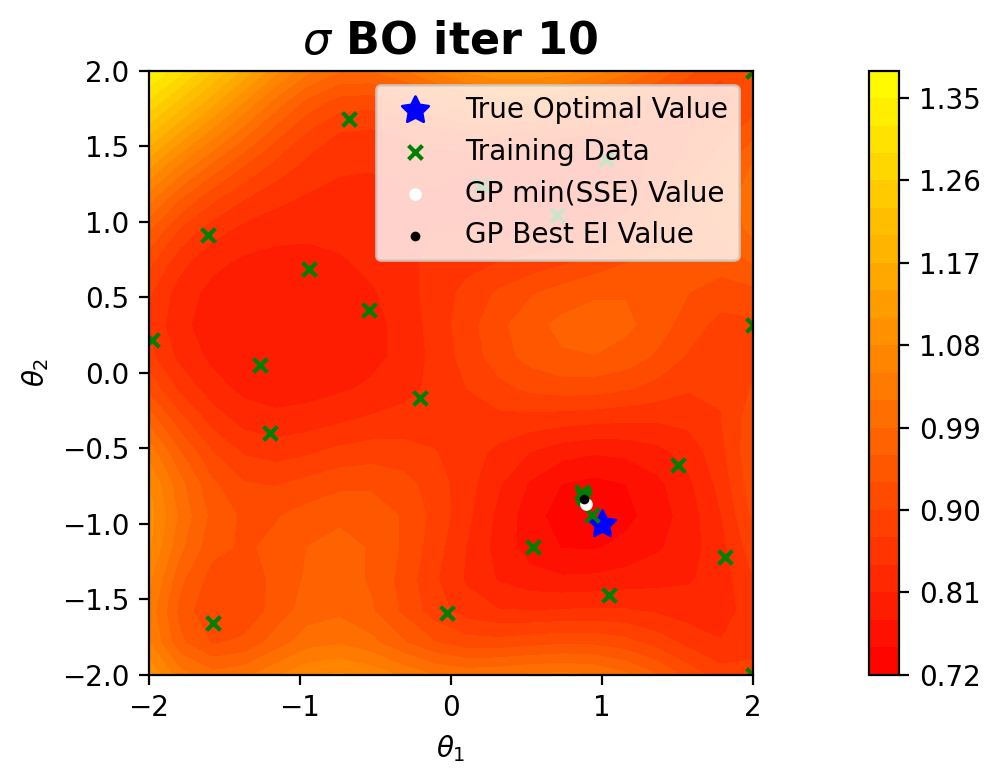

Best Error is: -1.8991


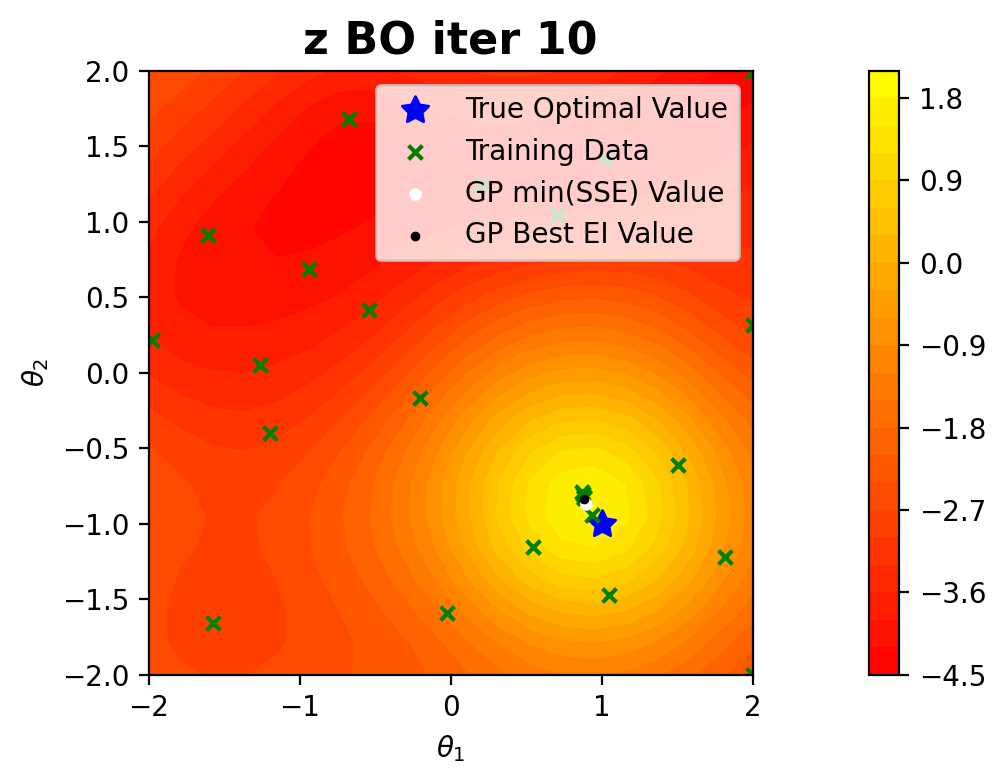

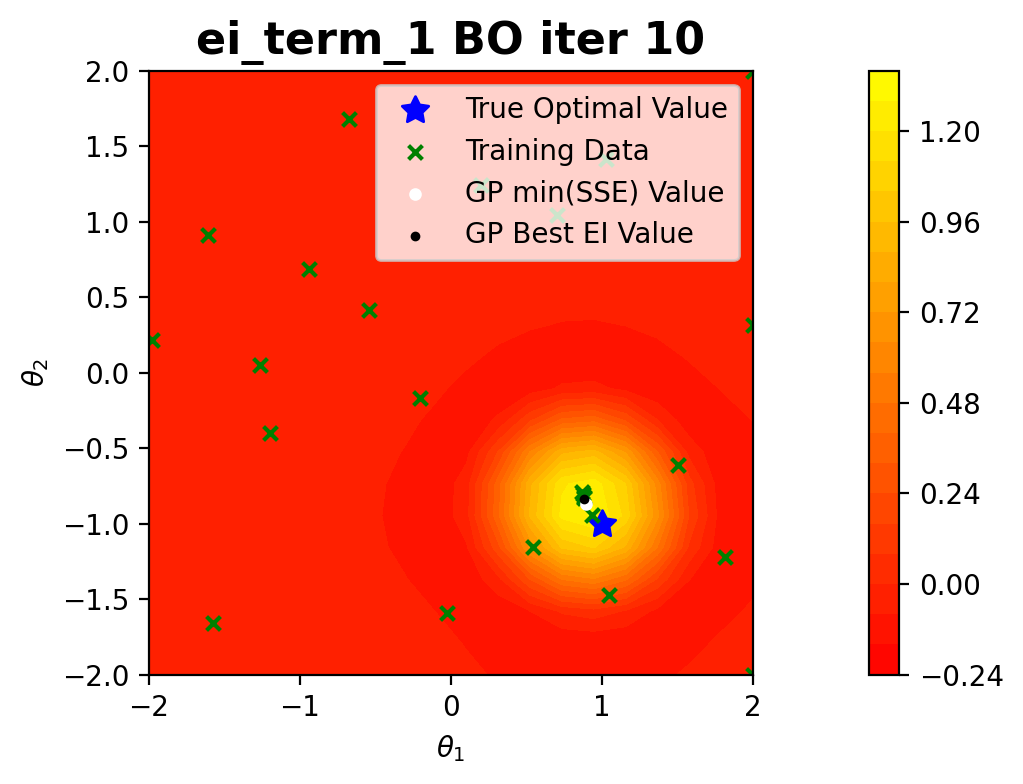

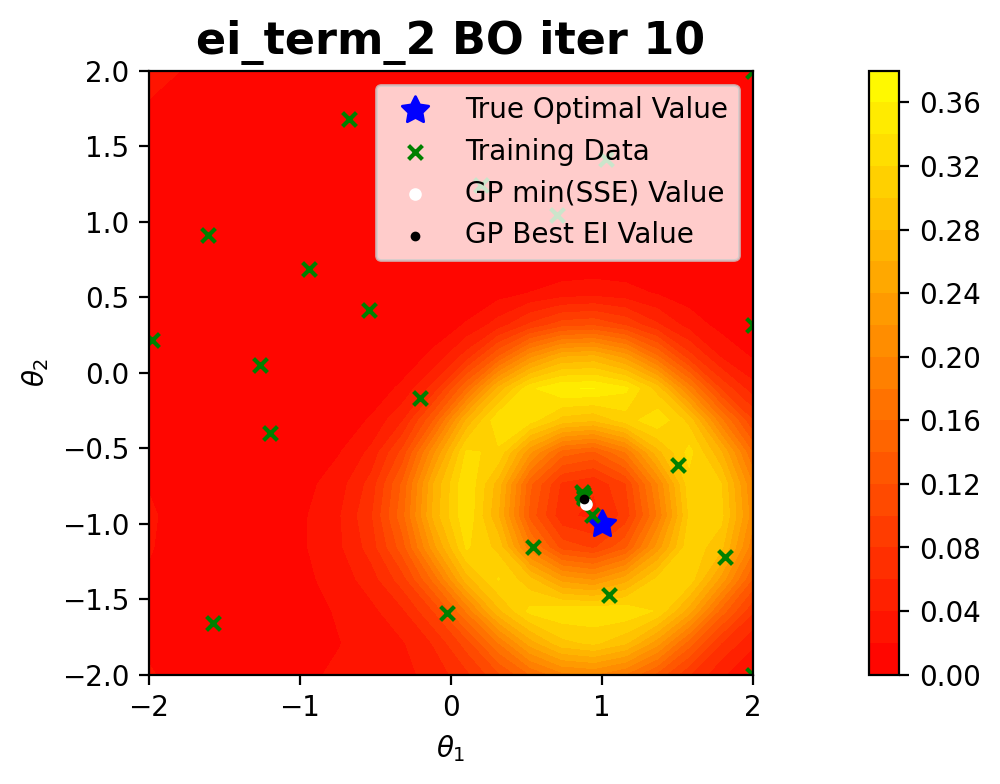

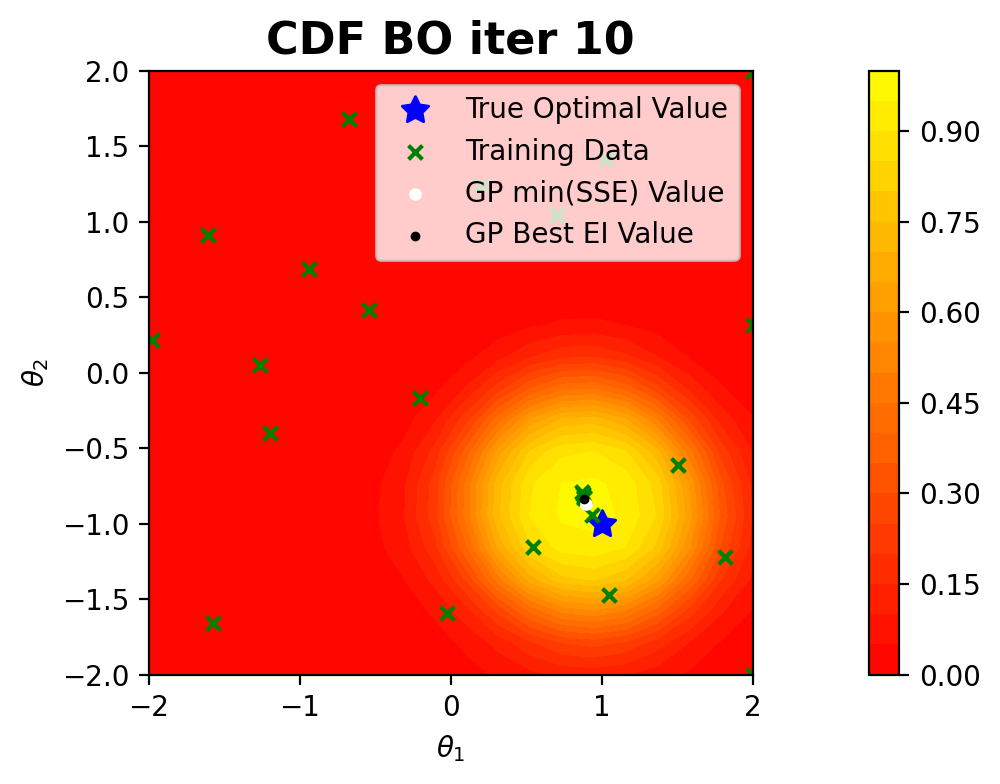

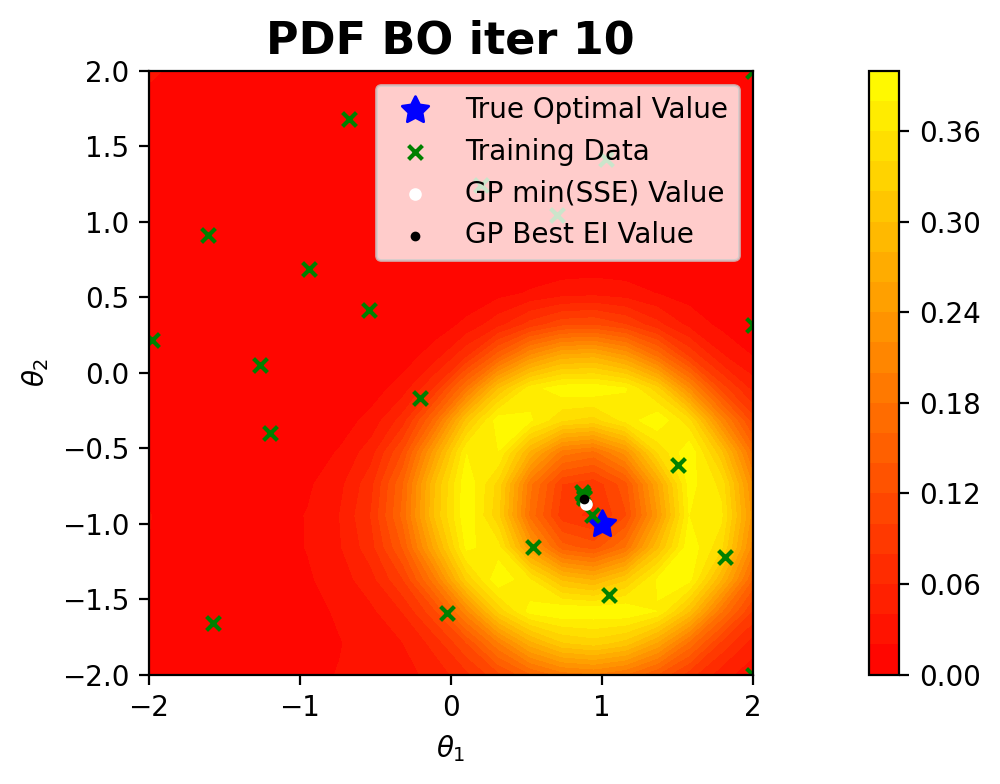

Magnitude of ln(SSE) given Theta_Opt =  [ 0.89351808 -0.87045798] is -3.5465e-01


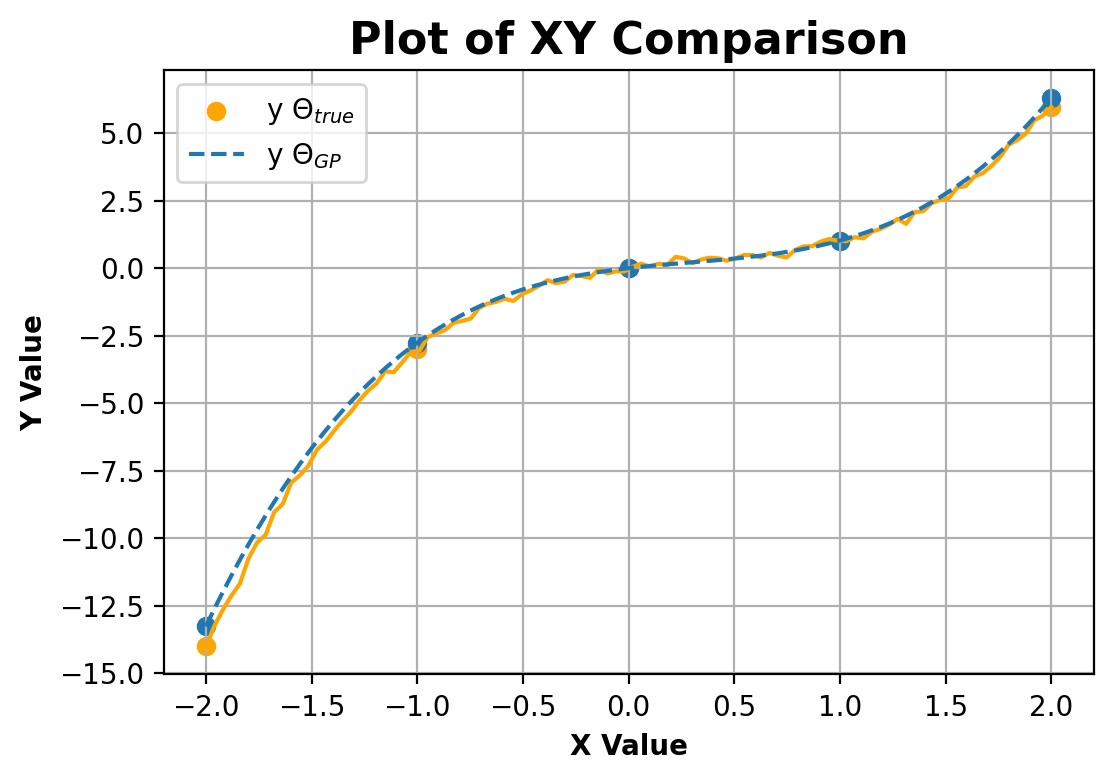

The GP predicts the lowest SSE of 1.493e-02 occurs at θ = [ 0.96095069 -0.99253912] during Run 1 at BO iteration 3
At this point, the highest EI occurs at θ = [2.         0.31578947]
CPU times: user 47.2 s, sys: 806 ms, total: 48 s
Wall time: 48.2 s


In [3]:
%%time

obj = "LN_obj"        

all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

print("Runs:", runs)
print("BO Iters:",BO_iters)
print("------------------------------")
for i in range(len(set_lengthscale)):
    for j in range(len(explore_bias)):
        print("Lengthscale Set To:", set_lengthscale)
        print("Explore Bias:", explore_bias[j])
        results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[j], Xexp, Yexp,
                                     noise_std, obj, runs, sparse_grid, emulator, set_lengthscale[i], verbose,save_fig, 
                                     shuffle_seed)
        print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
              "during Run", results[1], "at BO iteration", results[0])
        print("At this point, the highest EI occurs at \u03B8 =", results[4][0])